## Introduction
*In this project we aim to gain insights on Alzeheimer and Other Dementia diseases, We'll explore two different but relevant Datasets in order to derive comprehensive insights and findings from the combined datasets*
#### Questions We Seek To Answer:
* Has the death rate changed over the years?
* Are there some countries with higher death rates than others?
* How has the death rate changed over the years for different countries?
* Which entity has the highest death rate over the years?
* Is there a correlation between death rate and number of neurologists?

#### Importing Python Modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

#### Loading the data into a pandas datafame
*We called the dataframe `ddr` which is an abbreviation for `Dementia Death Rates`*

In [2]:
ddr = pd.read_csv('dementia-death-rates new.csv')
ddr.head(10)

Entity Code  Year  \
0           Afghanistan  AFG  1990   
1  African Region (WHO)    0  1990   
2               Albania  ALB  1990   
3               Algeria  DZA  1990   
4        American Samoa  ASM  1990   
5               Andorra  AND  1990   
6                Angola  AGO  1990   
7   Antigua and Barbuda  ATG  1990   
8             Argentina  ARG  1990   
9               Armenia  ARM  1990   

   Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)  
0                                              31.83                                            
1                                              23.04                                            
2                                              24.78                                            
3                                              28.78                                            
4                                              24.21                                            
5                                              21.23                                            
6                                              21.39                                            
7                                              20.92                                            
8                                              20.94                                            
9                                              21.20

*Right off the bat we see that one column has a really long name that is inconvenient to use, so let's rename it to `Death_Rate`*

In [3]:
ddr.rename(columns={"Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: Age-standardized (Rate)" : 'Death_Rate' },\
           inplace = True)

#### Checking for Missing Data
*The dataset doesn't seem to have any `null` data, however when we looked at the first 10 rows of the dataset we noticed that the `Code` for 'African Region (WHO)' is filled with `0` which indicates that there are missing data in that column however it's not marked as null.*

In [4]:
ddr.isnull().sum().reset_index()

index  0
0      Entity  0
1        Code  0
2        Year  0
3  Death_Rate  0

*Dropping duplicates if there are any, there was no duplicates found in the dataset*

In [5]:
print(len(ddr))
ddr.drop_duplicates(inplace = True)
len(ddr)

6840


6840

#### Summary Statistics
*Our initial observation is now approved, there are `690` rows with `0` value in the `Code` column. However, I'm not gonna fill those missing data since they're not gonna be relevant to our analysis since I plan to use the `Entity` column and not the `Code` one, also for the `Year & Death_Rate` columns there doesn't seem to be any missing data nor outliers in them, as we can see the min and max values for both columns are reasonable*

In [6]:
ddr.describe(include = 'all')

Entity  Code         Year   Death_Rate
count          6840  6840  6840.000000  6840.000000
unique          228   206          NaN          NaN
top     Afghanistan     0          NaN          NaN
freq             30   690          NaN          NaN
mean            NaN   NaN  2004.500000    23.174693
std             NaN   NaN     8.656074     2.445493
min             NaN   NaN  1990.000000    15.090000
25%             NaN   NaN  1997.000000    21.340000
50%             NaN   NaN  2004.500000    22.950000
75%             NaN   NaN  2012.000000    24.830000
max             NaN   NaN  2019.000000    33.290000

*The Data Type of each column is right so no changes are needed.*

In [7]:
ddr.dtypes

Entity         object
Code           object
Year            int64
Death_Rate    float64
dtype: object

*The Dataset is set between the years `1990` and `2019`, this step also confirms that there are no missing nor zero values in the `Year` column*

In [8]:
ddr.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

#### Importing a Dataset Through API
*Importing all datasets API indicators and filtering through them for all datasets related to Dementia*

In [9]:
import requests
import json

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

base_url = 'https://ghoapi.azureedge.net/api/Indicator'
response = requests.get(base_url)
if response.status_code == 200:
    data = response.text
    parse_json = json.loads(data)
else:
    print('Failed to retrieve data')
api_data = pd.DataFrame(parse_json['value'])
api_data['is_gdo'] = api_data.IndicatorCode.str.contains("GDO.+", regex = True)
gdo = api_data[api_data['is_gdo'] == True]
gdo

IndicatorCode  \
56            GDO_q10x1   
57     GDO_q10x2_1AVAIL   
70          GDO_q10x1x1   
71          GDO_q10x1x2   
87       GDO_q10x2_TECH   
88            GDO_q11x1   
89        GDO_q11x2x2_1   
98        GDO_q11x2x2_2   
99        GDO_q11x2x2_3   
100         GDO_q11x2x6   
101         GDO_q12x1x3   
102         GDO_q12x2_5   
106         GDO_q11x2x3   
107         GDO_q11x2x5   
112  GDO_q12x2x1x1_1NGO   
116     GDO_q10x2_HOSUE   
117         GDO_q11x2x1   
119  GDO_q12x2x1x1_2PUB   
120     GDO_q12x2x1x1_3   
130         GDO_q12x2_2   
131         GDO_q12x2_3   
132         GDO_q12x2_4   
133  GDO_q12x2x1x1_1PUB   
134  GDO_q12x2x1x1_2NGO   
172           GDO_q12x1   
173         GDO_q12x1x1   
174         GDO_q12x1x2   
179  GDO_q12x2x1x1_3PUB   
180  GDO_q12x2x1x1_4NGO   
181     GDO_q12x2x1x1_5   
182  GDO_q12x2x1x1_5PRV   
183  GDO_q12x2x1x1_5NGO   
184       GDO_q12x2x5x3   
185         GDO_q13x3x1   
188  GDO_q12x2x1x1_3NGO   
189  GDO_q12x2x1x1_4PRV   
190           GDO_q14x1   
191         GDO_q14x2_2   
198       GDO_q12x2x1x3   
209         GDO_q14x2_3   
210         GDO_q14x2_4   
211         GDO_q14x2_5   
212         GDO_q14x2_1   
220         GDO_q14x2_6   
221         GDO_q15x2_5   
222           GDO_q16x1   
223       GDO_q16x1x1_1   
224         GDO_q15x2_2   
225         GDO_q15x2_3   
226       GDO_q16x1x1_2   
254     GDO_q12x2x1x1_1   
255  GDO_q12x2x1x1_1PRV   
256     GDO_q12x2x1x1_2   
257       GDO_q16x1x2_2   
258         GDO_q16x2_3   
260       GDO_q16x1x1_3   
261       GDO_q16x1x1_4   
265       GDO_q17x2x1_3   
270         GDO_q17x1x1   
271       GDO_q17x2x1_1   
272       GDO_q17x2x1_2   
273           GDO_q18x2   
274            GDO_q1x1   
279       GDO_q18x2x3_3   
280           GDO_q19x2   
281       GDO_q19x3x1_1   
285         GDO_q15x2_7   
286         GDO_q15x2_8   
295         GDO_q16x2_5   
296           GDO_q16x3   
297           GDO_q17x1   
298         GDO_q17x2x2   
299       GDO_q18x2x1_1   
300           GDO_q19x3   
301            GDO_q1x2   
311  GDO_q12x2x1x1_2PRV   
312  GDO_q12x2x1x1_3PRV   
313     GDO_q12x2x1x1_4   
333            GDO_q2x2   
334    GDO_Q2x2x1_DISAB   
338          GDO_q2x4_1   
339          GDO_q2x4_2   
340          GDO_q2x4_3   
364          GDO_q2x5_2   
365          GDO_q2x5_4   
366          GDO_q2x5_5   
373             GDO_q20   
378          GDO_q2x1x3   
379      GDO_Q2x2x1_AGE   
380   GDO_Q2x2x1_MENTAL   
381      GDO_Q2x2x1_NCD   
382            GDO_q2x3   
383        GDO_q2x3x1_1   
384  GDO_q12x2x1x1_4PUB   
385  GDO_q12x2x1x1_5PUB   
386       GDO_q12x2x2x3   
387       GDO_q12x2x3x3   
388       GDO_q12x2x4x3   
389           GDO_q13x1   
390         GDO_q13x1x1   
391           GDO_q13x3   
401           GDO_q15x1   
402         GDO_q15x2_1   
403         GDO_q15x2_4   
404         GDO_q15x2_6   
405   GDO_q16x1x1_other   
406       GDO_q16x1x2_1   
407         GDO_q16x2_1   
408         GDO_q16x2_2   
409         GDO_q16x2_4   
410           GDO_q17x2   
411       GDO_q17x2x1_4   
412          GDO_q2x5_7   
413         GDO_q3x3a_1   
414         GDO_q3x3a_3   
417             GDO_q35   
418            GDO_q3x2   
419          GDO_q3x4_3   
420          GDO_q4x2_1   
421          GDO_q4x2_5   
425        GDO_q4x3x4_4   
426        GDO_q5x1x1_7   
434    GDO_q4x1x1_SQ002   
435          GDO_q4x2_2   
436          GDO_q4x2_4   
437        GDO_q4x3x4_1   
443        GDO_q3x1x1_1   
444         GDO_q3x3a_2   
445        GDO_q5x1x1_2   
446        GDO_q5x1x1_3   
447        GDO_q5x1x1_5   
454         GDO_q3x3a_4   
455         GDO_q3x3b_1   
456          GDO_q3x4_2   
457            GDO_q4x1   
458    GDO_q4x1x1_SQ001   
467        GDO_q4x3x4_2   
492       GDO_q18x2x3_1   
493       GDO_q18x2x3_2   
494          GDO_q1x1x1   
495            GDO_q2x1   
496          GDO_q2x1x2   
497    GDO_q2x2x1_other   
518            GDO_q5x1   
519        GDO_q5x1x1_6   
520          GDO_q2x4_4   
521          GDO_q2x4_5   
522          G

*Looping through all Dementia related datasets and viewing the first 5 rows of each one in order to make a decision of which one to pick*

In [10]:
base_url = 'https://ghoapi.azureedge.net/api'
for i in range(len(gdo)):
    indicator = gdo.IndicatorCode.iloc[i]
    
    response = requests.get(base_url+'/'+indicator)
    if response.status_code == 200:
        data = response.text
        parse_json = json.loads(data)
    else:
        print('Failed to retrieve data')
    indicator_selection_data = pd.DataFrame(parse_json['value'])
    print(gdo.IndicatorName.iloc[i])
    display(indicator_selection_data.head())

National regulator approval of anti-dementia medication


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  7164307     GDO_q10x1        COUNTRY        EST                EUR   
1   658153     GDO_q10x1        COUNTRY        IND               SEAR   
2  4511076     GDO_q10x1        COUNTRY        HUN                EUR   
3  6298423     GDO_q10x1        COUNTRY        DNK                EUR   
4  6128987     GDO_q10x1        COUNTRY        CAN                AMR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR  South-East Asia     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR         Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:33+02:00               2017   
1  None     None  2021-06-25T09:30:14+02:00               2017   
2  None     None  2021-06-25T09:34:00+02:00               2017   
3  None     None  2021-06-25T09:31:07+02:00               2017   
4  None     None  2021-06-25T09:30:19+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of atleast one adult hygiene products for people with dementia


Id     IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2062397  GDO_q10x2_1AVAIL        COUNTRY        POL        YEAR   
1  2806061  GDO_q10x2_1AVAIL        COUNTRY        TUN        YEAR   
2  1217324  GDO_q10x2_1AVAIL        COUNTRY        KOR        YEAR   
3  5316318  GDO_q10x2_1AVAIL        COUNTRY        JOR        YEAR   
4  4634554  GDO_q10x2_1AVAIL        COUNTRY        FJI        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                WPR        Western Pacific     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim             Value  \
0  None     None  None              None          None      Reimbursable   
1  None     None  None              None          None  Not Reimbursable   
2  None     None  None              None          None      Reimbursable   
3  None     None  None              None          None      Reimbursable   
4  None     None  None              None          None     Not Available   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:35:12+02:00   
1         None  None  None     None  2021-06-25T09:33:37+02:00   
2         None  None  None     None  2021-06-25T09:32:29+02:00   
3         None  None  None     None  2021-06-25T09:30:52+02:00   
4         None  None  None     None  2021-06-25T09:33:49+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of generic anti-dementia medication


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3577702   GDO_q10x1x1        COUNTRY        CZE        YEAR   
1  4995671   GDO_q10x1x1        COUNTRY        FRA        YEAR   
2  6789323   GDO_q10x1x1        COUNTRY        USA        YEAR   
3  2158200   GDO_q10x1x1        COUNTRY        DEU        YEAR   
4  3080474   GDO_q10x1x1        COUNTRY        BLZ        YEAR   

  ParentLocationCode ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR         Europe     None     2017  None     None  None   
1                EUR         Europe     None     2017  None     None  None   
2                AMR       Americas     None     2017  None     None  None   
3                EUR         Europe     None     2017  None     None  None   
4                AMR       Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:34+02:00               2017   
1  None     None  2021-06-25T09:33:01+02:00               2017   
2  None     None  2021-06-25T09:32:45+02:00               2017   
3  None     None  2021-06-25T09:31:12+02:00               2017   
4  None     None  2021-06-25T09:30:37+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of at least one anti-dementia medication approved for on-label use reimbursement


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   148178   GDO_q10x1x2        COUNTRY        OMN        YEAR   
1  4191920   GDO_q10x1x2        COUNTRY        THA        YEAR   
2  1994139   GDO_q10x1x2        COUNTRY        TUN        YEAR   
3    18533   GDO_q10x1x2        COUNTRY        SWZ        YEAR   
4  1422458   GDO_q10x1x2        COUNTRY        MLT        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EMR  Eastern Mediterranean     None     2017  None     None   
1               SEAR        South-East Asia     None     2017  None     None   
2                EMR  Eastern Mediterranean     None     2017  None     None   
3                AFR                 Africa     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None              No   
1  None     None  None              None          None             Yes   
2  None     None  None              None          None             Yes   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None             Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:34+02:00   
1         None  None  None     None  2021-06-25T09:31:46+02:00   
2         None  None  None     None  2021-06-25T09:33:37+02:00   
3         None  None  None     None  2021-06-25T09:30:46+02:00   
4         None  None  None     None  2021-06-25T09:31:39+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of  atleast one assistive technology for people with dementia


Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3285499  GDO_q10x2_TECH        COUNTRY        TUR                EUR   
1  3898962  GDO_q10x2_TECH        COUNTRY        CZE                EUR   
2  3967464  GDO_q10x2_TECH        COUNTRY        CHL                AMR   
3  3837806  GDO_q10x2_TECH        COUNTRY        SVN                EUR   
4  3646506  GDO_q10x2_TECH        COUNTRY        ISR                EUR   

  TimeDimType ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2 Dim3Type  \
0        YEAR         Europe     None     2017  None     None  None     None   
1        YEAR         Europe     None     2017  None     None  None     None   
2        YEAR       Americas     None     2017  None     None  None     None   
3        YEAR         Europe     None     2017  None     None  None     None   
4        YEAR         Europe     None     2017  None     None  None     None   

   Dim3 DataSourceDimType DataSourceDim         Value NumericValue   Low  \
0  None              None          None  Reimbursable         None  None   
1  None              None          None  Reimbursable         None  None   
2  None              None          None  Reimbursable         None  None   
3  None              None          None  Reimbursable         None  None   
4  None              None          None  Reimbursable         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:35:01+02:00               2017   
1  None     None  2021-06-25T09:32:34+02:00               2017   
2  None     None  2021-06-25T09:33:26+02:00               2017   
3  None     None  2021-06-25T09:32:56+02:00               2017   
4  None     None  2021-06-25T09:32:19+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia national nongovernmental organization


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  7334766     GDO_q11x1        COUNTRY        TGO                AFR   
1  7205243     GDO_q11x1        COUNTRY        MAR                EMR   
2    45668     GDO_q11x1        COUNTRY        COK                WPR   
3  4941226     GDO_q11x1        COUNTRY        KOR                WPR   
4   223322     GDO_q11x1        COUNTRY        LTU                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Africa     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR        Western Pacific     None  None     2017     None  None   
3        YEAR        Western Pacific     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:07+02:00               2017   
1  None     None  2021-06-25T09:31:57+02:00               2017   
2  None     None  2021-06-25T09:30:23+02:00               2017   
3  None     None  2021-06-25T09:32:29+02:00               2017   
4  None     None  2021-06-25T09:34:44+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia nongovernmental organization office branches (Sub-national)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2431384  GDO_q11x2x2_1        COUNTRY        ISR        YEAR   
1  3386885  GDO_q11x2x2_1        COUNTRY        AUS        YEAR   
2  4287562  GDO_q11x2x2_1        COUNTRY        KOR        YEAR   
3  4846067  GDO_q11x2x2_1        COUNTRY        OMN        YEAR   
4  3101289  GDO_q11x2x2_1        COUNTRY        BLZ        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None             Yes   
1  None     None  None              None          None             Yes   
2  None     None  None              None          None             Yes   
3  None     None  None              None          None              No   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:19+02:00   
1         None  None  None     None  2021-06-25T09:33:07+02:00   
2         None  None  None     None  2021-06-25T09:32:29+02:00   
3         None  None  None     None  2021-06-25T09:34:35+02:00   
4         None  None  None     None  2021-06-25T09:30:37+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia nongovernmental organization office branches (Local)


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1974060  GDO_q11x2x2_2        COUNTRY        ISR                EUR   
1  3366787  GDO_q11x2x2_2        COUNTRY        BRN                WPR   
2  5309123  GDO_q11x2x2_2        COUNTRY        SGP                WPR   
3  2867842  GDO_q11x2x2_2        COUNTRY        HUN                EUR   
4  2656247  GDO_q11x2x2_2        COUNTRY        IND               SEAR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR  Western Pacific     None  None     2017     None  None   
2        YEAR  Western Pacific     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR  South-East Asia     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None              No         None   
2     None  None              None          None              No         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:19+02:00               2017   
1  None  None     None  2021-06-25T09:29:52+02:00               2017   
2  None  None     None  2021-06-25T09:30:03+02:00               2017   
3  None  None     None  2021-06-25T09:34:00+02:00               2017   
4  None  None     None  2021-06-25T09:30:14+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia nongovernmental organization office branches (National only)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1892167  GDO_q11x2x2_3        COUNTRY        VNM        YEAR   
1  6851080  GDO_q11x2x2_3        COUNTRY        JPN        YEAR   
2  2397610  GDO_q11x2x2_3        COUNTRY        BRN        YEAR   
3  4001456  GDO_q11x2x2_3        COUNTRY        THA        YEAR   
4  2972386  GDO_q11x2x2_3        COUNTRY        EST        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                WPR  Western Pacific     None  None     2017     None  None   
1                WPR  Western Pacific     None  None     2017     None  None   
2                WPR  Western Pacific     None  None     2017     None  None   
3               SEAR  South-East Asia     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:50+02:00               2017   
1  None     None  2021-06-25T09:34:18+02:00               2017   
2  None     None  2021-06-25T09:29:52+02:00               2017   
3  None     None  2021-06-25T09:31:46+02:00               2017   
4  None     None  2021-06-25T09:30:33+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia nongovernmental organization's involvement in policy development


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1768860   GDO_q11x2x6        COUNTRY        BGD        YEAR   
1  3721249   GDO_q11x2x6        COUNTRY        QAT        YEAR   
2  4606874   GDO_q11x2x6        COUNTRY        GBR        YEAR   
3  3032788   GDO_q11x2x6        COUNTRY        EST        YEAR   
4  4151127   GDO_q11x2x6        COUNTRY        FRA        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0               SEAR        South-East Asia     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None             Yes   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None             Yes   
3  None     None  None              None          None             Yes   
4  None     None  None              None          None             Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:12+02:00   
1         None  None  None     None  2021-06-25T09:30:57+02:00   
2         None  None  None     None  2021-06-25T09:33:11+02:00   
3         None  None  None     None  2021-06-25T09:30:33+02:00   
4         None  None  None     None  2021-06-25T09:33:01+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of implementation plan for dementia carer support services


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6585220   GDO_q12x1x3        COUNTRY        GRC        YEAR   
1  1476729   GDO_q12x1x3        COUNTRY        CYP        YEAR   
2  3782752   GDO_q12x1x3        COUNTRY        DEU        YEAR   
3  6325782   GDO_q12x1x3        COUNTRY        ZAF        YEAR   
4   114200   GDO_q12x1x3        COUNTRY        MAR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                AFR                 Africa     None  None     2017     None   
4                EMR  Eastern Mediterranean     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None              No   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None              No   
3  None     None  None              None          None              No   
4  None     None  None              None          None              No   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:31:18+02:00   
1         None  None  None     None  2021-06-25T09:32:02+02:00   
2         None  None  None     None  2021-06-25T09:31:13+02:00   
3         None  None  None     None  2021-06-25T09:35:07+02:00   
4         None  None  None     None  2021-06-25T09:31:57+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of financial benefits/social protection for dementia carers


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5145268   GDO_q12x2_5        COUNTRY        IRL        YEAR   
1   441492   GDO_q12x2_5        COUNTRY        GBR        YEAR   
2  6708018   GDO_q12x2_5        COUNTRY        TUR        YEAR   
3  2520408   GDO_q12x2_5        COUNTRY        QAT        YEAR   
4  7090111   GDO_q12x2_5        COUNTRY        PAK        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                EMR  Eastern Mediterranean     None  None     2017     None   
4                EMR  Eastern Mediterranean     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None             Yes   
1  None     None  None              None          None             Yes   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:09+02:00   
1         None  None  None     None  2021-06-25T09:33:12+02:00   
2         None  None  None     None  2021-06-25T09:35:02+02:00   
3         None  None  None     None  2021-06-25T09:30:57+02:00   
4         None  None  None     None  2021-06-25T09:31:52+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia nongovernmental organization staff primarily salaried/volunteer


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   978309   GDO_q11x2x3        COUNTRY        GRD        YEAR   
1  5773697   GDO_q11x2x3        COUNTRY        SVN        YEAR   
2  3230879   GDO_q11x2x3        COUNTRY        QAT        YEAR   
3  4443142   GDO_q11x2x3        COUNTRY        DOM        YEAR   
4  1967690   GDO_q11x2x3        COUNTRY        FJI        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                AMR               Americas     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                EMR  Eastern Mediterranean     None     2017  None     None   
3                AMR               Americas     None     2017  None     None   
4                WPR        Western Pacific     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None       Voluntary   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None       Voluntary   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:30+02:00   
1         None  None  None     None  2021-06-25T09:32:56+02:00   
2         None  None  None     None  2021-06-25T09:30:57+02:00   
3         None  None  None     None  2021-06-25T09:31:28+02:00   
4         None  None  None     None  2021-06-25T09:33:49+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Provision of governmental funding to dementia nongovernmental organization for activities/services


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5513722   GDO_q11x2x5        COUNTRY        POL                EUR   
1   400159   GDO_q11x2x5        COUNTRY        GUY                AMR   
2  4682202   GDO_q11x2x5        COUNTRY        LCA                AMR   
3  2574871   GDO_q11x2x5        COUNTRY        ITA                EUR   
4   849511   GDO_q11x2x5        COUNTRY        PAK                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR               Americas     None     2017  None     None  None   
2        YEAR               Americas     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None              No         None   
3     None  None              None          None              No         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:35:12+02:00               2017   
1  None  None     None  2021-06-25T09:32:39+02:00               2017   
2  None  None     None  2021-06-25T09:34:55+02:00               2017   
3  None  None     None  2021-06-25T09:32:07+02:00               2017   
4  None  None     None  2021-06-25T09:31:51+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of dementia carer training and education (NGO)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4273666  GDO_q12x2x1x1_1NGO        COUNTRY        THA        YEAR   
1  5828040  GDO_q12x2x1x1_1NGO        COUNTRY        CZE        YEAR   
2  7377391  GDO_q12x2x1x1_1NGO        COUNTRY        IRN        YEAR   
3  5821460  GDO_q12x2x1x1_1NGO        COUNTRY        MYS        YEAR   
4    32283  GDO_q12x2x1x1_1NGO        COUNTRY        NOR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0               SEAR        South-East Asia     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                WPR        Western Pacific     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None    No         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:46+02:00               2017   
1  None  None     None  2021-06-25T09:32:35+02:00               2017   
2  None  None     None  2021-06-25T09:32:25+02:00               2017   
3  None  None     None  2021-06-25T09:34:40+02:00               2017   
4  None  None     None  2021-06-25T09:29:58+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of atleast one housing adjustment for people with dementia


Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2124121  GDO_q10x2_HOSUE        COUNTRY        BLZ        YEAR   
1  4778092  GDO_q10x2_HOSUE        COUNTRY        DOM        YEAR   
2   971799  GDO_q10x2_HOSUE        COUNTRY        CAN        YEAR   
3  1258669  GDO_q10x2_HOSUE        COUNTRY        BGD        YEAR   
4  5227668  GDO_q10x2_HOSUE        COUNTRY        USA        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                AMR         Americas     None     2017  None     None  None   
1                AMR         Americas     None     2017  None     None  None   
2                AMR         Americas     None     2017  None     None  None   
3               SEAR  South-East Asia     None     2017  None     None  None   
4                AMR         Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim             Value  \
0     None  None              None          None  Not Reimbursable   
1     None  None              None          None  Not Reimbursable   
2     None  None              None          None     Not available   
3     None  None              None          None     Not Available   
4     None  None              None          None      Reimbursable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:37+02:00   
1         None  None  None     None  2021-06-25T09:31:28+02:00   
2         None  None  None     None  2021-06-25T09:30:19+02:00   
3         None  None  None     None  2021-06-25T09:34:12+02:00   
4         None  None  None     None  2021-06-25T09:32:45+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia nongovernmental organization equipped with office


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   706064   GDO_q11x2x1        COUNTRY        CHL        YEAR   
1  6421486   GDO_q11x2x1        COUNTRY        GUY        YEAR   
2  2151933   GDO_q11x2x1        COUNTRY        ISR        YEAR   
3  6210948   GDO_q11x2x1        COUNTRY        TUR        YEAR   
4  6620035   GDO_q11x2x1        COUNTRY        HUN        YEAR   

  ParentLocationCode ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                AMR       Americas     None     2017  None     None  None   
1                AMR       Americas     None     2017  None     None  None   
2                EUR         Europe     None     2017  None     None  None   
3                EUR         Europe     None     2017  None     None  None   
4                EUR         Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None              No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:26+02:00               2017   
1  None  None     None  2021-06-25T09:32:39+02:00               2017   
2  None  None     None  2021-06-25T09:32:19+02:00               2017   
3  None  None     None  2021-06-25T09:35:01+02:00               2017   
4  None  None     None  2021-06-25T09:34:00+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of psycho-social supports for dementia carers (Public sector)


Id       IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5363753  GDO_q12x2x1x1_2PUB        COUNTRY        ITA                EUR   
1   127819  GDO_q12x2x1x1_2PUB        COUNTRY        FJI                WPR   
2  4709623  GDO_q12x2x1x1_2PUB        COUNTRY        LCA                AMR   
3  1551262  GDO_q12x2x1x1_2PUB        COUNTRY        CHE                EUR   
4  2117692  GDO_q12x2x1x1_2PUB        COUNTRY        GRD                AMR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR  Western Pacific     None  None     2017     None  None   
2        YEAR         Americas     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:07+02:00               2017   
1  None     None  2021-06-25T09:33:50+02:00               2017   
2  None     None  2021-06-25T09:34:55+02:00               2017   
3  None     None  2021-06-25T09:33:55+02:00               2017   
4  None     None  2021-06-25T09:34:30+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of respite care for dementia carers [Capital/capital and main cities/capital, main cities, rural areas]


Id    IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6080767  GDO_q12x2x1x1_3        COUNTRY        GRD                AMR   
1  4301266  GDO_q12x2x1x1_3        COUNTRY        MDV               SEAR   
2  7151021  GDO_q12x2x1x1_3        COUNTRY        IRL                EUR   
3  5425691  GDO_q12x2x1x1_3        COUNTRY        SWZ                AFR   
4  4308373  GDO_q12x2x1x1_3        COUNTRY        CHL                AMR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR         Americas     None  None     2017     None  None   
1        YEAR  South-East Asia     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR           Africa     None  None     2017     None  None   
4        YEAR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                   Value NumericValue   Low  High Comments  \
0                         Not applicable         None  None  None     None   
1                         Not applicable         None  None  None     None   
2  Capital, main cities, and rural areas         None  None  None     None   
3                         Not applicable         None  None  None     None   
4  Capital, main cities, and rural areas         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:34:30+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:33:43+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:30:09+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:30:48+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:33:27+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Existence of psycho-social supports for dementia carers


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   529880   GDO_q12x2_2        COUNTRY        ZAF                AFR   
1  2499459   GDO_q12x2_2        COUNTRY        HUN                EUR   
2  1646764   GDO_q12x2_2        COUNTRY        MMR               SEAR   
3   828842   GDO_q12x2_2        COUNTRY        LBN                EMR   
4  1728667   GDO_q12x2_2        COUNTRY        TGO                AFR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Africa     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR        South-East Asia     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR                 Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:35:07+02:00               2017   
1  None  None     None  2021-06-25T09:34:00+02:00               2017   
2  None  None     None  2021-06-25T09:33:21+02:00               2017   
3  None  None     None  2021-06-25T09:32:51+02:00               2017   
4  None  None     None  2021-06-25T09:34:07+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of respite care for dementia carers


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2376746   GDO_q12x2_3        COUNTRY        SWZ        YEAR   
1  3782616   GDO_q12x2_3        COUNTRY        QAT        YEAR   
2  2103556   GDO_q12x2_3        COUNTRY        CZE        YEAR   
3  4825532   GDO_q12x2_3        COUNTRY        NOR        YEAR   
4  6946808   GDO_q12x2_3        COUNTRY        MAR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                AFR                 Africa     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None              No   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None             Yes   
3  None     None  None              None          None             Yes   
4  None     None  None              None          None              No   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:48+02:00   
1         None  None  None     None  2021-06-25T09:30:57+02:00   
2         None  None  None     None  2021-06-25T09:32:35+02:00   
3         None  None  None     None  2021-06-25T09:29:58+02:00   
4         None  None  None     None  2021-06-25T09:31:57+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of information on legal rights for dementia carers


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5472844   GDO_q12x2_4        COUNTRY        MLT                EUR   
1  4348716   GDO_q12x2_4        COUNTRY        SWZ                AFR   
2  4640917   GDO_q12x2_4        COUNTRY        FRA                EUR   
3  1504216   GDO_q12x2_4        COUNTRY        THA               SEAR   
4  2335991   GDO_q12x2_4        COUNTRY        CAN                AMR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR           Africa     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR  South-East Asia     None  None     2017     None  None   
4        YEAR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:40+02:00               2017   
1  None     None  2021-06-25T09:30:48+02:00               2017   
2  None     None  2021-06-25T09:33:02+02:00               2017   
3  None     None  2021-06-25T09:31:47+02:00               2017   
4  None     None  2021-06-25T09:30:19+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of dementia carer training and education (Public sector)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   747027  GDO_q12x2x1x1_1PUB        COUNTRY        JPN        YEAR   
1  3032773  GDO_q12x2x1x1_1PUB        COUNTRY        BLZ        YEAR   
2  5876332  GDO_q12x2x1x1_1PUB        COUNTRY        FRA        YEAR   
3  3012568  GDO_q12x2x1x1_1PUB        COUNTRY        GRD        YEAR   
4  3762619  GDO_q12x2x1x1_1PUB        COUNTRY        TTO        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                WPR  Western Pacific     None  None     2017     None  None   
1                AMR         Americas     None  None     2017     None  None   
2                EUR           Europe     None  None     2017     None  None   
3                AMR         Americas     None  None     2017     None  None   
4                AMR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:18+02:00               2017   
1  None     None  2021-06-25T09:30:38+02:00               2017   
2  None     None  2021-06-25T09:33:01+02:00               2017   
3  None     None  2021-06-25T09:34:30+02:00               2017   
4  None     None  2021-06-25T09:33:16+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of psycho-social supports for dementia carers (NGO)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   801359  GDO_q12x2x1x1_2NGO        COUNTRY        TUR        YEAR   
1  7143847  GDO_q12x2x1x1_2NGO        COUNTRY        CHN        YEAR   
2  6414421  GDO_q12x2x1x1_2NGO        COUNTRY        PAK        YEAR   
3  5534613  GDO_q12x2x1x1_2NGO        COUNTRY        MAR        YEAR   
4   985558  GDO_q12x2x1x1_2NGO        COUNTRY        GRC        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                EMR  Eastern Mediterranean     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None    No         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:35:02+02:00               2017   
1  None  None     None  2021-06-25T09:31:35+02:00               2017   
2  None  None     None  2021-06-25T09:31:51+02:00               2017   
3  None  None     None  2021-06-25T09:31:57+02:00               2017   
4  None  None     None  2021-06-25T09:31:18+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia carer support services


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6087646     GDO_q12x1        COUNTRY        LCA        YEAR   
1   175447     GDO_q12x1        COUNTRY        SWZ        YEAR   
2  1237676     GDO_q12x1        COUNTRY        SGP        YEAR   
3   890369     GDO_q12x1        COUNTRY        GUY        YEAR   
4  4648246     GDO_q12x1        COUNTRY        SVN        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR         Americas     None  None     2017     None  None   
1                AFR           Africa     None  None     2017     None  None   
2                WPR  Western Pacific     None  None     2017     None  None   
3                AMR         Americas     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:55+02:00               2017   
1  None     None  2021-06-25T09:30:47+02:00               2017   
2  None     None  2021-06-25T09:30:03+02:00               2017   
3  None     None  2021-06-25T09:32:39+02:00               2017   
4  None     None  2021-06-25T09:32:56+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level [national/subnational] of dementia carer support services


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6796083   GDO_q12x1x1        COUNTRY        MLT                EUR   
1   523002   GDO_q12x1x1        COUNTRY        ITA                EUR   
2  4688846   GDO_q12x1x1        COUNTRY        MDV               SEAR   
3  4927811   GDO_q12x1x1        COUNTRY        CHN                WPR   
4   202777   GDO_q12x1x1        COUNTRY        BGD               SEAR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR  South-East Asia     None     2017  None     None  None   
3        YEAR  Western Pacific     None     2017  None     None  None   
4        YEAR  South-East Asia     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None        National         None   
1     None  None              None          None    Sub-national         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None    Sub-national         None   
4     None  None              None          None        National         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:40+02:00               2017   
1  None  None     None  2021-06-25T09:32:07+02:00               2017   
2  None  None     None  2021-06-25T09:33:43+02:00               2017   
3  None  None     None  2021-06-25T09:31:34+02:00               2017   
4  None  None     None  2021-06-25T09:34:12+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dedicated resources for dementia carer support services


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1435691   GDO_q12x1x2        COUNTRY        AUT        YEAR   
1  4771477   GDO_q12x1x2        COUNTRY        VNM        YEAR   
2  1796858   GDO_q12x1x2        COUNTRY        KOR        YEAR   
3  2124636   GDO_q12x1x2        COUNTRY        PAK        YEAR   
4  1578914   GDO_q12x1x2        COUNTRY        CHE        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None             Yes   
1  None     None  None              None          None             Yes   
2  None     None  None              None          None             Yes   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None             Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:14+02:00   
1         None  None  None     None  2021-06-25T09:34:50+02:00   
2         None  None  None     None  2021-06-25T09:32:29+02:00   
3         None  None  None     None  2021-06-25T09:31:51+02:00   
4         None  None  None     None  2021-06-25T09:33:55+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of respite care for dementia carers (Public sector)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   889929  GDO_q12x2x1x1_3PUB        COUNTRY        COK        YEAR   
1  3755432  GDO_q12x2x1x1_3PUB        COUNTRY        KOR        YEAR   
2  4089705  GDO_q12x2x1x1_3PUB        COUNTRY        POL        YEAR   
3   277989  GDO_q12x2x1x1_3PUB        COUNTRY        NLD        YEAR   
4  2635969  GDO_q12x2x1x1_3PUB        COUNTRY        CHE        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                WPR  Western Pacific     None  None     2017     None  None   
1                WPR  Western Pacific     None  None     2017     None  None   
2                EUR           Europe     None  None     2017     None  None   
3                EUR           Europe     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:24+02:00               2017   
1  None     None  2021-06-25T09:32:30+02:00               2017   
2  None     None  2021-06-25T09:35:12+02:00               2017   
3  None     None  2021-06-25T09:31:02+02:00               2017   
4  None     None  2021-06-25T09:33:55+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of information on legal rights for dementia carers (NGO)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4764128  GDO_q12x2x1x1_4NGO        COUNTRY        DNK        YEAR   
1  6987396  GDO_q12x2x1x1_4NGO        COUNTRY        CHL        YEAR   
2  2492904  GDO_q12x2x1x1_4NGO        COUNTRY        COK        YEAR   
3  5883033  GDO_q12x2x1x1_4NGO        COUNTRY        MLT        YEAR   
4  6203784  GDO_q12x2x1x1_4NGO        COUNTRY        JPN        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                AMR         Americas     None     2017  None     None  None   
2                WPR  Western Pacific     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                WPR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:08+02:00               2017   
1  None     None  2021-06-25T09:33:27+02:00               2017   
2  None     None  2021-06-25T09:30:24+02:00               2017   
3  None     None  2021-06-25T09:31:40+02:00               2017   
4  None     None  2021-06-25T09:34:19+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of financial benefits/social protection for dementia carers [Capital/capital and main cities/capital, main cities, rural areas]


Id    IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2751527  GDO_q12x2x1x1_5        COUNTRY        MDV        YEAR   
1   992711  GDO_q12x2x1x1_5        COUNTRY        CHE        YEAR   
2  4600735  GDO_q12x2x1x1_5        COUNTRY        POL        YEAR   
3  3612630  GDO_q12x2x1x1_5        COUNTRY        MYS        YEAR   
4  5514847  GDO_q12x2x1x1_5        COUNTRY        SVN        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0               SEAR  South-East Asia     None     2017  None     None  None   
1                EUR           Europe     None     2017  None     None  None   
2                EUR           Europe     None     2017  None     None  None   
3                WPR  Western Pacific     None     2017  None     None  None   
4                EUR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                   Value NumericValue   Low  High Comments  \
0                         Not applicable         None  None  None     None   
1  Capital, main cities, and rural areas         None  None  None     None   
2  Capital, main cities, and rural areas         None  None  None     None   
3           Capital and main cities only         None  None  None     None   
4  Capital, main cities, and rural areas         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:33:44+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:33:55+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:35:13+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:34:40+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:32:57+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Majority provider of information on financial benefits/social protection for dementia carers (Private sector)


Id       IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2458499  GDO_q12x2x1x1_5PRV        COUNTRY        ZAF                AFR   
1  2894493  GDO_q12x2x1x1_5PRV        COUNTRY        LTU                EUR   
2  4511337  GDO_q12x2x1x1_5PRV        COUNTRY        IRL                EUR   
3  2867886  GDO_q12x2x1x1_5PRV        COUNTRY        COK                WPR   
4  2103907  GDO_q12x2x1x1_5PRV        COUNTRY        EST                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Africa     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR  Western Pacific     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:35:08+02:00               2017   
1  None     None  2021-06-25T09:34:45+02:00               2017   
2  None     None  2021-06-25T09:30:09+02:00               2017   
3  None     None  2021-06-25T09:30:24+02:00               2017   
4  None     None  2021-06-25T09:30:34+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of information on financial benefits/social protection for dementia carers (NGO)


Id       IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3039382  GDO_q12x2x1x1_5NGO        COUNTRY        DNK                EUR   
1  2465291  GDO_q12x2x1x1_5NGO        COUNTRY        MUS                AFR   
2  1605600  GDO_q12x2x1x1_5NGO        COUNTRY        MLT                EUR   
3  6823592  GDO_q12x2x1x1_5NGO        COUNTRY        ITA                EUR   
4  2792592  GDO_q12x2x1x1_5NGO        COUNTRY        NOR                EUR   

  TimeDimType ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2 Dim3Type  \
0        YEAR         Europe     None  None     2017     None  None     None   
1        YEAR         Africa     None  None     2017     None  None     None   
2        YEAR         Europe     None  None     2017     None  None     None   
3        YEAR         Europe     None  None     2017     None  None     None   
4        YEAR         Europe     None  None     2017     None  None     None   

   Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  High  \
0  None              None          None    No         None  None  None   
1  None              None          None    No         None  None  None   
2  None              None          None    No         None  None  None   
3  None              None          None    No         None  None  None   
4  None              None          None    No         None  None  None   

  Comments                       Date TimeDimensionValue  \
0     None  2021-06-25T09:31:08+02:00               2017   
1     None  2021-06-25T09:30:42+02:00               2017   
2     None  2021-06-25T09:31:41+02:00               2017   
3     None  2021-06-25T09:32:08+02:00               2017   
4     None  2021-06-25T09:29:59+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of dementia carers receiving financial benefits/social protection


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3721146  GDO_q12x2x5x3        COUNTRY        BLZ                AMR   
1   815109  GDO_q12x2x5x3        COUNTRY        GRD                AMR   
2  6926074  GDO_q12x2x5x3        COUNTRY        POL                EUR   
3  3892210  GDO_q12x2x5x3        COUNTRY        CZE                EUR   
4  4410834  GDO_q12x2x5x3        COUNTRY        CHE                EUR   

  TimeDimType ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2 Dim3Type  \
0        YEAR       Americas     None     2017  None     None  None     None   
1        YEAR       Americas     None     2017  None     None  None     None   
2        YEAR         Europe     None     2017  None     None  None     None   
3        YEAR         Europe     None     2017  None     None  None     None   
4        YEAR         Europe     None     2017  None     None  None     None   

   Dim3 DataSourceDimType DataSourceDim           Value NumericValue   Low  \
0  None              None          None  Not applicable         None  None   
1  None              None          None   Not available         None  None   
2  None              None          None   Not available         None  None   
3  None              None          None  Not applicable         None  None   
4  None              None          None   Not available         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:38+02:00               2017   
1  None     None  2021-06-25T09:34:31+02:00               2017   
2  None     None  2021-06-25T09:35:13+02:00               2017   
3  None     None  2021-06-25T09:32:35+02:00               2017   
4  None     None  2021-06-25T09:33:55+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level [national/subnational] of dementia risk reduction campaign


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  7116967   GDO_q13x3x1        COUNTRY        POL                EUR   
1  7280830   GDO_q13x3x1        COUNTRY        NOR                EUR   
2  5869503   GDO_q13x3x1        COUNTRY        GRC                EUR   
3  1176581   GDO_q13x3x1        COUNTRY        GRD                AMR   
4  6558408   GDO_q13x3x1        COUNTRY        DOM                AMR   

  TimeDimType ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2 Dim3Type  \
0        YEAR         Europe     None  None     2017     None  None     None   
1        YEAR         Europe     None  None     2017     None  None     None   
2        YEAR         Europe     None  None     2017     None  None     None   
3        YEAR       Americas     None  None     2017     None  None     None   
4        YEAR       Americas     None  None     2017     None  None     None   

   Dim3 DataSourceDimType DataSourceDim           Value NumericValue   Low  \
0  None              None          None  Not applicable         None  None   
1  None              None          None        National         None  None   
2  None              None          None  Not applicable         None  None   
3  None              None          None  Not applicable         None  None   
4  None              None          None  Not applicable         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:35:13+02:00               2017   
1  None     None  2021-06-25T09:29:59+02:00               2017   
2  None     None  2021-06-25T09:31:19+02:00               2017   
3  None     None  2021-06-25T09:34:31+02:00               2017   
4  None     None  2021-06-25T09:31:30+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of respite care for dementia carers (NGO)


Id       IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3032701  GDO_q12x2x1x1_3NGO        COUNTRY        FIN                EUR   
1  6687164  GDO_q12x2x1x1_3NGO        COUNTRY        AUT                EUR   
2  6421373  GDO_q12x2x1x1_3NGO        COUNTRY        LCA                AMR   
3  4648001  GDO_q12x2x1x1_3NGO        COUNTRY        MMR               SEAR   
4  5835135  GDO_q12x2x1x1_3NGO        COUNTRY        GRD                AMR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR         Americas     None  None     2017     None  None   
3        YEAR  South-East Asia     None  None     2017     None  None   
4        YEAR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:25+02:00               2017   
1  None     None  2021-06-25T09:32:14+02:00               2017   
2  None     None  2021-06-25T09:34:56+02:00               2017   
3  None     None  2021-06-25T09:33:22+02:00               2017   
4  None     None  2021-06-25T09:34:30+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of information on legal rights for dementia carers (Private sector)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1162607  GDO_q12x2x1x1_4PRV        COUNTRY        CZE        YEAR   
1  4403740  GDO_q12x2x1x1_4PRV        COUNTRY        KOR        YEAR   
2  4144398  GDO_q12x2x1x1_4PRV        COUNTRY        CHL        YEAR   
3  3169487  GDO_q12x2x1x1_4PRV        COUNTRY        IRL        YEAR   
4  3149043  GDO_q12x2x1x1_4PRV        COUNTRY        GBR        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                WPR  Western Pacific     None     2017  None     None  None   
2                AMR         Americas     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                EUR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:35+02:00               2017   
1  None     None  2021-06-25T09:32:30+02:00               2017   
2  None     None  2021-06-25T09:33:27+02:00               2017   
3  None     None  2021-06-25T09:30:09+02:00               2017   
4  None     None  2021-06-25T09:33:12+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of dementia-friendly initiatives that improve accessibility


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5923794     GDO_q14x1        COUNTRY        DOM                AMR   
1  4825352     GDO_q14x1        COUNTRY        MUS                AFR   
2  6012805     GDO_q14x1        COUNTRY        CYP                EUR   
3  2213068     GDO_q14x1        COUNTRY        DEU                EUR   
4  1537719     GDO_q14x1        COUNTRY        IND               SEAR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR         Americas     None     2017  None     None  None   
1        YEAR           Africa     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR  South-East Asia     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:30+02:00               2017   
1  None     None  2021-06-25T09:30:43+02:00               2017   
2  None     None  2021-06-25T09:32:03+02:00               2017   
3  None     None  2021-06-25T09:31:14+02:00               2017   
4  None     None  2021-06-25T09:30:15+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia-friendly initiative to improve accessibility of public transportation


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4449483   GDO_q14x2_2        COUNTRY        IND               SEAR   
1  5992200   GDO_q14x2_2        COUNTRY        HUN                EUR   
2  7246325   GDO_q14x2_2        COUNTRY        MMR               SEAR   
3  6809937   GDO_q14x2_2        COUNTRY        NOR                EUR   
4  5227202   GDO_q14x2_2        COUNTRY        CHL                AMR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  South-East Asia     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR  South-East Asia     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:15+02:00               2017   
1  None  None     None  2021-06-25T09:34:01+02:00               2017   
2  None  None     None  2021-06-25T09:33:22+02:00               2017   
3  None  None     None  2021-06-25T09:29:59+02:00               2017   
4  None  None     None  2021-06-25T09:33:27+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of dementia carers receiving training and education


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1237592  GDO_q12x2x1x3        COUNTRY        IRN        YEAR   
1  2513305  GDO_q12x2x1x3        COUNTRY        NOR        YEAR   
2  4396802  GDO_q12x2x1x3        COUNTRY        MYS        YEAR   
3   400607  GDO_q12x2x1x3        COUNTRY        DNK        YEAR   
4  5248039  GDO_q12x2x1x3        COUNTRY        CZE        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EMR  Eastern Mediterranean     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None   Not available   
2  None     None  None              None          None   Not available   
3  None     None  None              None          None   Not available   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:25+02:00   
1         None  None  None     None  2021-06-25T09:29:58+02:00   
2         None  None  None     None  2021-06-25T09:34:40+02:00   
3         None  None  None     None  2021-06-25T09:31:07+02:00   
4         None  None  None     None  2021-06-25T09:32:35+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia-friendly initiative for assistance with home modification


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4041479   GDO_q14x2_3        COUNTRY        DNK        YEAR   
1  5554732   GDO_q14x2_3        COUNTRY        OMN        YEAR   
2  6844081   GDO_q14x2_3        COUNTRY        SVN        YEAR   
3  2669681   GDO_q14x2_3        COUNTRY        JOR        YEAR   
4  5978603   GDO_q14x2_3        COUNTRY        SGP        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                WPR        Western Pacific     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None   Yes         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:08+02:00               2017   
1  None  None     None  2021-06-25T09:34:36+02:00               2017   
2  None  None     None  2021-06-25T09:32:57+02:00               2017   
3  None  None     None  2021-06-25T09:30:53+02:00               2017   
4  None  None     None  2021-06-25T09:30:04+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia-friendly initiative with assistive technology for loss of capacity


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6346104   GDO_q14x2_4        COUNTRY        CAN                AMR   
1  4675137   GDO_q14x2_4        COUNTRY        TTO                AMR   
2  2110421   GDO_q14x2_4        COUNTRY        GRD                AMR   
3   495853   GDO_q14x2_4        COUNTRY        JPN                WPR   
4  1401826   GDO_q14x2_4        COUNTRY        POL                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR         Americas     None  None     2017     None  None   
1        YEAR         Americas     None  None     2017     None  None   
2        YEAR         Americas     None  None     2017     None  None   
3        YEAR  Western Pacific     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None   Not available         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None              No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:20+02:00               2017   
1  None  None     None  2021-06-25T09:33:17+02:00               2017   
2  None  None     None  2021-06-25T09:34:31+02:00               2017   
3  None  None     None  2021-06-25T09:34:19+02:00               2017   
4  None  None     None  2021-06-25T09:35:13+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia-friendly initiative supporting community places for older people


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5192922   GDO_q14x2_5        COUNTRY        SWZ                AFR   
1  6203648   GDO_q14x2_5        COUNTRY        TUN                EMR   
2  3346328   GDO_q14x2_5        COUNTRY        FIN                EUR   
3  7226108   GDO_q14x2_5        COUNTRY        CHE                EUR   
4  6496667   GDO_q14x2_5        COUNTRY        AUS                WPR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Africa     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR        Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:48+02:00               2017   
1  None  None     None  2021-06-25T09:33:39+02:00               2017   
2  None  None     None  2021-06-25T09:34:25+02:00               2017   
3  None  None     None  2021-06-25T09:33:56+02:00               2017   
4  None  None     None  2021-06-25T09:33:08+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia-friendly initiative to improve accessibility of public spaces


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   236760   GDO_q14x2_1        COUNTRY        GBR                EUR   
1  5937564   GDO_q14x2_1        COUNTRY        USA                AMR   
2  4914380   GDO_q14x2_1        COUNTRY        MLT                EUR   
3  1619517   GDO_q14x2_1        COUNTRY        NOR                EUR   
4  1381714   GDO_q14x2_1        COUNTRY        EST                EUR   

  TimeDimType ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2 Dim3Type  \
0        YEAR         Europe     None  None     2017     None  None     None   
1        YEAR       Americas     None  None     2017     None  None     None   
2        YEAR         Europe     None  None     2017     None  None     None   
3        YEAR         Europe     None  None     2017     None  None     None   
4        YEAR         Europe     None  None     2017     None  None     None   

   Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  High  \
0  None              None          None   Yes         None  None  None   
1  None              None          None   Yes         None  None  None   
2  None              None          None   Yes         None  None  None   
3  None              None          None   Yes         None  None  None   
4  None              None          None    No         None  None  None   

  Comments                       Date TimeDimensionValue  \
0     None  2021-06-25T09:33:12+02:00               2017   
1     None  2021-06-25T09:32:47+02:00               2017   
2     None  2021-06-25T09:31:41+02:00               2017   
3     None  2021-06-25T09:29:59+02:00               2017   
4     None  2021-06-25T09:30:34+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia-friendly initiative supporting social opportunities


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3386932   GDO_q14x2_6        COUNTRY        CHN                WPR   
1  3933134   GDO_q14x2_6        COUNTRY        MLT                EUR   
2  3462041   GDO_q14x2_6        COUNTRY        CHE                EUR   
3  2001605   GDO_q14x2_6        COUNTRY        CYP                EUR   
4   326208   GDO_q14x2_6        COUNTRY        ISR                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  Western Pacific     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:35+02:00               2017   
1  None  None     None  2021-06-25T09:31:41+02:00               2017   
2  None  None     None  2021-06-25T09:33:56+02:00               2017   
3  None  None     None  2021-06-25T09:32:03+02:00               2017   
4  None  None     None  2021-06-25T09:32:20+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for community workers


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  7212036   GDO_q15x2_5        COUNTRY        CHE        YEAR   
1  5438888   GDO_q15x2_5        COUNTRY        MAR        YEAR   
2  3373958   GDO_q15x2_5        COUNTRY        THA        YEAR   
3   924395   GDO_q15x2_5        COUNTRY        TGO        YEAR   
4  3974332   GDO_q15x2_5        COUNTRY        HUN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2               SEAR        South-East Asia     None     2017  None     None   
3                AFR                 Africa     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None             Yes   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None              No   
3  None     None  None              None          None              No   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:56+02:00   
1         None  None  None     None  2021-06-25T09:31:58+02:00   
2         None  None  None     None  2021-06-25T09:31:47+02:00   
3         None  None  None     None  2021-06-25T09:34:08+02:00   
4         None  None  None     None  2021-06-25T09:34:01+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Routine monitoring of people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1428861     GDO_q16x1        COUNTRY        CHN                WPR   
1  5247763     GDO_q16x1        COUNTRY        CAN                AMR   
2  6291985     GDO_q16x1        COUNTRY        PAK                EMR   
3  4934892     GDO_q16x1        COUNTRY        TGO                AFR   
4  2103937     GDO_q16x1        COUNTRY        IRL                EUR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR        Western Pacific     None     2017  None     None  None   
1        YEAR               Americas     None     2017  None     None  None   
2        YEAR  Eastern Mediterranean     None     2017  None     None  None   
3        YEAR                 Africa     None     2017  None     None  None   
4        YEAR                 Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:36+02:00               2017   
1  None     None  2021-06-25T09:30:20+02:00               2017   
2  None     None  2021-06-25T09:31:53+02:00               2017   
3  None     None  2021-06-25T09:34:08+02:00               2017   
4  None     None  2021-06-25T09:30:10+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Data sources used to routinely monitor people with dementia (Clinical records)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5370489  GDO_q16x1x1_1        COUNTRY        MMR        YEAR   
1  3292237  GDO_q16x1x1_1        COUNTRY        AUS        YEAR   
2  6531046  GDO_q16x1x1_1        COUNTRY        DOM        YEAR   
3  6640259  GDO_q16x1x1_1        COUNTRY        JOR        YEAR   
4  6661058  GDO_q16x1x1_1        COUNTRY        SWE        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0               SEAR        South-East Asia     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                AMR               Americas     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  not applicable   
1  None     None  None              None          None  not applicable   
2  None     None  None              None          None  not applicable   
3  None     None  None              None          None  not applicable   
4  None     None  None              None          None             Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2017-11-28T12:33:30+01:00   
1         None  None  None     None  2017-11-28T12:34:09+01:00   
2         None  None  None     None  2017-11-28T12:33:16+01:00   
3         None  None  None     None  2017-11-28T12:33:52+01:00   
4         None  None  None     None  2017-11-28T12:34:05+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for police and fire services


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   720073   GDO_q15x2_2        COUNTRY        CAN                AMR   
1   685900   GDO_q15x2_2        COUNTRY        SWE                EUR   
2   835858   GDO_q15x2_2        COUNTRY        SVN                EUR   
3  4737317   GDO_q15x2_2        COUNTRY        USA                AMR   
4  5780709   GDO_q15x2_2        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR               Americas     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR               Americas     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:20+02:00               2017   
1  None  None     None  2021-06-25T09:33:33+02:00               2017   
2  None  None     None  2021-06-25T09:32:57+02:00               2017   
3  None  None     None  2021-06-25T09:32:47+02:00               2017   
4  None  None     None  2021-06-25T09:32:26+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for first responders


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3196418   GDO_q15x2_3        COUNTRY        IRL                EUR   
1   461978   GDO_q15x2_3        COUNTRY        MDV               SEAR   
2  3019311   GDO_q15x2_3        COUNTRY        GBR                EUR   
3  4349165   GDO_q15x2_3        COUNTRY        QAT                EMR   
4  6524289   GDO_q15x2_3        COUNTRY        KOR                WPR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Europe     None  None     2017     None  None   
1        YEAR        South-East Asia     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR  Eastern Mediterranean     None  None     2017     None  None   
4        YEAR        Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:10+02:00               2017   
1  None  None     None  2021-06-25T09:33:44+02:00               2017   
2  None  None     None  2021-06-25T09:33:13+02:00               2017   
3  None  None     None  2021-06-25T09:30:58+02:00               2017   
4  None  None     None  2021-06-25T09:32:31+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Data sources used to routinely monitor people with dementia (Household surveys)


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   386510  GDO_q16x1x1_2        COUNTRY        QAT                EMR   
1  5405328  GDO_q16x1x1_2        COUNTRY        TGO                AFR   
2   374382  GDO_q16x1x1_2        COUNTRY        FRA                EUR   
3  2773354  GDO_q16x1x1_2        COUNTRY        HUN                EUR   
4  2310069  GDO_q16x1x1_2        COUNTRY        JPN                WPR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR                 Africa     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR        Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None  not applicable         None   
2     None  None              None          None              No         None   
3     None  None              None          None  not applicable         None   
4     None  None              None          None              No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2017-11-28T12:33:07+01:00               2017   
1  None  None     None  2017-11-28T12:33:12+01:00               2017   
2  None  None     None  2017-11-28T12:34:00+01:00               2017   
3  None  None     None  2017-11-28T12:34:32+01:00               2017   
4  None  None     None  2017-11-28T12:33:34+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of dementia carer training and education [Capital/capital and main cities/capital, main cities, rural areas]


Id    IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6468923  GDO_q12x2x1x1_1        COUNTRY        DOM                AMR   
1  6967032  GDO_q12x2x1x1_1        COUNTRY        MAR                EMR   
2  3319427  GDO_q12x2x1x1_1        COUNTRY        IRN                EMR   
3  1721988  GDO_q12x2x1x1_1        COUNTRY        GRD                AMR   
4   835698  GDO_q12x2x1x1_1        COUNTRY        CHN                WPR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR               Americas     None  None     2017     None  None   
4        YEAR        Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                          Value NumericValue   Low  High Comments  \
0                Not applicable         None  None  None     None   
1                  Capital only         None  None  None     None   
2                Not applicable         None  None  None     None   
3                Not applicable         None  None  None     None   
4  Capital and main cities only         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:31:29+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:31:57+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:32:25+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:34:30+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:31:34+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Majority provider of dementia carer training and education (Private sector)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3251060  GDO_q12x2x1x1_1PRV        COUNTRY        SGP        YEAR   
1  2185477  GDO_q12x2x1x1_1PRV        COUNTRY        LBN        YEAR   
2  1694420  GDO_q12x2x1x1_1PRV        COUNTRY        MDV        YEAR   
3  1837450  GDO_q12x2x1x1_1PRV        COUNTRY        BRN        YEAR   
4  3680143  GDO_q12x2x1x1_1PRV        COUNTRY        MYS        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                WPR        Western Pacific     None  None     2017     None   
1                EMR  Eastern Mediterranean     None  None     2017     None   
2               SEAR        South-East Asia     None  None     2017     None   
3                WPR        Western Pacific     None  None     2017     None   
4                WPR        Western Pacific     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None    No         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None    No         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:04+02:00               2017   
1  None  None     None  2021-06-25T09:32:51+02:00               2017   
2  None  None     None  2021-06-25T09:33:43+02:00               2017   
3  None  None     None  2021-06-25T09:29:52+02:00               2017   
4  None  None     None  2021-06-25T09:34:40+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of psycho-social supports for dementia carers [Capital/capital and main cities/capital, main cities, rural areas]


Id    IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4423943  GDO_q12x2x1x1_2        COUNTRY        JOR                EMR   
1  1135377  GDO_q12x2x1x1_2        COUNTRY        FJI                WPR   
2   605042  GDO_q12x2x1x1_2        COUNTRY        POL                EUR   
3  5753545  GDO_q12x2x1x1_2        COUNTRY        THA               SEAR   
4  4260678  GDO_q12x2x1x1_2        COUNTRY        GRD                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR        South-East Asia     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                   Value NumericValue   Low  High Comments  \
0                         Not applicable         None  None  None     None   
1                         Not applicable         None  None  None     None   
2  Capital, main cities, and rural areas         None  None  None     None   
3           Capital and main cities only         None  None  None     None   
4                         Not applicable         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:30:52+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:33:50+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:35:12+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:31:47+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:34:30+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Data used to routinely monitor people with dementia can be disaggregated


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4572831  GDO_q16x1x2_2        COUNTRY        NLD                EUR   
1  2117826  GDO_q16x1x2_2        COUNTRY        ITA                EUR   
2  6007172  GDO_q16x1x2_2        COUNTRY        CHE                EUR   
3   769160  GDO_q16x1x2_2        COUNTRY        AUS                WPR   
4  4594992  GDO_q16x1x2_2        COUNTRY        JPN                WPR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR  Western Pacific     None  None     2017     None  None   
4        YEAR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  not applicable         None   
3     None  None              None          None  not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2017-11-28T12:33:39+01:00               2017   
1  None  None     None  2017-11-28T12:33:26+01:00               2017   
2  None  None     None  2017-11-28T12:34:27+01:00               2017   
3  None  None     None  2017-11-28T12:34:09+01:00               2017   
4  None  None     None  2017-11-28T12:33:34+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of routine outpatient intervention and treatment records for people with dementia for monitoring purposes


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5036240   GDO_q16x2_3        COUNTRY        FRA        YEAR   
1  6639544   GDO_q16x2_3        COUNTRY        COK        YEAR   
2   713069   GDO_q16x2_3        COUNTRY        PAK        YEAR   
3  4273983   GDO_q16x2_3        COUNTRY        ITA        YEAR   
4   264375   GDO_q16x2_3        COUNTRY        BLZ        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                EMR  Eastern Mediterranean     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None    No         None   
1  None     None  None              None          None    No         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None    No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:03+02:00               2017   
1  None  None     None  2021-06-25T09:30:25+02:00               2017   
2  None  None     None  2021-06-25T09:31:54+02:00               2017   
3  None  None     None  2021-06-25T09:32:09+02:00               2017   
4  None  None     None  2021-06-25T09:30:39+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Data sources used to routinely monitor people with dementia (Administrative data)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5091140  GDO_q16x1x1_3        COUNTRY        ITA        YEAR   
1  3994219  GDO_q16x1x1_3        COUNTRY        FJI        YEAR   
2  1510769  GDO_q16x1x1_3        COUNTRY        JPN        YEAR   
3  5747332  GDO_q16x1x1_3        COUNTRY        JOR        YEAR   
4  3900334  GDO_q16x1x1_3        COUNTRY        CRI        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None             Yes   
1  None     None  None              None          None  not applicable   
2  None     None  None              None          None              No   
3  None     None  None              None          None  not applicable   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2017-11-28T12:33:26+01:00   
1         None  None  None     None  2017-11-28T12:34:23+01:00   
2         None  None  None     None  2017-11-28T12:33:34+01:00   
3         None  None  None     None  2017-11-28T12:33:52+01:00   
4         None  None  None     None  2017-11-28T12:34:36+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Data sources used to routinely monitor people with dementia (Facility survey or records)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5753029  GDO_q16x1x1_4        COUNTRY        TUN        YEAR   
1  1810249  GDO_q16x1x1_4        COUNTRY        ITA        YEAR   
2  3776492  GDO_q16x1x1_4        COUNTRY        CHE        YEAR   
3  2097625  GDO_q16x1x1_4        COUNTRY        QAT        YEAR   
4  5337407  GDO_q16x1x1_4        COUNTRY        CHL        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EMR  Eastern Mediterranean     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  not applicable   
1  None     None  None              None          None             Yes   
2  None     None  None              None          None  not applicable   
3  None     None  None              None          None              No   
4  None     None  None              None          None              No   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2017-11-28T12:33:56+01:00   
1         None  None  None     None  2017-11-28T12:33:26+01:00   
2         None  None  None     None  2017-11-28T12:34:27+01:00   
3         None  None  None     None  2017-11-28T12:33:07+01:00   
4         None  None  None     None  2017-11-28T12:33:47+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other research plans in which dementia is integrated (Neuro or neurodegenerative disease)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6714351  GDO_q17x2x1_3        COUNTRY        SWE        YEAR   
1   706054  GDO_q17x2x1_3        COUNTRY        COK        YEAR   
2  5234344  GDO_q17x2x1_3        COUNTRY        LTU        YEAR   
3  3728434  GDO_q17x2x1_3        COUNTRY        CAN        YEAR   
4  1169741  GDO_q17x2x1_3        COUNTRY        GBR        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                WPR  Western Pacific     None     2017  None     None  None   
2                EUR           Europe     None     2017  None     None  None   
3                AMR         Americas     None     2017  None     None  None   
4                EUR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None              No         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:34+02:00               2017   
1  None  None     None  2021-06-25T09:30:25+02:00               2017   
2  None  None     None  2021-06-25T09:34:46+02:00               2017   
3  None  None     None  2021-06-25T09:30:21+02:00               2017   
4  None  None     None  2021-06-25T09:33:13+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level [national/subnational] of dementia research plan/programme


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1707995   GDO_q17x1x1        COUNTRY        DOM        YEAR   
1  2553981   GDO_q17x1x1        COUNTRY        JPN        YEAR   
2  3789419   GDO_q17x1x1        COUNTRY        DEU        YEAR   
3  6380204   GDO_q17x1x1        COUNTRY        TUN        YEAR   
4  1537389   GDO_q17x1x1        COUNTRY        DNK        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                AMR               Americas     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None     Subnational   
1  None     None  None              None          None        National   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None        National   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:31:31+02:00   
1         None  None  None     None  2021-06-25T09:34:20+02:00   
2         None  None  None     None  2021-06-25T09:31:14+02:00   
3         None  None  None     None  2021-06-25T09:33:39+02:00   
4         None  None  None     None  2021-06-25T09:31:09+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other research plans in which dementia is integrated (Mental health)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4130416  GDO_q17x2x1_1        COUNTRY        OMN        YEAR   
1  1803296  GDO_q17x2x1_1        COUNTRY        IRL        YEAR   
2  4205566  GDO_q17x2x1_1        COUNTRY        GRC        YEAR   
3  6844665  GDO_q17x2x1_1        COUNTRY        BGD        YEAR   
4  2534282  GDO_q17x2x1_1        COUNTRY        LTU        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EMR  Eastern Mediterranean     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3               SEAR        South-East Asia     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None             Yes   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None             Yes   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:37+02:00   
1         None  None  None     None  2021-06-25T09:30:11+02:00   
2         None  None  None     None  2021-06-25T09:31:19+02:00   
3         None  None  None     None  2021-06-25T09:34:14+02:00   
4         None  None  None     None  2021-06-25T09:34:46+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other research plans in which dementia is integrated (Ageing)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1619211  GDO_q17x2x1_2        COUNTRY        CZE        YEAR   
1  3673367  GDO_q17x2x1_2        COUNTRY        HUN        YEAR   
2   509569  GDO_q17x2x1_2        COUNTRY        GRD        YEAR   
3   107406  GDO_q17x2x1_2        COUNTRY        CYP        YEAR   
4  2615414  GDO_q17x2x1_2        COUNTRY        SVN        YEAR   

  ParentLocationCode ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                EUR         Europe     None  None     2017     None  None   
1                EUR         Europe     None  None     2017     None  None   
2                AMR       Americas     None  None     2017     None  None   
3                EUR         Europe     None  None     2017     None  None   
4                EUR         Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None              No         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:36+02:00               2017   
1  None  None     None  2021-06-25T09:34:02+02:00               2017   
2  None  None     None  2021-06-25T09:34:32+02:00               2017   
3  None  None     None  2021-06-25T09:32:04+02:00               2017   
4  None  None     None  2021-06-25T09:32:58+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of funding for dementia-specific research plan/programme


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2991870     GDO_q18x2        COUNTRY        SWE                EUR   
1  2301679     GDO_q18x2        COUNTRY        SGP                WPR   
2  5404772     GDO_q18x2        COUNTRY        VNM                WPR   
3  5862590     GDO_q18x2        COUNTRY        CYP                EUR   
4  7342133     GDO_q18x2        COUNTRY        LTU                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR  Western Pacific     None     2017  None     None  None   
2        YEAR  Western Pacific     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None            Yes         None   
1     None  None              None          None             No         None   
2     None  None              None          None             No         None   
3     None  None              None          None  Not available         None   
4     None  None              None          None             No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:34+02:00               2017   
1  None  None     None  2021-06-25T09:30:05+02:00               2017   
2  None  None     None  2021-06-25T09:34:52+02:00               2017   
3  None  None     None  2021-06-25T09:32:04+02:00               2017   
4  None  None     None  2021-06-25T09:34:47+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of dementia in ministry portfolio


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3939641      GDO_q1x1        COUNTRY        MUS        YEAR   
1  2383717      GDO_q1x1        COUNTRY        NLD        YEAR   
2  5186237      GDO_q1x1        COUNTRY        IND        YEAR   
3  3509799      GDO_q1x1        COUNTRY        THA        YEAR   
4  2206438      GDO_q1x1        COUNTRY        FJI        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                AFR           Africa     None     2017  None     None  None   
1                EUR           Europe     None     2017  None     None  None   
2               SEAR  South-East Asia     None     2017  None     None  None   
3               SEAR  South-East Asia     None     2017  None     None  None   
4                WPR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:39+02:00               2017   
1  None     None  2021-06-25T09:30:58+02:00               2017   
2  None     None  2021-06-25T09:30:11+02:00               2017   
3  None     None  2021-06-25T09:31:42+02:00               2017   
4  None     None  2021-06-25T09:33:45+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Total expenditure on dementia implementation research (local currency, self-report)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   624799  GDO_q18x2x3_3        COUNTRY        MMR        YEAR   
1   489232  GDO_q18x2x3_3        COUNTRY        CHN        YEAR   
2  4000825  GDO_q18x2x3_3        COUNTRY        MYS        YEAR   
3  1892202  GDO_q18x2x3_3        COUNTRY        TGO        YEAR   
4   427789  GDO_q18x2x3_3        COUNTRY        MDV        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0               SEAR  South-East Asia     None  None     2017     None  None   
1                WPR  Western Pacific     None  None     2017     None  None   
2                WPR  Western Pacific     None  None     2017     None  None   
3                AFR           Africa     None  None     2017     None  None   
4               SEAR  South-East Asia     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None   Not available         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:23+02:00               2017   
1  None  None     None  2021-06-25T09:31:36+02:00               2017   
2  None  None     None  2021-06-25T09:34:42+02:00               2017   
3  None  None     None  2021-06-25T09:34:09+02:00               2017   
4  None  None     None  2021-06-25T09:33:45+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Number of people with dementia involved in research routinely monitored


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   516298     GDO_q19x2        COUNTRY        JPN                WPR   
1  2342915     GDO_q19x2        COUNTRY        KOR                WPR   
2  4443094     GDO_q19x2        COUNTRY        BLZ                AMR   
3  6885406     GDO_q19x2        COUNTRY        NOR                EUR   
4  1251942     GDO_q19x2        COUNTRY        EST                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Western Pacific     None     2017  None     None  None   
1        YEAR  Western Pacific     None     2017  None     None  None   
2        YEAR         Americas     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:21+02:00               2017   
1  None     None  2021-06-25T09:32:32+02:00               2017   
2  None     None  2021-06-25T09:30:39+02:00               2017   
3  None     None  2021-06-25T09:30:00+02:00               2017   
4  None     None  2021-06-25T09:30:35+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Number of investigational pharmaceutical trials for dementia


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5459170  GDO_q19x3x1_1        COUNTRY        JOR        YEAR   
1    18188  GDO_q19x3x1_1        COUNTRY        COK        YEAR   
2  6400889  GDO_q19x3x1_1        COUNTRY        TGO        YEAR   
3  6203725  GDO_q19x3x1_1        COUNTRY        MMR        YEAR   
4  3748747  GDO_q19x3x1_1        COUNTRY        SGP        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EMR  Eastern Mediterranean     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                AFR                 Africa     None     2017  None     None   
3               SEAR        South-East Asia     None     2017  None     None   
4                WPR        Western Pacific     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  \
0  None     None  None              None          None  Not available   
1  None     None  None              None          None  Not available   
2  None     None  None              None          None  Not available   
3  None     None  None              None          None  Not available   
4  None     None  None              None          None             10   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:54+02:00   
1         None  None  None     None  2021-06-25T09:30:25+02:00   
2         None  None  None     None  2021-06-25T09:34:09+02:00   
3         None  None  None     None  2021-06-25T09:33:23+02:00   
4         None  None  None     None  2021-06-25T09:30:05+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for financial service staff


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1994053   GDO_q15x2_7        COUNTRY        THA        YEAR   
1   325576   GDO_q15x2_7        COUNTRY        MYS        YEAR   
2  6816828   GDO_q15x2_7        COUNTRY        CHE        YEAR   
3  7110291   GDO_q15x2_7        COUNTRY        GBR        YEAR   
4  4586609   GDO_q15x2_7        COUNTRY        GRC        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0               SEAR  South-East Asia     None     2017  None     None  None   
1                WPR  Western Pacific     None     2017  None     None  None   
2                EUR           Europe     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                EUR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None             No         None   
1     None  None              None          None            Yes         None   
2     None  None              None          None            Yes         None   
3     None  None              None          None  Not available         None   
4     None  None              None          None            Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:47+02:00               2017   
1  None  None     None  2021-06-25T09:34:41+02:00               2017   
2  None  None     None  2021-06-25T09:33:56+02:00               2017   
3  None  None     None  2021-06-25T09:33:13+02:00               2017   
4  None  None     None  2021-06-25T09:31:19+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for retail and hospitality staff


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1066885   GDO_q15x2_8        COUNTRY        USA        YEAR   
1   550120   GDO_q15x2_8        COUNTRY        CYP        YEAR   
2  3128350   GDO_q15x2_8        COUNTRY        JOR        YEAR   
3  1749142   GDO_q15x2_8        COUNTRY        GRD        YEAR   
4  4315275   GDO_q15x2_8        COUNTRY        BRA        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                AMR               Americas     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                AMR               Americas     None  None     2017     None   
4                AMR               Americas     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None              No   
1  None     None  None              None          None   Not available   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None              No   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:47+02:00   
1         None  None  None     None  2021-06-25T09:32:03+02:00   
2         None  None  None     None  2021-06-25T09:30:53+02:00   
3         None  None  None     None  2021-06-25T09:34:31+02:00   
4         None  None  None     None  2021-06-25T09:31:24+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of routine antipsychotic prescription records for people with dementia for monitoring purposes


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3332857   GDO_q16x2_5        COUNTRY        NOR                EUR   
1   148449   GDO_q16x2_5        COUNTRY        ZAF                AFR   
2  1135385   GDO_q16x2_5        COUNTRY        SWE                EUR   
3  1612750   GDO_q16x2_5        COUNTRY        DNK                EUR   
4  6974157   GDO_q16x2_5        COUNTRY        MYS                WPR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR           Africa     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None            Yes         None   
1     None  None              None          None             No         None   
2     None  None              None          None            Yes         None   
3     None  None              None          None  Not available         None   
4     None  None              None          None            Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:29:59+02:00               2017   
1  None  None     None  2021-06-25T09:35:08+02:00               2017   
2  None  None     None  2021-06-25T09:33:34+02:00               2017   
3  None  None     None  2021-06-25T09:31:09+02:00               2017   
4  None  None     None  2021-06-25T09:34:41+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability and status of dementia reporting in the past two years


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2676396     GDO_q16x3        COUNTRY        TTO                AMR   
1  1578330     GDO_q16x3        COUNTRY        LBN                EMR   
2  4818911     GDO_q16x3        COUNTRY        GUY                AMR   
3  4579608     GDO_q16x3        COUNTRY        PAK                EMR   
4  5773761     GDO_q16x3        COUNTRY        AUT                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR               Americas     None  None     2017     None  None   
3        YEAR  Eastern Mediterranean     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                                                                                                                                                               Value  \
0  Dementia data (either in the public system, private system or both) have been compiled for general health statistics in the last two years, but not in a specific dementia report   
1                                                                  No dementia data have been compiled in a report for policy, planning or management purposes in the last two years   
2  Dementia data (either in the public system, private system or both) have been compiled for general health statistics in the last two years, but not in a specific dementia report   
3                                                                  No dementia data have been compiled in a report for policy, planning or management purposes in the last two years   
4  Dementia data (either in the public system, private system or both) have been compiled for general health statistics in the last two years, but not in a specific dementia report   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:18+02:00   
1         None  None  None     None  2021-06-25T09:32:53+02:00   
2         None  None  None     None  2021-06-25T09:32:41+02:00   
3         None  None  None     None  2021-06-25T09:31:54+02:00   
4         None  None  None     None  2021-06-25T09:32:15+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of a current dementia research plan/programme


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5684467     GDO_q17x1        COUNTRY        COK                WPR   
1  7328059     GDO_q17x1        COUNTRY        CYP                EUR   
2  4185261     GDO_q17x1        COUNTRY        AUT                EUR   
3  4307997     GDO_q17x1        COUNTRY        DOM                AMR   
4   557164     GDO_q17x1        COUNTRY        GUY                AMR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  Western Pacific     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR         Americas     None  None     2017     None  None   
4        YEAR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:25+02:00               2017   
1  None     None  2021-06-25T09:32:04+02:00               2017   
2  None     None  2021-06-25T09:32:15+02:00               2017   
3  None     None  2021-06-25T09:31:31+02:00               2017   
4  None     None  2021-06-25T09:32:41+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level [national/subnational] of research plan in which dementia is integrated


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6339272   GDO_q17x2x2        COUNTRY        IRL        YEAR   
1   916966   GDO_q17x2x2        COUNTRY        USA        YEAR   
2  2951211   GDO_q17x2x2        COUNTRY        SWZ        YEAR   
3  3094168   GDO_q17x2x2        COUNTRY        IND        YEAR   
4  5486759   GDO_q17x2x2        COUNTRY        ZAF        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                AMR         Americas     None     2017  None     None  None   
2                AFR           Africa     None     2017  None     None  None   
3               SEAR  South-East Asia     None     2017  None     None  None   
4                AFR           Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None        National         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:11+02:00               2017   
1  None  None     None  2021-06-25T09:32:48+02:00               2017   
2  None  None     None  2021-06-25T09:30:49+02:00               2017   
3  None  None     None  2021-06-25T09:30:16+02:00               2017   
4  None  None     None  2021-06-25T09:35:09+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Total expenditure on dementia research (local currency, self-report)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1401725  GDO_q18x2x1_1        COUNTRY        ITA        YEAR   
1   120892  GDO_q18x2x1_1        COUNTRY        TGO        YEAR   
2  3557578  GDO_q18x2x1_1        COUNTRY        OMN        YEAR   
3  3305917  GDO_q18x2x1_1        COUNTRY        KOR        YEAR   
4   924269  GDO_q18x2x1_1        COUNTRY        ISR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                AFR                 Africa     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                WPR        Western Pacific     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None         5185338   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None           16670   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:09+02:00   
1         None  None  None     None  2021-06-25T09:34:09+02:00   
2         None  None  None     None  2021-06-25T09:34:37+02:00   
3         None  None  None     None  2021-06-25T09:32:32+02:00   
4         None  None  None     None  2021-06-25T09:32:21+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of investigational pharmaceutical trials for dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5445557     GDO_q19x3        COUNTRY        BLZ        YEAR   
1  1483471     GDO_q19x3        COUNTRY        MAR        YEAR   
2  5992168     GDO_q19x3        COUNTRY        TUR        YEAR   
3  6523782     GDO_q19x3        COUNTRY        FRA        YEAR   
4   420902     GDO_q19x3        COUNTRY        GRC        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                AMR               Americas     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None              No   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None              No   
3  None     None  None              None          None             Yes   
4  None     None  None              None          None             Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:39+02:00   
1         None  None  None     None  2021-06-25T09:31:59+02:00   
2         None  None  None     None  2021-06-25T09:35:04+02:00   
3         None  None  None     None  2021-06-25T09:33:04+02:00   
4         None  None  None     None  2021-06-25T09:31:20+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia representative in ministry


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4586447      GDO_q1x2        COUNTRY        DOM        YEAR   
1  4825495      GDO_q1x2        COUNTRY        IND        YEAR   
2  2874034      GDO_q1x2        COUNTRY        MDV        YEAR   
3  4695951      GDO_q1x2        COUNTRY        ITA        YEAR   
4  4055745      GDO_q1x2        COUNTRY        TTO        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR         Americas     None  None     2017     None  None   
1               SEAR  South-East Asia     None  None     2017     None  None   
2               SEAR  South-East Asia     None  None     2017     None  None   
3                EUR           Europe     None  None     2017     None  None   
4                AMR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:25+02:00               2017   
1  None     None  2021-06-25T09:30:11+02:00               2017   
2  None     None  2021-06-25T09:33:40+02:00               2017   
3  None     None  2021-06-25T09:32:04+02:00               2017   
4  None     None  2021-06-25T09:33:13+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of psycho-social supports for dementia carers (Private sector)


Id       IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  7411408  GDO_q12x2x1x1_2PRV        COUNTRY        QAT                EMR   
1   597716  GDO_q12x2x1x1_2PRV        COUNTRY        VNM                WPR   
2  1012594  GDO_q12x2x1x1_2PRV        COUNTRY        SVN                EUR   
3  1796375  GDO_q12x2x1x1_2PRV        COUNTRY        PAK                EMR   
4  6878269  GDO_q12x2x1x1_2PRV        COUNTRY        OMN                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:57+02:00               2017   
1  None     None  2021-06-25T09:34:50+02:00               2017   
2  None     None  2021-06-25T09:32:57+02:00               2017   
3  None     None  2021-06-25T09:31:51+02:00               2017   
4  None     None  2021-06-25T09:34:35+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of respite care for dementia carers (Private sector)


Id       IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6217147  GDO_q12x2x1x1_3PRV        COUNTRY        SVN                EUR   
1  3135180  GDO_q12x2x1x1_3PRV        COUNTRY        ITA                EUR   
2  1572166  GDO_q12x2x1x1_3PRV        COUNTRY        SWZ                AFR   
3  5883645  GDO_q12x2x1x1_3PRV        COUNTRY        TGO                AFR   
4   251509  GDO_q12x2x1x1_3PRV        COUNTRY        JOR                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR                 Africa     None     2017  None     None  None   
3        YEAR                 Africa     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:57+02:00               2017   
1  None     None  2021-06-25T09:32:08+02:00               2017   
2  None     None  2021-06-25T09:30:48+02:00               2017   
3  None     None  2021-06-25T09:34:08+02:00               2017   
4  None     None  2021-06-25T09:30:52+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of information on legal rights for dementia carers [Capital/capital and main cities/capital, main cities, rural areas]


Id    IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   726525  GDO_q12x2x1x1_4        COUNTRY        GBR                EUR   
1  2690108  GDO_q12x2x1x1_4        COUNTRY        CHN                WPR   
2  1189864  GDO_q12x2x1x1_4        COUNTRY        OMN                EMR   
3  4914210  GDO_q12x2x1x1_4        COUNTRY        BRN                WPR   
4   407208  GDO_q12x2x1x1_4        COUNTRY        GUY                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR  Eastern Mediterranean     None     2017  None     None  None   
3        YEAR        Western Pacific     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                   Value NumericValue   Low  High Comments  \
0  Capital, main cities, and rural areas         None  None  None     None   
1           Capital and main cities only         None  None  None     None   
2                           Capital only         None  None  None     None   
3                         Not applicable         None  None  None     None   
4                         Not applicable         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:33:12+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:31:35+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:34:36+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:29:53+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:32:40+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Dementia integrated into other national plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6680439      GDO_q2x2        COUNTRY        IRL                EUR   
1  6728072      GDO_q2x2        COUNTRY        CYP                EUR   
2  6060804      GDO_q2x2        COUNTRY        LCA                AMR   
3  5343692      GDO_q2x2        COUNTRY        THA               SEAR   
4  6687602      GDO_q2x2        COUNTRY        FJI                WPR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR         Americas     None  None     2017     None  None   
3        YEAR  South-East Asia     None  None     2017     None  None   
4        YEAR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:05+02:00               2017   
1  None     None  2021-06-25T09:31:59+02:00               2017   
2  None     None  2021-06-25T09:34:52+02:00               2017   
3  None     None  2021-06-25T09:31:43+02:00               2017   
4  None     None  2021-06-25T09:33:45+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other plans in which dementia is integrated (Disability)


Id     IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1905781  GDO_Q2x2x1_DISAB        COUNTRY        JPN        YEAR   
1  5917182  GDO_Q2x2x1_DISAB        COUNTRY        COK        YEAR   
2  5554971  GDO_Q2x2x1_DISAB        COUNTRY        MAR        YEAR   
3  2329227  GDO_Q2x2x1_DISAB        COUNTRY        ITA        YEAR   
4  5951480  GDO_Q2x2x1_DISAB        COUNTRY        BLZ        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                WPR        Western Pacific     None  None     2017     None   
1                WPR        Western Pacific     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                EUR                 Europe     None  None     2017     None   
4                AMR               Americas     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None    No         None   
1  None     None  None              None          None    No         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None    No         None   
4  None     None  None              None          None    No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:15+02:00               2017   
1  None  None     None  2021-06-25T09:30:21+02:00               2017   
2  None  None     None  2021-06-25T09:31:54+02:00               2017   
3  None  None     None  2021-06-25T09:32:05+02:00               2017   
4  None  None     None  2021-06-25T09:30:35+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of human rights as a guiding principle of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5097686    GDO_q2x4_1        COUNTRY        SGP                WPR   
1  7096308    GDO_q2x4_1        COUNTRY        LTU                EUR   
2  5964898    GDO_q2x4_1        COUNTRY        LBN                EMR   
3  3489135    GDO_q2x4_1        COUNTRY        ISR                EUR   
4  3223892    GDO_q2x4_1        COUNTRY        BLZ                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR        Western Pacific     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR  Eastern Mediterranean     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None              No         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:00+02:00               2017   
1  None  None     None  2021-06-25T09:34:42+02:00               2017   
2  None  None     None  2021-06-25T09:32:48+02:00               2017   
3  None  None     None  2021-06-25T09:32:16+02:00               2017   
4  None  None     None  2021-06-25T09:30:35+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of equity as a guiding principle of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6156061    GDO_q2x4_2        COUNTRY        SWE        YEAR   
1   155433    GDO_q2x4_2        COUNTRY        ZAF        YEAR   
2  2799737    GDO_q2x4_2        COUNTRY        OMN        YEAR   
3  1326905    GDO_q2x4_2        COUNTRY        BGD        YEAR   
4  5152900    GDO_q2x4_2        COUNTRY        MAR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                AFR                 Africa     None     2017  None     None   
2                EMR  Eastern Mediterranean     None     2017  None     None   
3               SEAR        South-East Asia     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None              No   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None             Yes   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None             Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:29+02:00   
1         None  None  None     None  2021-06-25T09:35:05+02:00   
2         None  None  None     None  2021-06-25T09:34:32+02:00   
3         None  None  None     None  2021-06-25T09:34:09+02:00   
4         None  None  None     None  2021-06-25T09:31:55+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of empowerment as a guiding principle of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   318596    GDO_q2x4_3        COUNTRY        ISR                EUR   
1   195853    GDO_q2x4_3        COUNTRY        TUR                EUR   
2  1544354    GDO_q2x4_3        COUNTRY        SWZ                AFR   
3  2874031    GDO_q2x4_3        COUNTRY        MLT                EUR   
4  5329750    GDO_q2x4_3        COUNTRY        CHN                WPR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR           Africa     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:16+02:00               2017   
1  None  None     None  2021-06-25T09:34:58+02:00               2017   
2  None  None     None  2021-06-25T09:30:44+02:00               2017   
3  None  None     None  2021-06-25T09:31:37+02:00               2017   
4  None  None     None  2021-06-25T09:31:32+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of dementia risk reduction as a specific action of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   339040    GDO_q2x5_2        COUNTRY        JPN        YEAR   
1  2082883    GDO_q2x5_2        COUNTRY        CHE        YEAR   
2  1114887    GDO_q2x5_2        COUNTRY        MDV        YEAR   
3  1530767    GDO_q2x5_2        COUNTRY        MAR        YEAR   
4  4219434    GDO_q2x5_2        COUNTRY        DEU        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                WPR        Western Pacific     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2               SEAR        South-East Asia     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  \
0  None     None  None              None          None            Yes   
1  None     None  None              None          None  Not available   
2  None     None  None              None          None  Not available   
3  None     None  None              None          None            Yes   
4  None     None  None              None          None            Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:15+02:00   
1         None  None  None     None  2021-06-25T09:33:52+02:00   
2         None  None  None     None  2021-06-25T09:33:40+02:00   
3         None  None  None     None  2021-06-25T09:31:55+02:00   
4         None  None  None     None  2021-06-25T09:31:10+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of dementia workforce training as a specific action of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4109780    GDO_q2x5_4        COUNTRY        DOM        YEAR   
1  4702562    GDO_q2x5_4        COUNTRY        SVN        YEAR   
2  1974124    GDO_q2x5_4        COUNTRY        JOR        YEAR   
3  1585334    GDO_q2x5_4        COUNTRY        CHN        YEAR   
4   726890    GDO_q2x5_4        COUNTRY        EST        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                AMR               Americas     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                WPR        Western Pacific     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None             Yes   
2  None     None  None              None          None              No   
3  None     None  None              None          None             Yes   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:31:26+02:00   
1         None  None  None     None  2021-06-25T09:32:54+02:00   
2         None  None  None     None  2021-06-25T09:30:50+02:00   
3         None  None  None     None  2021-06-25T09:31:32+02:00   
4         None  None  None     None  2021-06-25T09:30:31+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of support for dementia carers and families as a specific action of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5951144    GDO_q2x5_5        COUNTRY        USA                AMR   
1  3769085    GDO_q2x5_5        COUNTRY        BGD               SEAR   
2  1258357    GDO_q2x5_5        COUNTRY        ITA                EUR   
3   128018    GDO_q2x5_5        COUNTRY        EST                EUR   
4   639067    GDO_q2x5_5        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR        South-East Asia     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:43+02:00               2017   
1  None  None     None  2021-06-25T09:34:09+02:00               2017   
2  None  None     None  2021-06-25T09:32:05+02:00               2017   
3  None  None     None  2021-06-25T09:30:31+02:00               2017   
4  None  None     None  2021-06-25T09:32:22+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Total number of published dementia research output


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4866310       GDO_q20        COUNTRY        FJI        YEAR   
1  1224146       GDO_q20        COUNTRY        BGD        YEAR   
2  6905887       GDO_q20        COUNTRY        DOM        YEAR   
3   441826       GDO_q20        COUNTRY        JOR        YEAR   
4  1348150       GDO_q20        COUNTRY        CHE        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                WPR        Western Pacific     None  None     2017     None   
1               SEAR        South-East Asia     None  None     2017     None   
2                AMR               Americas     None  None     2017     None   
3                EMR  Eastern Mediterranean     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value  NumericValue  \
0  None     None  None              None          None     0           0.0   
1  None     None  None              None          None     0           0.0   
2  None     None  None              None          None     1           1.0   
3  None     None  None              None          None     0           0.0   
4  None     None  None              None          None    17          17.0   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2017-12-07T10:28:50+01:00               2017   
1  None  None     None  2017-12-07T10:28:49+01:00               2017   
2  None  None     None  2017-12-07T10:28:49+01:00               2017   
3  None  None     None  2017-12-07T10:28:49+01:00               2017   
4  None  None     None  2017-12-07T10:28:50+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Targets for monitoring implementation of dementia national plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3939695    GDO_q2x1x3        COUNTRY        TUN                EMR   
1  1633059    GDO_q2x1x3        COUNTRY        ZAF                AFR   
2  6156045    GDO_q2x1x3        COUNTRY        LBN                EMR   
3  7391190    GDO_q2x1x3        COUNTRY        PAK                EMR   
4   386774    GDO_q2x1x3        COUNTRY        DEU                EUR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR                 Africa     None     2017  None     None  None   
2        YEAR  Eastern Mediterranean     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR                 Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:34+02:00               2017   
1  None  None     None  2021-06-25T09:35:05+02:00               2017   
2  None  None     None  2021-06-25T09:32:48+02:00               2017   
3  None  None     None  2021-06-25T09:31:48+02:00               2017   
4  None  None     None  2021-06-25T09:31:10+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other plans in which dementia is integrated (Ageing)


Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2513029  GDO_Q2x2x1_AGE        COUNTRY        FJI                WPR   
1  2137591  GDO_Q2x2x1_AGE        COUNTRY        MMR               SEAR   
2  5220390  GDO_Q2x2x1_AGE        COUNTRY        BRA                AMR   
3  4818891  GDO_Q2x2x1_AGE        COUNTRY        PAK                EMR   
4  6980940  GDO_Q2x2x1_AGE        COUNTRY        JPN                WPR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR        Western Pacific     None     2017  None     None  None   
1        YEAR        South-East Asia     None     2017  None     None  None   
2        YEAR               Americas     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR        Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None   Not available         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:46+02:00               2017   
1  None  None     None  2021-06-25T09:33:18+02:00               2017   
2  None  None     None  2021-06-25T09:31:20+02:00               2017   
3  None  None     None  2021-06-25T09:31:48+02:00               2017   
4  None  None     None  2021-06-25T09:34:15+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other plans in which dementia is integrated (Mental health)


Id      IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3666340  GDO_Q2x2x1_MENTAL        COUNTRY        NOR                EUR   
1  5247926  GDO_Q2x2x1_MENTAL        COUNTRY        KOR                WPR   
2  3414519  GDO_Q2x2x1_MENTAL        COUNTRY        LCA                AMR   
3  4083224  GDO_Q2x2x1_MENTAL        COUNTRY        TTO                AMR   
4   972092  GDO_Q2x2x1_MENTAL        COUNTRY        POL                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR  Western Pacific     None     2017  None     None  None   
2        YEAR         Americas     None     2017  None     None  None   
3        YEAR         Americas     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None              No         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:29:54+02:00               2017   
1  None  None     None  2021-06-25T09:32:27+02:00               2017   
2  None  None     None  2021-06-25T09:34:52+02:00               2017   
3  None  None     None  2021-06-25T09:33:14+02:00               2017   
4  None  None     None  2021-06-25T09:35:09+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other plans in which dementia is integrated (NCD)


Id   IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   699129  GDO_Q2x2x1_NCD        COUNTRY        GBR        YEAR   
1  7218946  GDO_Q2x2x1_NCD        COUNTRY        BRN        YEAR   
2   896616  GDO_Q2x2x1_NCD        COUNTRY        OMN        YEAR   
3  1313135  GDO_Q2x2x1_NCD        COUNTRY        NLD        YEAR   
4  4839424  GDO_Q2x2x1_NCD        COUNTRY        MLT        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                WPR        Western Pacific     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                EUR                 Europe     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None              No   
1  None     None  None              None          None              No   
2  None     None  None              None          None              No   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:09+02:00   
1         None  None  None     None  2021-06-25T09:29:49+02:00   
2         None  None  None     None  2021-06-25T09:34:32+02:00   
3         None  None  None     None  2021-06-25T09:30:59+02:00   
4         None  None  None     None  2021-06-25T09:31:37+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia sub-national plan(s)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1367388      GDO_q2x3        COUNTRY        JOR                EMR   
1  5575306      GDO_q2x3        COUNTRY        FRA                EUR   
2  2240267      GDO_q2x3        COUNTRY        NOR                EUR   
3  3258186      GDO_q2x3        COUNTRY        CHN                WPR   
4  6762525      GDO_q2x3        COUNTRY        TUN                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR        Western Pacific     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:50+02:00               2017   
1  None     None  2021-06-25T09:32:59+02:00               2017   
2  None     None  2021-06-25T09:29:54+02:00               2017   
3  None     None  2021-06-25T09:31:32+02:00               2017   
4  None     None  2021-06-25T09:33:35+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Percentage of sub-national regions covered by dementia plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   706031  GDO_q2x3x1_1        COUNTRY        IRL        YEAR   
1  4887141  GDO_q2x3x1_1        COUNTRY        TUN        YEAR   
2  1046757  GDO_q2x3x1_1        COUNTRY        MLT        YEAR   
3  1510622  GDO_q2x3x1_1        COUNTRY        JPN        YEAR   
4  3428499  GDO_q2x3x1_1        COUNTRY        CZE        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EMR  Eastern Mediterranean     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                WPR        Western Pacific     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None             100   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:06+02:00   
1         None  None  None     None  2021-06-25T09:33:35+02:00   
2         None  None  None     None  2021-06-25T09:31:37+02:00   
3         None  None  None     None  2021-06-25T09:34:15+02:00   
4         None  None  None     None  2021-06-25T09:32:32+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of information  on legal rights for dementia carers (Public sector)


Id       IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4737270  GDO_q12x2x1x1_4PUB        COUNTRY        CHN                WPR   
1  4001113  GDO_q12x2x1x1_4PUB        COUNTRY        ZAF                AFR   
2   903893  GDO_q12x2x1x1_4PUB        COUNTRY        CHL                AMR   
3  5200448  GDO_q12x2x1x1_4PUB        COUNTRY        SWE                EUR   
4  2779404  GDO_q12x2x1x1_4PUB        COUNTRY        SWZ                AFR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  Western Pacific     None  None     2017     None  None   
1        YEAR           Africa     None  None     2017     None  None   
2        YEAR         Americas     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR           Africa     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:35+02:00               2017   
1  None     None  2021-06-25T09:35:08+02:00               2017   
2  None     None  2021-06-25T09:33:27+02:00               2017   
3  None     None  2021-06-25T09:33:32+02:00               2017   
4  None     None  2021-06-25T09:30:48+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of information  on financial benefits/social protection for dementia carers (Public sector)


Id       IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5302212  GDO_q12x2x1x1_5PUB        COUNTRY        AUT        YEAR   
1  5452529  GDO_q12x2x1x1_5PUB        COUNTRY        FRA        YEAR   
2  2813211  GDO_q12x2x1x1_5PUB        COUNTRY        MLT        YEAR   
3  6885289  GDO_q12x2x1x1_5PUB        COUNTRY        HUN        YEAR   
4  1142314  GDO_q12x2x1x1_5PUB        COUNTRY        IRN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None   Yes         None   
3  None     None  None              None          None    No         None   
4  None     None  None              None          None    No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:15+02:00               2017   
1  None  None     None  2021-06-25T09:33:02+02:00               2017   
2  None  None     None  2021-06-25T09:31:41+02:00               2017   
3  None  None     None  2021-06-25T09:34:01+02:00               2017   
4  None  None     None  2021-06-25T09:32:25+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of dementia carers receiving psycho-social supports


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1967250  GDO_q12x2x2x3        COUNTRY        DOM        YEAR   
1   250564  GDO_q12x2x2x3        COUNTRY        AUS        YEAR   
2  5145661  GDO_q12x2x2x3        COUNTRY        TGO        YEAR   
3  4853100  GDO_q12x2x2x3        COUNTRY        ISR        YEAR   
4  2165490  GDO_q12x2x2x3        COUNTRY        IRL        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR         Americas     None  None     2017     None  None   
1                WPR  Western Pacific     None  None     2017     None  None   
2                AFR           Africa     None  None     2017     None  None   
3                EUR           Europe     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None           17000         None   
2     None  None              None          None   Not available         None   
3     None  None              None          None   Not available         None   
4     None  None              None          None   Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:29+02:00               2017   
1  None  None     None  2021-06-25T09:33:07+02:00               2017   
2  None  None     None  2021-06-25T09:34:07+02:00               2017   
3  None  None     None  2021-06-25T09:32:20+02:00               2017   
4  None  None     None  2021-06-25T09:30:09+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of dementia carers receiving respite care


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6149536  GDO_q12x2x3x3        COUNTRY        SGP                WPR   
1  2785909  GDO_q12x2x3x3        COUNTRY        EST                EUR   
2  4968849  GDO_q12x2x3x3        COUNTRY        QAT                EMR   
3  6551499  GDO_q12x2x3x3        COUNTRY        DEU                EUR   
4  7021946  GDO_q12x2x3x3        COUNTRY        TUN                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR        Western Pacific     None  None     2017     None  None   
1        YEAR                 Europe     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None   Not available         None   
1     None  None              None          None   Not available         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None           Other         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:04+02:00               2017   
1  None  None     None  2021-06-25T09:30:33+02:00               2017   
2  None  None     None  2021-06-25T09:30:57+02:00               2017   
3  None  None     None  2021-06-25T09:31:13+02:00               2017   
4  None  None     None  2021-06-25T09:33:38+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of dementia carers receiving information on legal rights


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  7014821  GDO_q12x2x4x3        COUNTRY        TUN        YEAR   
1  2158648  GDO_q12x2x4x3        COUNTRY        CYP        YEAR   
2  1156157  GDO_q12x2x4x3        COUNTRY        EST        YEAR   
3  6401370  GDO_q12x2x4x3        COUNTRY        CZE        YEAR   
4  2595827  GDO_q12x2x4x3        COUNTRY        MDV        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EMR  Eastern Mediterranean     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                EUR                 Europe     None  None     2017     None   
4               SEAR        South-East Asia     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None   Not available   
3  None     None  None              None          None   Not available   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:38+02:00   
1         None  None  None     None  2021-06-25T09:32:03+02:00   
2         None  None  None     None  2021-06-25T09:30:34+02:00   
3         None  None  None     None  2021-06-25T09:32:35+02:00   
4         None  None  None     None  2021-06-25T09:33:43+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of at least one functioning dementia awareness campaign


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5745978     GDO_q13x1        COUNTRY        DEU        YEAR   
1  4613682     GDO_q13x1        COUNTRY        ISR        YEAR   
2  5520685     GDO_q13x1        COUNTRY        MAR        YEAR   
3  2826865     GDO_q13x1        COUNTRY        MMR        YEAR   
4  3319485     GDO_q13x1        COUNTRY        CAN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3               SEAR        South-East Asia     None  None     2017     None   
4                AMR               Americas     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None   Yes         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:14+02:00               2017   
1  None  None     None  2021-06-25T09:32:20+02:00               2017   
2  None  None     None  2021-06-25T09:31:58+02:00               2017   
3  None  None     None  2021-06-25T09:33:22+02:00               2017   
4  None  None     None  2021-06-25T09:30:20+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level [national/subnational] of dementia awareness campaign


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5944244   GDO_q13x1x1        COUNTRY        GRD        YEAR   
1  2117540   GDO_q13x1x1        COUNTRY        BRN        YEAR   
2  3183130   GDO_q13x1x1        COUNTRY        MMR        YEAR   
3  3101818   GDO_q13x1x1        COUNTRY        LCA        YEAR   
4   190088   GDO_q13x1x1        COUNTRY        DEU        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR         Americas     None  None     2017     None  None   
1                WPR  Western Pacific     None  None     2017     None  None   
2               SEAR  South-East Asia     None  None     2017     None  None   
3                AMR         Americas     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None    Sub-national         None   
2     None  None              None          None    Sub-national         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None    Sub-national         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:31+02:00               2017   
1  None  None     None  2021-06-25T09:29:53+02:00               2017   
2  None  None     None  2021-06-25T09:33:22+02:00               2017   
3  None  None     None  2021-06-25T09:34:56+02:00               2017   
4  None  None     None  2021-06-25T09:31:14+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of at least one functioning risk reduction campaign


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2526664     GDO_q13x3        COUNTRY        CHE                EUR   
1  6462263     GDO_q13x3        COUNTRY        FRA                EUR   
2   127892     GDO_q13x3        COUNTRY        SVN                EUR   
3  1810187     GDO_q13x3        COUNTRY        AUT                EUR   
4   379936     GDO_q13x3        COUNTRY        DEU                EUR   

  TimeDimType ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2 Dim3Type  \
0        YEAR         Europe     None  None     2017     None  None     None   
1        YEAR         Europe     None  None     2017     None  None     None   
2        YEAR         Europe     None  None     2017     None  None     None   
3        YEAR         Europe     None  None     2017     None  None     None   
4        YEAR         Europe     None  None     2017     None  None     None   

   Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  High  \
0  None              None          None   Yes         None  None  None   
1  None              None          None    No         None  None  None   
2  None              None          None   Yes         None  None  None   
3  None              None          None    No         None  None  None   
4  None              None          None   Yes         None  None  None   

  Comments                       Date TimeDimensionValue  \
0     None  2021-06-25T09:33:55+02:00               2017   
1     None  2021-06-25T09:33:02+02:00               2017   
2     None  2021-06-25T09:32:57+02:00               2017   
3     None  2021-06-25T09:32:15+02:00               2017   
4     None  2021-06-25T09:31:14+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of dementia training and education for non-health workers


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5773472     GDO_q15x1        COUNTRY        ISR        YEAR   
1  4675255     GDO_q15x1        COUNTRY        FRA        YEAR   
2  4702787     GDO_q15x1        COUNTRY        DEU        YEAR   
3  3933091     GDO_q15x1        COUNTRY        TTO        YEAR   
4  3987430     GDO_q15x1        COUNTRY        IND        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                EUR           Europe     None     2017  None     None  None   
2                EUR           Europe     None     2017  None     None  None   
3                AMR         Americas     None     2017  None     None  None   
4               SEAR  South-East Asia     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:20+02:00               2017   
1  None     None  2021-06-25T09:33:03+02:00               2017   
2  None     None  2021-06-25T09:31:14+02:00               2017   
3  None     None  2021-06-25T09:33:17+02:00               2017   
4  None     None  2021-06-25T09:30:15+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for volunteers


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  7384126   GDO_q15x2_1        COUNTRY        KOR        YEAR   
1  6530540   GDO_q15x2_1        COUNTRY        TGO        YEAR   
2  5602657   GDO_q15x2_1        COUNTRY        CZE        YEAR   
3  4430834   GDO_q15x2_1        COUNTRY        POL        YEAR   
4  6714819   GDO_q15x2_1        COUNTRY        THA        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                WPR  Western Pacific     None     2017  None     None  None   
1                AFR           Africa     None     2017  None     None  None   
2                EUR           Europe     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4               SEAR  South-East Asia     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:31+02:00               2017   
1  None  None     None  2021-06-25T09:34:08+02:00               2017   
2  None  None     None  2021-06-25T09:32:36+02:00               2017   
3  None  None     None  2021-06-25T09:35:13+02:00               2017   
4  None  None     None  2021-06-25T09:31:47+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for legal professionals


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3414046   GDO_q15x2_4        COUNTRY        AUT                EUR   
1  4430557   GDO_q15x2_4        COUNTRY        SGP                WPR   
2  6489446   GDO_q15x2_4        COUNTRY        DNK                EUR   
3  2662812   GDO_q15x2_4        COUNTRY        COK                WPR   
4  4695809   GDO_q15x2_4        COUNTRY        JOR                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR        Western Pacific     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None              No         None   
2     None  None              None          None              No         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:15+02:00               2017   
1  None  None     None  2021-06-25T09:30:05+02:00               2017   
2  None  None     None  2021-06-25T09:31:09+02:00               2017   
3  None  None     None  2021-06-25T09:30:24+02:00               2017   
4  None  None     None  2021-06-25T09:30:53+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia training for school children


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4750473   GDO_q15x2_6        COUNTRY        BRA        YEAR   
1  7123713   GDO_q15x2_6        COUNTRY        CYP        YEAR   
2  1830917   GDO_q15x2_6        COUNTRY        BLZ        YEAR   
3  2356811   GDO_q15x2_6        COUNTRY        DOM        YEAR   
4  6387862   GDO_q15x2_6        COUNTRY        SVN        YEAR   

  ParentLocationCode ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR       Americas     None  None     2017     None  None   
1                EUR         Europe     None  None     2017     None  None   
2                AMR       Americas     None  None     2017     None  None   
3                AMR       Americas     None  None     2017     None  None   
4                EUR         Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None            Yes         None   
1     None  None              None          None  Not available         None   
2     None  None              None          None  Not available         None   
3     None  None              None          None             No         None   
4     None  None              None          None             No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:24+02:00               2017   
1  None  None     None  2021-06-25T09:32:03+02:00               2017   
2  None  None     None  2021-06-25T09:30:39+02:00               2017   
3  None  None     None  2021-06-25T09:31:31+02:00               2017   
4  None  None     None  2021-06-25T09:32:57+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Data sources used to routinely monitor people with dementia (Other)


Id      IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5978473  GDO_q16x1x1_other        COUNTRY        CRI        YEAR   
1  1728480  GDO_q16x1x1_other        COUNTRY        NLD        YEAR   
2  5678687  GDO_q16x1x1_other        COUNTRY        CHE        YEAR   
3  1334295  GDO_q16x1x1_other        COUNTRY        TGO        YEAR   
4  1177277  GDO_q16x1x1_other        COUNTRY        MUS        YEAR   

  ParentLocationCode ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR       Americas     None  None     2017     None  None   
1                EUR         Europe     None  None     2017     None  None   
2                EUR         Europe     None  None     2017     None  None   
3                AFR         Africa     None  None     2017     None  None   
4                AFR         Africa     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  not applicable         None   
3     None  None              None          None  not applicable         None   
4     None  None              None          None  not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2017-11-28T12:34:36+01:00               2017   
1  None  None     None  2017-11-28T12:33:39+01:00               2017   
2  None  None     None  2017-11-28T12:34:27+01:00               2017   
3  None  None     None  2017-11-28T12:33:12+01:00               2017   
4  None  None     None  2017-11-28T12:33:44+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Electronic availability of data sources used to routinely monitor people with dementia


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2806057  GDO_q16x1x2_1        COUNTRY        QAT                EMR   
1  4260064  GDO_q16x1x2_1        COUNTRY        CHL                AMR   
2  1429799  GDO_q16x1x2_1        COUNTRY        SWZ                AFR   
3  5706181  GDO_q16x1x2_1        COUNTRY        TGO                AFR   
4  5836319  GDO_q16x1x2_1        COUNTRY        FRA                EUR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR               Americas     None     2017  None     None  None   
2        YEAR                 Africa     None     2017  None     None  None   
3        YEAR                 Africa     None     2017  None     None  None   
4        YEAR                 Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None            Yes         None   
1     None  None              None          None            Yes         None   
2     None  None              None          None            Yes         None   
3     None  None              None          None  Not available         None   
4     None  None              None          None            Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2017-12-08T06:57:56+01:00               2017   
1  None  None     None  2017-12-08T06:58:03+01:00               2017   
2  None  None     None  2017-12-08T06:58:08+01:00               2017   
3  None  None     None  2017-12-08T06:57:57+01:00               2017   
4  None  None     None  2017-12-08T06:58:06+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of routine hospital admissions records for people with dementia for monitoring purposes


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   808159   GDO_q16x2_1        COUNTRY        TTO                AMR   
1  6919316   GDO_q16x2_1        COUNTRY        MYS                WPR   
2  2894566   GDO_q16x2_1        COUNTRY        QAT                EMR   
3  5186386   GDO_q16x2_1        COUNTRY        AUS                WPR   
4  6892145   GDO_q16x2_1        COUNTRY        GRC                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR        Western Pacific     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR        Western Pacific     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:33:17+02:00               2017   
1  None     None  2021-06-25T09:34:41+02:00               2017   
2  None     None  2021-06-25T09:30:58+02:00               2017   
3  None     None  2021-06-25T09:33:08+02:00               2017   
4  None     None  2021-06-25T09:31:19+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of routine outpatient visit records for people with dementia for monitoring purposes


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4423855   GDO_q16x2_2        COUNTRY        GRD        YEAR   
1  1550988   GDO_q16x2_2        COUNTRY        TUR        YEAR   
2  4191912   GDO_q16x2_2        COUNTRY        BLZ        YEAR   
3  7041925   GDO_q16x2_2        COUNTRY        LCA        YEAR   
4  5917148   GDO_q16x2_2        COUNTRY        CHN        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                AMR         Americas     None     2017  None     None  None   
1                EUR           Europe     None     2017  None     None  None   
2                AMR         Americas     None     2017  None     None  None   
3                AMR         Americas     None     2017  None     None  None   
4                WPR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:31+02:00               2017   
1  None     None  2021-06-25T09:35:04+02:00               2017   
2  None     None  2021-06-25T09:30:39+02:00               2017   
3  None     None  2021-06-25T09:34:56+02:00               2017   
4  None     None  2021-06-25T09:31:36+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of routine pharmaceutical records for people with dementia for monitoring purposes


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   835543   GDO_q16x2_4        COUNTRY        HUN        YEAR   
1  3223899   GDO_q16x2_4        COUNTRY        BGD        YEAR   
2  2131045   GDO_q16x2_4        COUNTRY        IRN        YEAR   
3  2978382   GDO_q16x2_4        COUNTRY        THA        YEAR   
4  4096461   GDO_q16x2_4        COUNTRY        MAR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1               SEAR        South-East Asia     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3               SEAR        South-East Asia     None  None     2017     None   
4                EMR  Eastern Mediterranean     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None    No         None   
1  None     None  None              None          None    No         None   
2  None     None  None              None          None   Yes         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None    No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:02+02:00               2017   
1  None  None     None  2021-06-25T09:34:14+02:00               2017   
2  None  None     None  2021-06-25T09:32:26+02:00               2017   
3  None  None     None  2021-06-25T09:31:48+02:00               2017   
4  None  None     None  2021-06-25T09:31:59+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia integrated into other national research plan/programme


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5704943     GDO_q17x2        COUNTRY        GRD                AMR   
1    32538     GDO_q17x2        COUNTRY        QAT                EMR   
2  3885747     GDO_q17x2        COUNTRY        SWZ                AFR   
3  7335888     GDO_q17x2        COUNTRY        HUN                EUR   
4   128852     GDO_q17x2        COUNTRY        MUS                AFR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR                 Africa     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR                 Africa     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:34:32+02:00               2017   
1  None     None  2021-06-25T09:30:58+02:00               2017   
2  None     None  2021-06-25T09:30:49+02:00               2017   
3  None     None  2021-06-25T09:34:02+02:00               2017   
4  None     None  2021-06-25T09:30:43+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other research plans in which dementia is integrated (NCD)


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6203486  GDO_q17x2x1_4        COUNTRY        DNK                EUR   
1  6380236  GDO_q17x2x1_4        COUNTRY        BEL                EUR   
2   842364  GDO_q17x2x1_4        COUNTRY        TUN                EMR   
3  6332589  GDO_q17x2x1_4        COUNTRY        TUR                EUR   
4  4504933  GDO_q17x2x1_4        COUNTRY        COK                WPR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR  Eastern Mediterranean     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR        Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None              No         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:09+02:00               2017   
1  None  None     None  2021-06-25T09:30:30+02:00               2017   
2  None  None     None  2021-06-25T09:33:39+02:00               2017   
3  None  None     None  2021-06-25T09:35:04+02:00               2017   
4  None  None     None  2021-06-25T09:30:25+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of research and innovation as a specific action of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   148574    GDO_q2x5_7        COUNTRY        THA               SEAR   
1  4785139    GDO_q2x5_7        COUNTRY        USA                AMR   
2  4579801    GDO_q2x5_7        COUNTRY        VNM                WPR   
3   951673    GDO_q2x5_7        COUNTRY        DOM                AMR   
4  3973866    GDO_q2x5_7        COUNTRY        CHL                AMR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  South-East Asia     None  None     2017     None  None   
1        YEAR         Americas     None  None     2017     None  None   
2        YEAR  Western Pacific     None  None     2017     None  None   
3        YEAR         Americas     None  None     2017     None  None   
4        YEAR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:43+02:00               2017   
1  None  None     None  2021-06-25T09:32:43+02:00               2017   
2  None  None     None  2021-06-25T09:34:47+02:00               2017   
3  None  None     None  2021-06-25T09:31:26+02:00               2017   
4  None  None     None  2021-06-25T09:33:24+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation for supported decision making for people with dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4723123   GDO_q3x3a_1        COUNTRY        NLD        YEAR   
1  1141990   GDO_q3x3a_1        COUNTRY        GRC        YEAR   
2  5869610   GDO_q3x3a_1        COUNTRY        NOR        YEAR   
3  6136117   GDO_q3x3a_1        COUNTRY        FRA        YEAR   
4   877036   GDO_q3x3a_1        COUNTRY        KOR        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                EUR           Europe     None  None     2017     None  None   
1                EUR           Europe     None  None     2017     None  None   
2                EUR           Europe     None  None     2017     None  None   
3                EUR           Europe     None  None     2017     None  None   
4                WPR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim                    Value  \
0     None  None              None          None      Yes (universal law)   
1     None  None              None          None      Yes (universal law)   
2     None  None              None          None      Yes (universal law)   
3     None  None              None          None      Yes (universal law)   
4     None  None              None          None  Yes (dementia-specific)   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:59+02:00   
1         None  None  None     None  2021-06-25T09:31:16+02:00   
2         None  None  None     None  2021-06-25T09:29:55+02:00   
3         None  None  None     None  2021-06-25T09:32:59+02:00   
4         None  None  None     None  2021-06-25T09:32:27+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation to promote community-based services for people with dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   631543   GDO_q3x3a_3        COUNTRY        MYS        YEAR   
1  4723458   GDO_q3x3a_3        COUNTRY        OMN        YEAR   
2  5050269   GDO_q3x3a_3        COUNTRY        HUN        YEAR   
3  3946966   GDO_q3x3a_3        COUNTRY        CYP        YEAR   
4  3088098   GDO_q3x3a_3        COUNTRY        LCA        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                WPR        Western Pacific     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None              No   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:38+02:00   
1         None  None  None     None  2021-06-25T09:34:33+02:00   
2         None  None  None     None  2021-06-25T09:33:57+02:00   
3         None  None  None     None  2021-06-25T09:32:00+02:00   
4         None  None  None     None  2021-06-25T09:34:53+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated population-based prevalence of depression


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2458447       GDO_q35        COUNTRY        SEN        YEAR   
1  2253720       GDO_q35        COUNTRY        CRI        YEAR   
2  4178191       GDO_q35        COUNTRY        COL        YEAR   
3  7150633       GDO_q35        COUNTRY        ECU        YEAR   
4  5568511       GDO_q35        COUNTRY        AFG        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                AFR                 Africa     None     2015  None     None   
1                AMR               Americas     None     2015  None     None   
2                AMR               Americas     None     2015  None     None   
3                AMR               Americas     None     2015  None     None   
4                EMR  Eastern Mediterranean     None     2015  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value  NumericValue  \
0  None     None  None              None          None   3.9       3.86937   
1  None     None  None              None          None   4.7       4.69745   
2  None     None  None              None          None   4.7       4.67554   
3  None     None  None              None          None   4.6       4.58762   
4  None     None  None              None          None   3.3       3.31159   

       Low  High Comments                       Date TimeDimensionValue  \
0  0.03869  None     None  2018-02-27T14:38:15+01:00               2015   
1  0.04697  None     None  2018-02-27T14:38:16+01:00               2015   
2  0.04676  None     None  2018-02-27T14:38:16+01:00               2015   
3  0.04588  None     None  2018-02-27T14:38:16+01:00               2015   
4  0.03312  None     None  2018-02-27T14:38:17+01:00               2015   

          TimeDimensionBegin           TimeDimensionEnd  
0  2015-01-01T00:00:00+01:00  2015-12-31T00:00:00+01:00  
1  2015-01-01T00:00:00+01:00  2015-12-31T00:00:00+01:00  
2  2015-01-01T00:00:00+01:00  2015-12-31T00:00:00+01:00  
3  2015-01-01T00:00:00+01:00  2015-12-31T00:00:00+01:00  
4  2015-01-01T00:00:00+01:00  2015-12-31T00:00:00+01:00

Existence of other laws that apply to the rights of people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2622002      GDO_q3x2        COUNTRY        AUT                EUR   
1  7328461      GDO_q3x2        COUNTRY        SVN                EUR   
2   305803      GDO_q3x2        COUNTRY        KOR                WPR   
3  2915827      GDO_q3x2        COUNTRY        IRN                EMR   
4  5548861      GDO_q3x2        COUNTRY        LBN                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Europe     None  None     2017     None  None   
1        YEAR                 Europe     None  None     2017     None  None   
2        YEAR        Western Pacific     None  None     2017     None  None   
3        YEAR  Eastern Mediterranean     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None    No         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:11+02:00               2017   
1  None     None  2021-06-25T09:32:54+02:00               2017   
2  None     None  2021-06-25T09:32:27+02:00               2017   
3  None     None  2021-06-25T09:32:22+02:00               2017   
4  None     None  2021-06-25T09:32:49+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation to end discrimination against carers of people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1762125    GDO_q3x4_3        COUNTRY        AUS                WPR   
1  2103564    GDO_q3x4_3        COUNTRY        SWZ                AFR   
2   938599    GDO_q3x4_3        COUNTRY        ZAF                AFR   
3  7008839    GDO_q3x4_3        COUNTRY        IRL                EUR   
4   271934    GDO_q3x4_3        COUNTRY        EST                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Western Pacific     None     2017  None     None  None   
1        YEAR           Africa     None     2017  None     None  None   
2        YEAR           Africa     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim                Value  \
0     None  None              None          None  Yes (universal law)   
1     None  None              None          None                   No   
2     None  None              None          None                   No   
3     None  None              None          None  Yes (universal law)   
4     None  None              None          None  Yes (universal law)   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:05+02:00   
1         None  None  None     None  2021-06-25T09:30:45+02:00   
2         None  None  None     None  2021-06-25T09:35:05+02:00   
3         None  None  None     None  2021-06-25T09:30:07+02:00   
4         None  None  None     None  2021-06-25T09:30:31+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols for prevention and risk reduction of dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4805287    GDO_q4x2_1        COUNTRY        CAN                AMR   
1  4538354    GDO_q4x2_1        COUNTRY        ZAF                AFR   
2  5992256    GDO_q4x2_1        COUNTRY        BGD               SEAR   
3  4627511    GDO_q4x2_1        COUNTRY        FIN                EUR   
4  4226216    GDO_q4x2_1        COUNTRY        JOR                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR               Americas     None     2017  None     None  None   
1        YEAR                 Africa     None     2017  None     None  None   
2        YEAR        South-East Asia     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:17+02:00               2017   
1  None  None     None  2021-06-25T09:35:05+02:00               2017   
2  None  None     None  2021-06-25T09:34:10+02:00               2017   
3  None  None     None  2021-06-25T09:34:22+02:00               2017   
4  None  None     None  2021-06-25T09:30:50+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols for treatment and support of carers and families of people with dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5473115    GDO_q4x2_5        COUNTRY        DEU        YEAR   
1  3830720    GDO_q4x2_5        COUNTRY        CZE        YEAR   
2  1592253    GDO_q4x2_5        COUNTRY        MUS        YEAR   
3  7157939    GDO_q4x2_5        COUNTRY        POL        YEAR   
4  2520405    GDO_q4x2_5        COUNTRY        CHN        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                EUR           Europe     None  None     2017     None  None   
1                EUR           Europe     None  None     2017     None  None   
2                AFR           Africa     None  None     2017     None  None   
3                EUR           Europe     None  None     2017     None  None   
4                WPR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None              No         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:11+02:00               2017   
1  None  None     None  2021-06-25T09:32:33+02:00               2017   
2  None  None     None  2021-06-25T09:30:40+02:00               2017   
3  None  None     None  2021-06-25T09:35:10+02:00               2017   
4  None  None     None  2021-06-25T09:31:33+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols of care in hospital for people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4736765  GDO_q4x3x4_4        COUNTRY        SWZ                AFR   
1  3502650  GDO_q4x3x4_4        COUNTRY        AUS                WPR   
2  5308928  GDO_q4x3x4_4        COUNTRY        LCA                AMR   
3  7055520  GDO_q4x3x4_4        COUNTRY        MLT                EUR   
4  5363808  GDO_q4x3x4_4        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Africa     None  None     2017     None  None   
1        YEAR        Western Pacific     None  None     2017     None  None   
2        YEAR               Americas     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:45+02:00               2017   
1  None  None     None  2021-06-25T09:33:05+02:00               2017   
2  None  None     None  2021-06-25T09:34:53+02:00               2017   
3  None  None     None  2021-06-25T09:31:38+02:00               2017   
4  None  None     None  2021-06-25T09:32:23+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Civil society)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   468531  GDO_q5x1x1_7        COUNTRY        COK        YEAR   
1  3652869  GDO_q5x1x1_7        COUNTRY        GUY        YEAR   
2  3953665  GDO_q5x1x1_7        COUNTRY        ISR        YEAR   
3  4525148  GDO_q5x1x1_7        COUNTRY        CAN        YEAR   
4  1490759  GDO_q5x1x1_7        COUNTRY        NLD        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                WPR  Western Pacific     None  None     2017     None  None   
1                AMR         Americas     None  None     2017     None  None   
2                EUR           Europe     None  None     2017     None  None   
3                AMR         Americas     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None              No         None   
4     None  None              None          None              No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:22+02:00               2017   
1  None  None     None  2021-06-25T09:32:38+02:00               2017   
2  None  None     None  2021-06-25T09:32:17+02:00               2017   
3  None  None     None  2021-06-25T09:30:17+02:00               2017   
4  None  None     None  2021-06-25T09:31:00+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level of dementia standards/ guidelines/ protocols (Sub-national)


Id     IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   869608  GDO_q4x1x1_SQ002        COUNTRY        THA        YEAR   
1  6414465  GDO_q4x1x1_SQ002        COUNTRY        AUT        YEAR   
2   733688  GDO_q4x1x1_SQ002        COUNTRY        GUY        YEAR   
3  4675956  GDO_q4x1x1_SQ002        COUNTRY        TUR        YEAR   
4  5637761  GDO_q4x1x1_SQ002        COUNTRY        FJI        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0               SEAR  South-East Asia     None  None     2017     None  None   
1                EUR           Europe     None  None     2017     None  None   
2                AMR         Americas     None  None     2017     None  None   
3                EUR           Europe     None  None     2017     None  None   
4                WPR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:44+02:00               2017   
1  None  None     None  2021-06-25T09:32:12+02:00               2017   
2  None  None     None  2021-06-25T09:32:37+02:00               2017   
3  None  None     None  2021-06-25T09:34:59+02:00               2017   
4  None  None     None  2021-06-25T09:33:46+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols for diagnosis of dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5616487    GDO_q4x2_2        COUNTRY        MLT                EUR   
1  2151722    GDO_q4x2_2        COUNTRY        DOM                AMR   
2  1388438    GDO_q4x2_2        COUNTRY        JOR                EMR   
3  5473328    GDO_q4x2_2        COUNTRY        IND               SEAR   
4  6129167    GDO_q4x2_2        COUNTRY        BRN                WPR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Europe     None  None     2017     None  None   
1        YEAR               Americas     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR        South-East Asia     None  None     2017     None  None   
4        YEAR        Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:38+02:00               2017   
1  None  None     None  2021-06-25T09:31:26+02:00               2017   
2  None  None     None  2021-06-25T09:30:50+02:00               2017   
3  None  None     None  2021-06-25T09:30:12+02:00               2017   
4  None  None     None  2021-06-25T09:29:50+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols for other post-diagnostic supports of people with dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2697517    GDO_q4x2_4        COUNTRY        MYS        YEAR   
1  5357426    GDO_q4x2_4        COUNTRY        USA        YEAR   
2  5241425    GDO_q4x2_4        COUNTRY        IND        YEAR   
3  5364616    GDO_q4x2_4        COUNTRY        SWZ        YEAR   
4  1211340    GDO_q4x2_4        COUNTRY        BRN        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                WPR  Western Pacific     None  None     2017     None  None   
1                AMR         Americas     None  None     2017     None  None   
2               SEAR  South-East Asia     None  None     2017     None  None   
3                AFR           Africa     None  None     2017     None  None   
4                WPR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:38+02:00               2017   
1  None  None     None  2021-06-25T09:32:43+02:00               2017   
2  None  None     None  2021-06-25T09:30:12+02:00               2017   
3  None  None     None  2021-06-25T09:30:45+02:00               2017   
4  None  None     None  2021-06-25T09:29:50+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols for advance care directives, power of attorney or guardianship for people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3584679  GDO_q4x3x4_1        COUNTRY        FJI                WPR   
1  1435831  GDO_q4x3x4_1        COUNTRY        ITA                EUR   
2  2458719  GDO_q4x3x4_1        COUNTRY        CHE                EUR   
3  6421465  GDO_q4x3x4_1        COUNTRY        TUR                EUR   
4  5903749  GDO_q4x3x4_1        COUNTRY        ISR                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Western Pacific     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:46+02:00               2017   
1  None  None     None  2021-06-25T09:32:05+02:00               2017   
2  None  None     None  2021-06-25T09:33:53+02:00               2017   
3  None  None     None  2021-06-25T09:34:59+02:00               2017   
4  None  None     None  2021-06-25T09:32:17+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level [national/subnational] of dementia legislation


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   638465  GDO_q3x1x1_1        COUNTRY        AUT                EUR   
1  7377324  GDO_q3x1x1_1        COUNTRY        OMN                EMR   
2  4287514  GDO_q3x1x1_1        COUNTRY        TUR                EUR   
3    18397  GDO_q3x1x1_1        COUNTRY        IND               SEAR   
4  6899172  GDO_q3x1x1_1        COUNTRY        GRD                AMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Europe     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR        South-East Asia     None  None     2017     None  None   
4        YEAR               Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None        National         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:11+02:00               2017   
1  None  None     None  2021-06-25T09:34:33+02:00               2017   
2  None  None     None  2021-06-25T09:34:59+02:00               2017   
3  None  None     None  2021-06-25T09:30:12+02:00               2017   
4  None  None     None  2021-06-25T09:34:27+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation to file appeals protecting the rights of people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4654564   GDO_q3x3a_2        COUNTRY        CHN                WPR   
1   298514   GDO_q3x3a_2        COUNTRY        CZE                EUR   
2  4975636   GDO_q3x3a_2        COUNTRY        NOR                EUR   
3  5023014   GDO_q3x3a_2        COUNTRY        JOR                EMR   
4  6871718   GDO_q3x3a_2        COUNTRY        THA               SEAR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR        Western Pacific     None  None     2017     None  None   
1        YEAR                 Europe     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR  Eastern Mediterranean     None  None     2017     None  None   
4        YEAR        South-East Asia     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim                Value  \
0     None  None              None          None  Yes (universal law)   
1     None  None              None          None  Yes (universal law)   
2     None  None              None          None  Yes (universal law)   
3     None  None              None          None  Yes (universal law)   
4     None  None              None          None  Yes (universal law)   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:31:32+02:00   
1         None  None  None     None  2021-06-25T09:32:32+02:00   
2         None  None  None     None  2021-06-25T09:29:55+02:00   
3         None  None  None     None  2021-06-25T09:30:50+02:00   
4         None  None  None     None  2021-06-25T09:31:44+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Social)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4028035  GDO_q5x1x1_2        COUNTRY        BEL                EUR   
1  6346370  GDO_q5x1x1_2        COUNTRY        FIN                EUR   
2  4442972  GDO_q5x1x1_2        COUNTRY        POL                EUR   
3  5507254  GDO_q5x1x1_2        COUNTRY        MMR               SEAR   
4  7103551  GDO_q5x1x1_2        COUNTRY        SGP                WPR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR  South-East Asia     None  None     2017     None  None   
4        YEAR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:27+02:00               2017   
1  None  None     None  2021-06-25T09:34:22+02:00               2017   
2  None  None     None  2021-06-25T09:35:10+02:00               2017   
3  None  None     None  2021-06-25T09:33:19+02:00               2017   
4  None  None     None  2021-06-25T09:30:01+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Education)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1994104  GDO_q5x1x1_3        COUNTRY        BRA        YEAR   
1  6407494  GDO_q5x1x1_3        COUNTRY        SWZ        YEAR   
2  5172490  GDO_q5x1x1_3        COUNTRY        FJI        YEAR   
3  3523375  GDO_q5x1x1_3        COUNTRY        GRD        YEAR   
4  3155640  GDO_q5x1x1_3        COUNTRY        LBN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                AMR               Americas     None     2017  None     None   
1                AFR                 Africa     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                AMR               Americas     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None              No   
2  None     None  None              None          None              No   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:31:21+02:00   
1         None  None  None     None  2021-06-25T09:30:45+02:00   
2         None  None  None     None  2021-06-25T09:33:47+02:00   
3         None  None  None     None  2021-06-25T09:34:27+02:00   
4         None  None  None     None  2021-06-25T09:32:49+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Justice)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4688784  GDO_q5x1x1_5        COUNTRY        MDV               SEAR   
1  2028605  GDO_q5x1x1_5        COUNTRY        DNK                EUR   
2  2827009  GDO_q5x1x1_5        COUNTRY        AUT                EUR   
3   502974  GDO_q5x1x1_5        COUNTRY        CAN                AMR   
4  5767043  GDO_q5x1x1_5        COUNTRY        FJI                WPR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  South-East Asia     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR         Americas     None  None     2017     None  None   
4        YEAR  Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None              No         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None              No         None   
4     None  None              None          None              No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:41+02:00               2017   
1  None  None     None  2021-06-25T09:31:06+02:00               2017   
2  None  None     None  2021-06-25T09:32:12+02:00               2017   
3  None  None     None  2021-06-25T09:30:17+02:00               2017   
4  None  None     None  2021-06-25T09:33:47+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation to promote monitoring of human rights conditions of people with dementia in facilities where they reside


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5677642   GDO_q3x3a_4        COUNTRY        GBR        YEAR   
1  6033169   GDO_q3x3a_4        COUNTRY        MAR        YEAR   
2  1967347   GDO_q3x3a_4        COUNTRY        FRA        YEAR   
3  5486828   GDO_q3x3a_4        COUNTRY        KOR        YEAR   
4  7294568   GDO_q3x3a_4        COUNTRY        BRN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EMR  Eastern Mediterranean     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                WPR        Western Pacific     None  None     2017     None   
4                WPR        Western Pacific     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim                Value  \
0  None     None  None              None          None  Yes (universal law)   
1  None     None  None              None          None  Yes (universal law)   
2  None     None  None              None          None  Yes (universal law)   
3  None     None  None              None          None  Yes (universal law)   
4  None     None  None              None          None                   No   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:10+02:00   
1         None  None  None     None  2021-06-25T09:31:55+02:00   
2         None  None  None     None  2021-06-25T09:32:59+02:00   
3         None  None  None     None  2021-06-25T09:32:27+02:00   
4         None  None  None     None  2021-06-25T09:29:50+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation to end coercieve practices for people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3926130   GDO_q3x3b_1        COUNTRY        PAK                EMR   
1  5759921   GDO_q3x3b_1        COUNTRY        CHL                AMR   
2  6407663   GDO_q3x3b_1        COUNTRY        LCA                AMR   
3  6585426   GDO_q3x3b_1        COUNTRY        JOR                EMR   
4   312107   GDO_q3x3b_1        COUNTRY        MMR               SEAR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR               Americas     None     2017  None     None  None   
2        YEAR               Americas     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR        South-East Asia     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim                Value  \
0     None  None              None          None                   No   
1     None  None              None          None                   No   
2     None  None              None          None                   No   
3     None  None              None          None  Yes (universal law)   
4     None  None              None          None                   No   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:31:49+02:00   
1         None  None  None     None  2021-06-25T09:33:24+02:00   
2         None  None  None     None  2021-06-25T09:34:53+02:00   
3         None  None  None     None  2021-06-25T09:30:50+02:00   
4         None  None  None     None  2021-06-25T09:33:19+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation to end discrimination against people with dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5118380    GDO_q3x4_2        COUNTRY        MUS        YEAR   
1   672169    GDO_q3x4_2        COUNTRY        AUT        YEAR   
2  4825665    GDO_q3x4_2        COUNTRY        TUN        YEAR   
3  1619631    GDO_q3x4_2        COUNTRY        CHN        YEAR   
4  6135951    GDO_q3x4_2        COUNTRY        DEU        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                AFR                 Africa     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                WPR        Western Pacific     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim                Value  \
0  None     None  None              None          None                   No   
1  None     None  None              None          None  Yes (universal law)   
2  None     None  None              None          None                   No   
3  None     None  None              None          None                   No   
4  None     None  None              None          None  Yes (universal law)   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:40+02:00   
1         None  None  None     None  2021-06-25T09:32:12+02:00   
2         None  None  None     None  2021-06-25T09:33:35+02:00   
3         None  None  None     None  2021-06-25T09:31:32+02:00   
4         None  None  None     None  2021-06-25T09:31:10+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia standards/ guidelines/ protocols


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1673921      GDO_q4x1        COUNTRY        TTO                AMR   
1  4321434      GDO_q4x1        COUNTRY        COK                WPR   
2   243675      GDO_q4x1        COUNTRY        KOR                WPR   
3  1470303      GDO_q4x1        COUNTRY        IRN                EMR   
4   121383      GDO_q4x1        COUNTRY        CAN                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR               Americas     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR        Western Pacific     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:33:14+02:00               2017   
1  None     None  2021-06-25T09:30:22+02:00               2017   
2  None     None  2021-06-25T09:32:27+02:00               2017   
3  None     None  2021-06-25T09:32:22+02:00               2017   
4  None     None  2021-06-25T09:30:17+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Implementation level of dementia standards/ guidelines/ protocols (National)


Id     IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3251051  GDO_q4x1x1_SQ001        COUNTRY        ITA        YEAR   
1  1285367  GDO_q4x1x1_SQ001        COUNTRY        VNM        YEAR   
2   379601  GDO_q4x1x1_SQ001        COUNTRY        SWE        YEAR   
3  1463127  GDO_q4x1x1_SQ001        COUNTRY        NLD        YEAR   
4  6728036  GDO_q4x1x1_SQ001        COUNTRY        BLZ        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                WPR  Western Pacific     None     2017  None     None  None   
2                EUR           Europe     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                AMR         Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:05+02:00               2017   
1  None  None     None  2021-06-25T09:34:48+02:00               2017   
2  None  None     None  2021-06-25T09:33:30+02:00               2017   
3  None  None     None  2021-06-25T09:30:59+02:00               2017   
4  None  None     None  2021-06-25T09:30:36+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols for palliative and end-of-life care for people with dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3659980  GDO_q4x3x4_2        COUNTRY        MLT        YEAR   
1  4390252  GDO_q4x3x4_2        COUNTRY        GRC        YEAR   
2  1299602  GDO_q4x3x4_2        COUNTRY        FJI        YEAR   
3  2793069  GDO_q4x3x4_2        COUNTRY        KOR        YEAR   
4  6551968  GDO_q4x3x4_2        COUNTRY        MUS        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                EUR           Europe     None  None     2017     None  None   
1                EUR           Europe     None  None     2017     None  None   
2                WPR  Western Pacific     None  None     2017     None  None   
3                WPR  Western Pacific     None  None     2017     None  None   
4                AFR           Africa     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None              No         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:38+02:00               2017   
1  None  None     None  2021-06-25T09:31:16+02:00               2017   
2  None  None     None  2021-06-25T09:33:47+02:00               2017   
3  None  None     None  2021-06-25T09:32:28+02:00               2017   
4  None  None     None  2021-06-25T09:30:40+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Total expenditure on dementia basic research (local currency, self-report)


Id  IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1292257  GDO_q18x2x3_1        COUNTRY        USA                AMR   
1  7355525  GDO_q18x2x3_1        COUNTRY        CYP                EUR   
2  3032912  GDO_q18x2x3_1        COUNTRY        DEU                EUR   
3   107531  GDO_q18x2x3_1        COUNTRY        BLZ                AMR   
4  5459718  GDO_q18x2x3_1        COUNTRY        THA               SEAR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR         Americas     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR         Americas     None  None     2017     None  None   
4        YEAR  South-East Asia     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None   Not available         None   
1     None  None              None          None   Not available         None   
2     None  None              None          None   Not available         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None   Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:48+02:00               2017   
1  None  None     None  2021-06-25T09:32:04+02:00               2017   
2  None  None     None  2021-06-25T09:31:15+02:00               2017   
3  None  None     None  2021-06-25T09:30:39+02:00               2017   
4  None  None     None  2021-06-25T09:31:48+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Total expenditure on dementia clinical/translational research (local currency, self-report)


Id  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5192929  GDO_q18x2x3_2        COUNTRY        SVN        YEAR   
1  4294417  GDO_q18x2x3_2        COUNTRY        ISR        YEAR   
2  3666660  GDO_q18x2x3_2        COUNTRY        IND        YEAR   
3  3272033  GDO_q18x2x3_2        COUNTRY        OMN        YEAR   
4  3333319  GDO_q18x2x3_2        COUNTRY        NOR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2               SEAR        South-East Asia     None  None     2017     None   
3                EMR  Eastern Mediterranean     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None   Not available   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None   Not available   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:58+02:00   
1         None  None  None     None  2021-06-25T09:32:21+02:00   
2         None  None  None     None  2021-06-25T09:30:16+02:00   
3         None  None  None     None  2021-06-25T09:34:37+02:00   
4         None  None  None     None  2021-06-25T09:30:00+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of dementia in a branch of government [health, ageing, social services, mental health, noncommunicable disease]


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   155163    GDO_q1x1x1        COUNTRY        TUN        YEAR   
1  3271799    GDO_q1x1x1        COUNTRY        CHN        YEAR   
2   985370    GDO_q1x1x1        COUNTRY        BGD        YEAR   
3  6912832    GDO_q1x1x1        COUNTRY        GRD        YEAR   
4  3605395    GDO_q1x1x1        COUNTRY        CAN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EMR  Eastern Mediterranean     None  None     2017     None   
1                WPR        Western Pacific     None  None     2017     None   
2               SEAR        South-East Asia     None  None     2017     None   
3                AMR               Americas     None  None     2017     None   
4                AMR               Americas     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0  None     None  None              None          None   
1  None     None  None              None          None   
2  None     None  None              None          None   
3  None     None  None              None          None   
4  None     None  None              None          None   

                             Value NumericValue   Low  High Comments  \
0                           Health         None  None  None     None   
1                           Health         None  None  None     None   
2  Noncommunicable diseases (NCDs)         None  None  None     None   
3                           Ageing         None  None  None     None   
4                           Health         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:33:34+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:31:32+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:34:09+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:34:26+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:30:16+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Existence of dementia national plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4219086      GDO_q2x1        COUNTRY        ITA        YEAR   
1  4552162      GDO_q2x1        COUNTRY        CHN        YEAR   
2  2978310      GDO_q2x1        COUNTRY        HUN        YEAR   
3  5145564      GDO_q2x1        COUNTRY        BRN        YEAR   
4  1395337      GDO_q2x1        COUNTRY        JOR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                WPR        Western Pacific     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim              Value  \
0  None     None  None              None          None                Yes   
1  None     None  None              None          None  Under development   
2  None     None  None              None          None                 No   
3  None     None  None              None          None  Under development   
4  None     None  None              None          None                 No   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:04+02:00   
1         None  None  None     None  2021-06-25T09:31:32+02:00   
2         None  None  None     None  2021-06-25T09:33:57+02:00   
3         None  None  None     None  2021-06-25T09:29:49+02:00   
4         None  None  None     None  2021-06-25T09:30:49+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of funding for dementia national plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4191946    GDO_q2x1x2        COUNTRY        TGO        YEAR   
1  4954770    GDO_q2x1x2        COUNTRY        MAR        YEAR   
2  6926078    GDO_q2x1x2        COUNTRY        COK        YEAR   
3   141501    GDO_q2x1x2        COUNTRY        FRA        YEAR   
4  3741757    GDO_q2x1x2        COUNTRY        CHE        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                AFR                 Africa     None  None     2017     None   
1                EMR  Eastern Mediterranean     None  None     2017     None   
2                WPR        Western Pacific     None  None     2017     None   
3                EUR                 Europe     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None             Yes   
4  None     None  None              None          None             Yes   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:04+02:00   
1         None  None  None     None  2021-06-25T09:31:54+02:00   
2         None  None  None     None  2021-06-25T09:30:21+02:00   
3         None  None  None     None  2021-06-25T09:32:59+02:00   
4         None  None  None     None  2021-06-25T09:33:52+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of other plans in which dementia is integrated (Other)


Id     IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6516704  GDO_q2x2x1_other        COUNTRY        BLZ                AMR   
1  6224010  GDO_q2x2x1_other        COUNTRY        USA                AMR   
2   726859  GDO_q2x2x1_other        COUNTRY        THA               SEAR   
3  1626456  GDO_q2x2x1_other        COUNTRY        GBR                EUR   
4  2779120  GDO_q2x2x1_other        COUNTRY        ITA                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR         Americas     None  None     2017     None  None   
1        YEAR         Americas     None  None     2017     None  None   
2        YEAR  South-East Asia     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None              No         None   
3     None  None              None          None              No         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:35+02:00               2017   
1  None  None     None  2021-06-25T09:32:42+02:00               2017   
2  None  None     None  2021-06-25T09:31:43+02:00               2017   
3  None  None     None  2021-06-25T09:33:09+02:00               2017   
4  None  None     None  2021-06-25T09:32:05+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of mechanisms to coordinate dementia care across sectors


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2991901      GDO_q5x1        COUNTRY        CHL        YEAR   
1   767620      GDO_q5x1        COUNTRY        FJI        YEAR   
2  4342043      GDO_q5x1        COUNTRY        TUN        YEAR   
3  6482754      GDO_q5x1        COUNTRY        ISR        YEAR   
4  2213183      GDO_q5x1        COUNTRY        JOR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                AMR               Americas     None  None     2017     None   
1                WPR        Western Pacific     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                EUR                 Europe     None  None     2017     None   
4                EMR  Eastern Mediterranean     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:25+02:00               2017   
1  None  None     None  2021-06-25T09:33:47+02:00               2017   
2  None  None     None  2021-06-25T09:33:36+02:00               2017   
3  None  None     None  2021-06-25T09:32:17+02:00               2017   
4  None  None     None  2021-06-25T09:30:50+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Housing)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1182912  GDO_q5x1x1_6        COUNTRY        BRA                AMR   
1  1782517  GDO_q5x1x1_6        COUNTRY        AUS                WPR   
2  3885104  GDO_q5x1x1_6        COUNTRY        TUR                EUR   
3  5828146  GDO_q5x1x1_6        COUNTRY        LCA                AMR   
4  1299330  GDO_q5x1x1_6        COUNTRY        SVN                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR         Americas     None     2017  None     None  None   
1        YEAR  Western Pacific     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR         Americas     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None              No         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:21+02:00               2017   
1  None  None     None  2021-06-25T09:33:05+02:00               2017   
2  None  None     None  2021-06-25T09:34:59+02:00               2017   
3  None  None     None  2021-06-25T09:34:54+02:00               2017   
4  None  None     None  2021-06-25T09:32:55+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of multisectoral collaboration as a guiding principles of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6060442    GDO_q2x4_4        COUNTRY        JOR                EMR   
1   161979    GDO_q2x4_4        COUNTRY        VNM                WPR   
2  3141879    GDO_q2x4_4        COUNTRY        MUS                AFR   
3  5261487    GDO_q2x4_4        COUNTRY        THA               SEAR   
4  5063865    GDO_q2x4_4        COUNTRY        SWZ                AFR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR                 Africa     None     2017  None     None  None   
3        YEAR        South-East Asia     None     2017  None     None  None   
4        YEAR                 Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:50+02:00               2017   
1  None  None     None  2021-06-25T09:34:47+02:00               2017   
2  None  None     None  2021-06-25T09:30:40+02:00               2017   
3  None  None     None  2021-06-25T09:31:43+02:00               2017   
4  None  None     None  2021-06-25T09:30:44+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of universal health coverage as a guiding principle of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4294046    GDO_q2x4_5        COUNTRY        FRA        YEAR   
1  4743619    GDO_q2x4_5        COUNTRY        BLZ        YEAR   
2  6680448    GDO_q2x4_5        COUNTRY        COK        YEAR   
3  2424706    GDO_q2x4_5        COUNTRY        MMR        YEAR   
4   903564    GDO_q2x4_5        COUNTRY        TGO        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                AMR         Americas     None     2017  None     None  None   
2                WPR  Western Pacific     None     2017  None     None  None   
3               SEAR  South-East Asia     None     2017  None     None  None   
4                AFR           Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None   Not available         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:59+02:00               2017   
1  None  None     None  2021-06-25T09:30:35+02:00               2017   
2  None  None     None  2021-06-25T09:30:21+02:00               2017   
3  None  None     None  2021-06-25T09:33:18+02:00               2017   
4  None  None     None  2021-06-25T09:34:04+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of dementia-friendly communities as a specific action of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4103030    GDO_q2x5_1        COUNTRY        CHE        YEAR   
1   869736    GDO_q2x5_1        COUNTRY        GUY        YEAR   
2   965004    GDO_q2x5_1        COUNTRY        CHL        YEAR   
3  3837635    GDO_q2x5_1        COUNTRY        DEU        YEAR   
4  2493254    GDO_q2x5_1        COUNTRY        MDV        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                EUR           Europe     None  None     2017     None  None   
1                AMR         Americas     None  None     2017     None  None   
2                AMR         Americas     None  None     2017     None  None   
3                EUR           Europe     None  None     2017     None  None   
4               SEAR  South-East Asia     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None   Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:52+02:00               2017   
1  None  None     None  2021-06-25T09:32:37+02:00               2017   
2  None  None     None  2021-06-25T09:33:24+02:00               2017   
3  None  None     None  2021-06-25T09:31:10+02:00               2017   
4  None  None     None  2021-06-25T09:33:40+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of dementia diagnosis, care and support as a specific action of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5056701    GDO_q2x5_3        COUNTRY        AUT        YEAR   
1  1667179    GDO_q2x5_3        COUNTRY        MDV        YEAR   
2  1483544    GDO_q2x5_3        COUNTRY        USA        YEAR   
3  7130182    GDO_q2x5_3        COUNTRY        TUR        YEAR   
4   346154    GDO_q2x5_3        COUNTRY        VNM        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1               SEAR  South-East Asia     None     2017  None     None  None   
2                AMR         Americas     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                WPR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None   Not available         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:11+02:00               2017   
1  None  None     None  2021-06-25T09:33:40+02:00               2017   
2  None  None     None  2021-06-25T09:32:43+02:00               2017   
3  None  None     None  2021-06-25T09:34:59+02:00               2017   
4  None  None     None  2021-06-25T09:34:47+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Number of neurologists (per 100,000)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1803121    GDO_q6x1_2        COUNTRY        MDV               SEAR   
1  4989085    GDO_q6x1_2        COUNTRY        AUS                WPR   
2  2985282    GDO_q6x1_2        COUNTRY        CHL                AMR   
3  3782975    GDO_q6x1_2        COUNTRY        CRI                AMR   
4  6544809    GDO_q6x1_2        COUNTRY        MUS                AFR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  South-East Asia     None     2017  None     None  None   
1        YEAR  Western Pacific     None     2017  None     None  None   
2        YEAR         Americas     None     2017  None     None  None   
3        YEAR         Americas     None     2017  None     None  None   
4        YEAR           Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None  Not available         None   
1     None  None              None          None            2.1         None   
2     None  None              None          None           4.79         None   
3     None  None              None          None           0.61         None   
4     None  None              None          None           0.23         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2017-12-08T06:58:09+01:00               2017   
1  None  None     None  2017-12-08T06:58:07+01:00               2017   
2  None  None     None  2017-12-08T06:58:03+01:00               2017   
3  None  None     None  2017-12-08T06:58:11+01:00               2017   
4  None  None     None  2017-12-08T06:58:02+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of basic dementia competencies in training of pharmaceutical personnel


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6503239    GDO_q6x2_4        COUNTRY        ITA                EUR   
1  1837775    GDO_q6x2_4        COUNTRY        THA               SEAR   
2  1612834    GDO_q6x2_4        COUNTRY        COK                WPR   
3  4511578    GDO_q6x2_4        COUNTRY        BEL                EUR   
4  3878764    GDO_q6x2_4        COUNTRY        JOR                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Europe     None  None     2017     None  None   
1        YEAR        South-East Asia     None  None     2017     None  None   
2        YEAR        Western Pacific     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   All         None  None   
1     None  None              None          None  Some         None  None   
2     None  None              None          None  None         None  None   
3     None  None              None          None  Some         None  None   
4     None  None              None          None  Some         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:06+02:00               2017   
1  None     None  2021-06-25T09:31:45+02:00               2017   
2  None     None  2021-06-25T09:30:22+02:00               2017   
3  None     None  2021-06-25T09:30:27+02:00               2017   
4  None     None  2021-06-25T09:30:51+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of basic dementia competencies in training of social workers


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3244204    GDO_q6x2_5        COUNTRY        COK        YEAR   
1  5670799    GDO_q6x2_5        COUNTRY        MYS        YEAR   
2  4627232    GDO_q6x2_5        COUNTRY        JPN        YEAR   
3  3046516    GDO_q6x2_5        COUNTRY        NLD        YEAR   
4  6565198    GDO_q6x2_5        COUNTRY        LCA        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                WPR  Western Pacific     None     2017  None     None  None   
1                WPR  Western Pacific     None     2017  None     None  None   
2                WPR  Western Pacific     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                AMR         Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None  None         None  None   
1     None  None              None          None  Some         None  None   
2     None  None              None          None  Some         None  None   
3     None  None              None          None  Some         None  None   
4     None  None              None          None  Some         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:22+02:00               2017   
1  None     None  2021-06-25T09:34:38+02:00               2017   
2  None     None  2021-06-25T09:34:17+02:00               2017   
3  None     None  2021-06-25T09:31:00+02:00               2017   
4  None     None  2021-06-25T09:34:54+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Presence of formal agreement/joint plan for dementia care coordination


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5718664    GDO_q5x1x3        COUNTRY        TGO                AFR   
1  5295301    GDO_q5x1x3        COUNTRY        BRN                WPR   
2   992015    GDO_q5x1x3        COUNTRY        FJI                WPR   
3  3182892    GDO_q5x1x3        COUNTRY        OMN                EMR   
4  2158464    GDO_q5x1x3        COUNTRY        USA                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Africa     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR        Western Pacific     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None              No         None   
2     None  None              None          None              No         None   
3     None  None              None          None              No         None   
4     None  None              None          None              No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:05+02:00               2017   
1  None  None     None  2021-06-25T09:29:50+02:00               2017   
2  None  None     None  2021-06-25T09:33:47+02:00               2017   
3  None  None     None  2021-06-25T09:34:33+02:00               2017   
4  None  None     None  2021-06-25T09:32:44+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of dementia care coordination standards/ guidelines/ protocols


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2178609      GDO_q5x2        COUNTRY        IRN        YEAR   
1  4511036      GDO_q5x2        COUNTRY        MLT        YEAR   
2  5998965      GDO_q5x2        COUNTRY        CHN        YEAR   
3  6530592      GDO_q5x2        COUNTRY        GRC        YEAR   
4  2411197      GDO_q5x2        COUNTRY        IND        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EMR  Eastern Mediterranean     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4               SEAR        South-East Asia     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:23+02:00   
1         None  None  None     None  2021-06-25T09:31:38+02:00   
2         None  None  None     None  2021-06-25T09:31:33+02:00   
3         None  None  None     None  2021-06-25T09:31:17+02:00   
4         None  None  None     None  2021-06-25T09:30:13+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of basic dementia competencies in training of physicians


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5814308    GDO_q6x2_1        COUNTRY        BLZ                AMR   
1  6585223    GDO_q6x2_1        COUNTRY        MUS                AFR   
2  6762166    GDO_q6x2_1        COUNTRY        CZE                EUR   
3  4470510    GDO_q6x2_1        COUNTRY        JPN                WPR   
4  1940220    GDO_q6x2_1        COUNTRY        ZAF                AFR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR         Americas     None     2017  None     None  None   
1        YEAR           Africa     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR  Western Pacific     None     2017  None     None  None   
4        YEAR           Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None  Not available         None   
1     None  None              None          None           Some         None   
2     None  None              None          None           Some         None   
3     None  None              None          None           Some         None   
4     None  None              None          None           Some         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:36+02:00               2017   
1  None  None     None  2021-06-25T09:30:41+02:00               2017   
2  None  None     None  2021-06-25T09:32:33+02:00               2017   
3  None  None     None  2021-06-25T09:34:17+02:00               2017   
4  None  None     None  2021-06-25T09:35:06+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of dementia diagnostic rate


Id   IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2055557  GDO_q7x1_AVAIL        COUNTRY        DNK                EUR   
1  5725681  GDO_q7x1_AVAIL        COUNTRY        CZE                EUR   
2  3373793  GDO_q7x1_AVAIL        COUNTRY        GRD                AMR   
3  1463319  GDO_q7x1_AVAIL        COUNTRY        CHN                WPR   
4  4832668  GDO_q7x1_AVAIL        COUNTRY        JPN                WPR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR         Americas     None     2017  None     None  None   
3        YEAR  Western Pacific     None     2017  None     None  None   
4        YEAR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None            Yes         None   
1     None  None              None          None            Yes         None   
2     None  None              None          None  Not available         None   
3     None  None              None          None  Not available         None   
4     None  None              None          None            Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:06+02:00               2017   
1  None  None     None  2021-06-25T09:32:33+02:00               2017   
2  None  None     None  2021-06-25T09:34:28+02:00               2017   
3  None  None     None  2021-06-25T09:31:33+02:00               2017   
4  None  None     None  2021-08-24T12:27:50+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of behaviour and psychological management in community for dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5964878    GDO_q8x2_2        COUNTRY        SWZ                AFR   
1  1796367    GDO_q8x2_2        COUNTRY        ITA                EUR   
2   236884    GDO_q8x2_2        COUNTRY        ISR                EUR   
3  2035341    GDO_q8x2_2        COUNTRY        BRA                AMR   
4  1517180    GDO_q8x2_2        COUNTRY        PAK                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Africa     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR               Americas     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None              No         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:45+02:00               2017   
1  None  None     None  2021-06-25T09:32:06+02:00               2017   
2  None  None     None  2021-06-25T09:32:18+02:00               2017   
3  None  None     None  2021-06-25T09:31:21+02:00               2017   
4  None  None     None  2021-06-25T09:31:50+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of palliative and end-of-life care services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   195960    GDO_q8x2_5        COUNTRY        MLT        YEAR   
1  3584825    GDO_q8x2_5        COUNTRY        THA        YEAR   
2   291528    GDO_q8x2_5        COUNTRY        BGD        YEAR   
3  1646925    GDO_q8x2_5        COUNTRY        LCA        YEAR   
4  4723513    GDO_q8x2_5        COUNTRY        FRA        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                EUR           Europe     None  None     2017     None  None   
1               SEAR  South-East Asia     None  None     2017     None  None   
2               SEAR  South-East Asia     None  None     2017     None  None   
3                AMR         Americas     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None    No         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None    No         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:39+02:00               2017   
1  None     None  2021-06-25T09:31:46+02:00               2017   
2  None     None  2021-06-25T09:34:11+02:00               2017   
3  None     None  2021-06-25T09:34:54+02:00               2017   
4  None     None  2021-06-25T09:33:01+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of social and financial protection for dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3926177    GDO_q8x2_6        COUNTRY        BLZ                AMR   
1  6599050    GDO_q8x2_6        COUNTRY        GBR                EUR   
2  1762436    GDO_q8x2_6        COUNTRY        EST                EUR   
3  7342079    GDO_q8x2_6        COUNTRY        DNK                EUR   
4  1789992    GDO_q8x2_6        COUNTRY        SVN                EUR   

  TimeDimType ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2 Dim3Type  \
0        YEAR       Americas     None     2017  None     None  None     None   
1        YEAR         Europe     None     2017  None     None  None     None   
2        YEAR         Europe     None     2017  None     None  None     None   
3        YEAR         Europe     None     2017  None     None  None     None   
4        YEAR         Europe     None     2017  None     None  None     None   

   Dim3 DataSourceDimType DataSourceDim           Value NumericValue   Low  \
0  None              None          None  Not applicable         None  None   
1  None              None          None             Yes         None  None   
2  None              None          None             Yes         None  None   
3  None              None          None             Yes         None  None   
4  None              None          None             Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:37+02:00               2017   
1  None     None  2021-06-25T09:33:11+02:00               2017   
2  None     None  2021-06-25T09:30:32+02:00               2017   
3  None     None  2021-06-25T09:31:06+02:00               2017   
4  None     None  2021-06-25T09:32:55+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of palliative and end-of-life care services in community for dementia [Capital/capital and main cities/capital, main cities, rural areas]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1381098    GDO_q8x3_5        COUNTRY        PAK                EMR   
1  3987027    GDO_q8x3_5        COUNTRY        FRA                EUR   
2   917126    GDO_q8x3_5        COUNTRY        SWE                EUR   
3  5657720    GDO_q8x3_5        COUNTRY        THA               SEAR   
4  6238176    GDO_q8x3_5        COUNTRY        VNM                WPR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR        South-East Asia     None     2017  None     None  None   
4        YEAR        Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                  Value NumericValue   Low  High Comments  \
0                        Not applicable         None  None  None     None   
1  Capital, main cities and rural areas         None  None  None     None   
2  Capital, main cities and rural areas         None  None  None     None   
3  Capital, main cities and rural areas         None  None  None     None   
4  Capital, main cities and rural areas         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:31:50+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:33:01+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:33:31+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:31:46+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:34:49+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Implementation level [national/subnational] of dementia care coordination


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   318689    GDO_q5x1x2        COUNTRY        BEL                EUR   
1  6926137    GDO_q5x1x2        COUNTRY        DOM                AMR   
2  4137399    GDO_q5x1x2        COUNTRY        KOR                WPR   
3  3407617    GDO_q5x1x2        COUNTRY        QAT                EMR   
4  6830846    GDO_q5x1x2        COUNTRY        CZE                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Europe     None  None     2017     None  None   
1        YEAR               Americas     None  None     2017     None  None   
2        YEAR        Western Pacific     None  None     2017     None  None   
3        YEAR  Eastern Mediterranean     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None     Subnational         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None        National         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:27+02:00               2017   
1  None  None     None  2021-06-25T09:31:27+02:00               2017   
2  None  None     None  2021-06-25T09:32:28+02:00               2017   
3  None  None     None  2021-06-25T09:30:56+02:00               2017   
4  None  None     None  2021-06-25T09:32:33+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of basic dementia competencies in training of nurses


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1401773    GDO_q6x2_3        COUNTRY        GRC        YEAR   
1  7123863    GDO_q6x2_3        COUNTRY        AUS        YEAR   
2  1490692    GDO_q6x2_3        COUNTRY        BLZ        YEAR   
3   339587    GDO_q6x2_3        COUNTRY        THA        YEAR   
4  1340613    GDO_q6x2_3        COUNTRY        GRD        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                EUR           Europe     None  None     2017     None  None   
1                WPR  Western Pacific     None  None     2017     None  None   
2                AMR         Americas     None  None     2017     None  None   
3               SEAR  South-East Asia     None  None     2017     None  None   
4                AMR         Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None           Some         None   
1     None  None              None          None           Some         None   
2     None  None              None          None  Not available         None   
3     None  None              None          None           Some         None   
4     None  None              None          None           Some         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:17+02:00               2017   
1  None  None     None  2021-06-25T09:33:05+02:00               2017   
2  None  None     None  2021-06-25T09:30:36+02:00               2017   
3  None  None     None  2021-06-25T09:31:45+02:00               2017   
4  None  None     None  2021-06-25T09:34:28+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of basic dementia competencies in training of personal support workers


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6203484    GDO_q6x2_6        COUNTRY        CHL                AMR   
1  5568395    GDO_q6x2_6        COUNTRY        ISR                EUR   
2  2219600    GDO_q6x2_6        COUNTRY        GUY                AMR   
3  1741930    GDO_q6x2_6        COUNTRY        LTU                EUR   
4    73121    GDO_q6x2_6        COUNTRY        CAN                AMR   

  TimeDimType ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2 Dim3Type  \
0        YEAR       Americas     None  None     2017     None  None     None   
1        YEAR         Europe     None  None     2017     None  None     None   
2        YEAR       Americas     None  None     2017     None  None     None   
3        YEAR         Europe     None  None     2017     None  None     None   
4        YEAR       Americas     None  None     2017     None  None     None   

   Dim3 DataSourceDimType DataSourceDim          Value NumericValue   Low  \
0  None              None          None           Some         None  None   
1  None              None          None           Some         None  None   
2  None              None          None  Not available         None  None   
3  None              None          None           Some         None  None   
4  None              None          None           Some         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:33:25+02:00               2017   
1  None     None  2021-06-25T09:32:18+02:00               2017   
2  None     None  2021-06-25T09:32:38+02:00               2017   
3  None     None  2021-06-25T09:34:44+02:00               2017   
4  None     None  2021-06-25T09:30:18+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of diagnostic services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   366409    GDO_q8x2_1        COUNTRY        CHL                AMR   
1  6680519    GDO_q8x2_1        COUNTRY        PAK                EMR   
2  3298943    GDO_q8x2_1        COUNTRY        SWE                EUR   
3  2861173    GDO_q8x2_1        COUNTRY        NLD                EUR   
4  1326815    GDO_q8x2_1        COUNTRY        GRD                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR               Americas     None     2017  None     None  None   
1        YEAR  Eastern Mediterranean     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:25+02:00               2017   
1  None  None     None  2021-06-25T09:31:50+02:00               2017   
2  None  None     None  2021-06-25T09:33:30+02:00               2017   
3  None  None     None  2021-06-25T09:31:00+02:00               2017   
4  None  None     None  2021-06-25T09:34:28+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of psychosocial and rehabilitation services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3851021    GDO_q8x2_3        COUNTRY        JPN        YEAR   
1  3537005    GDO_q8x2_3        COUNTRY        BRA        YEAR   
2  3748834    GDO_q8x2_3        COUNTRY        FRA        YEAR   
3  2649392    GDO_q8x2_3        COUNTRY        IRN        YEAR   
4  3114742    GDO_q8x2_3        COUNTRY        MYS        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                WPR        Western Pacific     None  None     2017     None   
1                AMR               Americas     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                EMR  Eastern Mediterranean     None  None     2017     None   
4                WPR        Western Pacific     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None   Yes         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:17+02:00               2017   
1  None  None     None  2021-06-25T09:31:21+02:00               2017   
2  None  None     None  2021-06-25T09:33:00+02:00               2017   
3  None  None     None  2021-06-25T09:32:24+02:00               2017   
4  None  None     None  2021-06-25T09:34:39+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of behaviour and psychological management in community for dementia [Capital/capital and main cities/capital, main cities, rural areas]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4620312    GDO_q8x3_2        COUNTRY        THA               SEAR   
1  1960599    GDO_q8x3_2        COUNTRY        LCA                AMR   
2  4785174    GDO_q8x3_2        COUNTRY        HUN                EUR   
3  4021721    GDO_q8x3_2        COUNTRY        SVN                EUR   
4  5507620    GDO_q8x3_2        COUNTRY        GBR                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  South-East Asia     None     2017  None     None  None   
1        YEAR         Americas     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                  Value NumericValue   Low  High Comments  \
0          Capital and main cities only         None  None  None     None   
1                         Not available         None  None  None     None   
2  Capital, main cities and rural areas         None  None  None     None   
3          Capital and main cities only         None  None  None     None   
4                         Not available         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:31:45+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:34:54+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:33:59+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:32:55+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:33:10+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Majority provider of palliative and end-of-life care services in community for dementia [public, private]


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6074098    GDO_q8x4_5        COUNTRY        IND        YEAR   
1  6551122    GDO_q8x4_5        COUNTRY        OMN        YEAR   
2  4389972    GDO_q8x4_5        COUNTRY        GUY        YEAR   
3  4778312    GDO_q8x4_5        COUNTRY        LCA        YEAR   
4  2595077    GDO_q8x4_5        COUNTRY        THA        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0               SEAR        South-East Asia     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                AMR               Americas     None     2017  None     None   
3                AMR               Americas     None     2017  None     None   
4               SEAR        South-East Asia     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None            Both   
1  None     None  None              None          None   Not available   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None            Both   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:13+02:00   
1         None  None  None     None  2021-06-25T09:34:34+02:00   
2         None  None  None     None  2021-06-25T09:32:38+02:00   
3         None  None  None     None  2021-06-25T09:34:54+02:00   
4         None  None  None     None  2021-06-25T09:31:46+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of social and financial protection for dementia [public, private]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4934591    GDO_q8x4_6        COUNTRY        CAN                AMR   
1  1803230    GDO_q8x4_6        COUNTRY        COK                WPR   
2  1183144    GDO_q8x4_6        COUNTRY        IRN                EMR   
3  7055633    GDO_q8x4_6        COUNTRY        GBR                EUR   
4  7171554    GDO_q8x4_6        COUNTRY        DNK                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR        Western Pacific     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None  Not available         None   
1     None  None              None          None         Public         None   
2     None  None              None          None           Both         None   
3     None  None              None          None  Not available         None   
4     None  None              None          None         Public         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:18+02:00               2017   
1  None  None     None  2021-06-25T09:30:23+02:00               2017   
2  None  None     None  2021-06-25T09:32:24+02:00               2017   
3  None  None     None  2021-06-25T09:33:11+02:00               2017   
4  None  None     None  2021-06-25T09:31:06+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people receiving psychosocial and rehabilitation services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  5616152    GDO_q8x5_3        COUNTRY        AUT        YEAR   
1    25101    GDO_q8x5_3        COUNTRY        IND        YEAR   
2  1292282    GDO_q8x5_3        COUNTRY        FJI        YEAR   
3    31999    GDO_q8x5_3        COUNTRY        TUN        YEAR   
4  4123830    GDO_q8x5_3        COUNTRY        CAN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1               SEAR        South-East Asia     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EMR  Eastern Mediterranean     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None   Not available   
1  None     None  None              None          None   Not available   
2  None     None  None              None          None   Not available   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None   Not available   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:13+02:00   
1         None  None  None     None  2021-06-25T09:30:13+02:00   
2         None  None  None     None  2021-06-25T09:33:48+02:00   
3         None  None  None     None  2021-06-25T09:33:36+02:00   
4         None  None  None     None  2021-06-25T09:30:18+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of improved information system as a specific action of the dementia plan


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6182933    GDO_q2x5_6        COUNTRY        THA               SEAR   
1  2601415    GDO_q2x5_6        COUNTRY        IND               SEAR   
2   760803    GDO_q2x5_6        COUNTRY        TUR                EUR   
3  4192211    GDO_q2x5_6        COUNTRY        LBN                EMR   
4  6933216    GDO_q2x5_6        COUNTRY        ISR                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR        South-East Asia     None  None     2017     None  None   
1        YEAR        South-East Asia     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR  Eastern Mediterranean     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None             Yes         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:43+02:00               2017   
1  None  None     None  2021-06-25T09:30:12+02:00               2017   
2  None  None     None  2021-06-25T09:34:59+02:00               2017   
3  None  None     None  2021-06-25T09:32:48+02:00               2017   
4  None  None     None  2021-06-25T09:32:17+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of dementia legislation


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   475539      GDO_q3x1        COUNTRY        LTU        YEAR   
1  7130378      GDO_q3x1        COUNTRY        SWE        YEAR   
2  1026319      GDO_q3x1        COUNTRY        ISR        YEAR   
3   571023      GDO_q3x1        COUNTRY        POL        YEAR   
4  6639933      GDO_q3x1        COUNTRY        LBN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None    No         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None    No         None   
4  None     None  None              None          None    No         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:43+02:00               2017   
1  None  None     None  2021-06-25T09:33:29+02:00               2017   
2  None  None     None  2021-06-25T09:32:17+02:00               2017   
3  None  None     None  2021-06-25T09:35:09+02:00               2017   
4  None  None     None  2021-06-25T09:32:48+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of legislation for advanced care directives for people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   223146    GDO_q3x4_1        COUNTRY        SWE                EUR   
1  5070465    GDO_q3x4_1        COUNTRY        FRA                EUR   
2  6558241    GDO_q3x4_1        COUNTRY        BLZ                AMR   
3  6851186    GDO_q3x4_1        COUNTRY        THA               SEAR   
4  2247466    GDO_q3x4_1        COUNTRY        GRD                AMR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR         Americas     None     2017  None     None  None   
3        YEAR  South-East Asia     None     2017  None     None  None   
4        YEAR         Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim                Value  \
0     None  None              None          None           Prohibited   
1     None  None              None          None  Regulated / Limited   
2     None  None              None          None       Not applicable   
3     None  None              None          None  Regulated / Limited   
4     None  None              None          None       Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:29+02:00   
1         None  None  None     None  2021-06-25T09:32:59+02:00   
2         None  None  None     None  2021-06-25T09:30:36+02:00   
3         None  None  None     None  2021-06-25T09:31:44+02:00   
4         None  None  None     None  2021-06-25T09:34:27+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of psychosocial and rehabilitation services in community for dementia [Capital/capital and main cities/capital, main cities, rural areas]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4723301    GDO_q8x3_3        COUNTRY        COK                WPR   
1   107411    GDO_q8x3_3        COUNTRY        HUN                EUR   
2  1319825    GDO_q8x3_3        COUNTRY        SWE                EUR   
3   448338    GDO_q8x3_3        COUNTRY        THA               SEAR   
4  3803508    GDO_q8x3_3        COUNTRY        POL                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  Western Pacific     None  None     2017     None  None   
1        YEAR           Europe     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR  South-East Asia     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                  Value NumericValue   Low  High Comments  \
0  Capital, main cities and rural areas         None  None  None     None   
1  Capital, main cities and rural areas         None  None  None     None   
2  Capital, main cities and rural areas         None  None  None     None   
3                     Capital city only         None  None  None     None   
4  Capital, main cities and rural areas         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:30:22+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:33:59+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:33:31+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:31:45+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:35:11+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Accessibility of activities of daily living support services in community for dementia [Capital/capital and main cities/capital, main cities, rural areas]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3039406    GDO_q8x3_4        COUNTRY        JPN                WPR   
1   985239    GDO_q8x3_4        COUNTRY        KOR                WPR   
2  1646736    GDO_q8x3_4        COUNTRY        MMR               SEAR   
3  3967123    GDO_q8x3_4        COUNTRY        CHE                EUR   
4  4893829    GDO_q8x3_4        COUNTRY        VNM                WPR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Western Pacific     None     2017  None     None  None   
1        YEAR  Western Pacific     None     2017  None     None  None   
2        YEAR  South-East Asia     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0     None  None              None          None   
1     None  None              None          None   
2     None  None              None          None   
3     None  None              None          None   
4     None  None              None          None   

                                  Value NumericValue   Low  High Comments  \
0  Capital, main cities and rural areas         None  None  None     None   
1  Capital, main cities and rural areas         None  None  None     None   
2                        Not applicable         None  None  None     None   
3  Capital, main cities and rural areas         None  None  None     None   
4  Capital, main cities and rural areas         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:34:17+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:32:29+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:33:20+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:33:54+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:34:49+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Existence of approved government dementia standards/ guidelines/ protocols


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6278414    GDO_q4x1x2        COUNTRY        NOR                EUR   
1  3121577    GDO_q4x1x2        COUNTRY        THA               SEAR   
2  2438679    GDO_q4x1x2        COUNTRY        DEU                EUR   
3  2745155    GDO_q4x1x2        COUNTRY        EST                EUR   
4  7117574    GDO_q4x1x2        COUNTRY        GBR                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR  South-East Asia     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:29:55+02:00               2017   
1  None     None  2021-06-25T09:31:44+02:00               2017   
2  None     None  2021-06-25T09:31:11+02:00               2017   
3  None     None  2021-06-25T09:30:31+02:00               2017   
4  None     None  2021-06-25T09:33:10+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of behaviour and psychological management in community for dementia [public, private]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   489276    GDO_q8x4_2        COUNTRY        IRL                EUR   
1  1429142    GDO_q8x4_2        COUNTRY        LTU                EUR   
2  1830767    GDO_q8x4_2        COUNTRY        BRN                WPR   
3  3224067    GDO_q8x4_2        COUNTRY        DEU                EUR   
4  4199156    GDO_q8x4_2        COUNTRY        BEL                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR  Western Pacific     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None          Public         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None          Public         None   
3     None  None              None          None            Both         None   
4     None  None              None          None            Both         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:08+02:00               2017   
1  None  None     None  2021-06-25T09:34:44+02:00               2017   
2  None  None     None  2021-06-25T09:29:51+02:00               2017   
3  None  None     None  2021-06-25T09:31:12+02:00               2017   
4  None  None     None  2021-06-25T09:30:27+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of activities of daily living support services in community for dementia [public, private]


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2812873    GDO_q8x4_4        COUNTRY        MMR        YEAR   
1   835423    GDO_q8x4_4        COUNTRY        IRL        YEAR   
2  1340196    GDO_q8x4_4        COUNTRY        CHN        YEAR   
3  5138759    GDO_q8x4_4        COUNTRY        MYS        YEAR   
4   570822    GDO_q8x4_4        COUNTRY        MAR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0               SEAR        South-East Asia     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                WPR        Western Pacific     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None            Both   
2  None     None  None              None          None            Both   
3  None     None  None              None          None          Public   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:33:20+02:00   
1         None  None  None     None  2021-06-25T09:30:08+02:00   
2         None  None  None     None  2021-06-25T09:31:33+02:00   
3         None  None  None     None  2021-06-25T09:34:39+02:00   
4         None  None  None     None  2021-06-25T09:31:56+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people receiving activities of daily living support services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   148408    GDO_q8x5_4        COUNTRY        LCA                AMR   
1  2513351    GDO_q8x5_4        COUNTRY        CYP                EUR   
2    66563    GDO_q8x5_4        COUNTRY        BLZ                AMR   
3  6592542    GDO_q8x5_4        COUNTRY        NLD                EUR   
4  6714935    GDO_q8x5_4        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR                 Europe     None  None     2017     None  None   
2        YEAR               Americas     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None   Not available         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None   Not available         None   
4     None  None              None          None   Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:54+02:00               2017   
1  None  None     None  2021-06-25T09:32:01+02:00               2017   
2  None  None     None  2021-06-25T09:30:37+02:00               2017   
3  None  None     None  2021-06-25T09:31:01+02:00               2017   
4  None  None     None  2021-06-25T09:32:24+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Majority provider of psychosocial and rehabilitation services in community for dementia [public, private]


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6632733    GDO_q8x4_3        COUNTRY        BEL        YEAR   
1  5937484    GDO_q8x4_3        COUNTRY        TUN        YEAR   
2  1851076    GDO_q8x4_3        COUNTRY        ISR        YEAR   
3  6919340    GDO_q8x4_3        COUNTRY        BLZ        YEAR   
4  3803487    GDO_q8x4_3        COUNTRY        MAR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EMR  Eastern Mediterranean     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                AMR               Americas     None  None     2017     None   
4                EMR  Eastern Mediterranean     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None            Both   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None          Public   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None          Public   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:30:27+02:00   
1         None  None  None     None  2021-06-25T09:33:36+02:00   
2         None  None  None     None  2021-06-25T09:32:18+02:00   
3         None  None  None     None  2021-06-25T09:30:37+02:00   
4         None  None  None     None  2021-06-25T09:31:56+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people with dementia receiving social and financial protection for dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3878161    GDO_q8x5_6        COUNTRY        CAN                AMR   
1  6816986    GDO_q8x5_6        COUNTRY        QAT                EMR   
2  1585683    GDO_q8x5_6        COUNTRY        GUY                AMR   
3  3660317    GDO_q8x5_6        COUNTRY        MAR                EMR   
4  4288222    GDO_q8x5_6        COUNTRY        BEL                EUR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR               Americas     None     2017  None     None  None   
1        YEAR  Eastern Mediterranean     None     2017  None     None  None   
2        YEAR               Americas     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR                 Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None   Not available         None   
1     None  None              None          None   Not available         None   
2     None  None              None          None   Not available         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None   Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:18+02:00               2017   
1  None  None     None  2021-06-25T09:30:56+02:00               2017   
2  None  None     None  2021-06-25T09:32:38+02:00               2017   
3  None  None     None  2021-06-25T09:31:56+02:00               2017   
4  None  None     None  2021-06-25T09:30:28+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Care facilities [long-term care]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6298500      GDO_q9_2        COUNTRY        MMR               SEAR   
1  4417365      GDO_q9_2        COUNTRY        PAK                EMR   
2  3721492      GDO_q9_2        COUNTRY        TUR                EUR   
3  1360990      GDO_q9_2        COUNTRY        CAN                AMR   
4    66472      GDO_q9_2        COUNTRY        GUY                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR        South-East Asia     None     2017  None     None  None   
1        YEAR  Eastern Mediterranean     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR               Americas     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:33:21+02:00               2017   
1  None     None  2021-06-25T09:31:50+02:00               2017   
2  None     None  2021-06-25T09:35:01+02:00               2017   
3  None     None  2021-06-25T09:30:18+02:00               2017   
4  None     None  2021-06-25T09:32:38+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Adult day centres


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   120910      GDO_q9_4        COUNTRY        MUS        YEAR   
1  2458896      GDO_q9_4        COUNTRY        JPN        YEAR   
2  1762568      GDO_q9_4        COUNTRY        SWZ        YEAR   
3  3578260      GDO_q9_4        COUNTRY        MMR        YEAR   
4  2731470      GDO_q9_4        COUNTRY        IND        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AFR           Africa     None  None     2017     None  None   
1                WPR  Western Pacific     None  None     2017     None  None   
2                AFR           Africa     None  None     2017     None  None   
3               SEAR  South-East Asia     None  None     2017     None  None   
4               SEAR  South-East Asia     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:30:41+02:00               2017   
1  None     None  2021-06-25T09:34:18+02:00               2017   
2  None     None  2021-06-25T09:30:46+02:00               2017   
3  None     None  2021-06-25T09:33:21+02:00               2017   
4  None     None  2021-06-25T09:30:14+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Geriatric-specific hospital beds (per 10,000 population)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  6387012    GDO_q9x1_4        COUNTRY        GRD        YEAR   
1  5773437    GDO_q9x1_4        COUNTRY        TUR        YEAR   
2  7307828    GDO_q9x1_4        COUNTRY        IRL        YEAR   
3  5009383    GDO_q9x1_4        COUNTRY        GRC        YEAR   
4  5855577    GDO_q9x1_4        COUNTRY        LBN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                AMR               Americas     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                EUR                 Europe     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EMR  Eastern Mediterranean     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  \
0  None     None  None              None          None              0   
1  None     None  None              None          None  Not available   
2  None     None  None              None          None            347   
3  None     None  None              None          None  Not available   
4  None     None  None              None          None              0   

   NumericValue   Low  High Comments                       Date  \
0           0.0  None  None     None  2021-03-23T09:11:23+01:00   
1           NaN  None  None     None  2021-03-23T09:11:27+01:00   
2         347.0  None  None     None  2021-03-23T09:11:23+01:00   
3           NaN  None  None     None  2021-03-23T09:11:23+01:00   
4           0.0  None  None     None  2021-03-23T09:11:24+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Adult day centre places (per 10,000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3434564    GDO_q9x4_2        COUNTRY        GRD                AMR   
1  3618539    GDO_q9x4_2        COUNTRY        ITA                EUR   
2  3258008    GDO_q9x4_2        COUNTRY        NLD                EUR   
3  4859690    GDO_q9x4_2        COUNTRY        SGP                WPR   
4  1592213    GDO_q9x4_2        COUNTRY        CZE                EUR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR         Americas     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR  Western Pacific     None     2017  None     None  None   
4        YEAR           Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0     None  None              None          None               0   
1     None  None              None          None            8050   
2     None  None              None          None   Not available   
3     None  None              None          None            5000   
4     None  None              None          None  Not applicable   

   NumericValue   Low  High Comments                       Date  \
0           0.0  None  None     None  2021-03-23T09:11:49+01:00   
1        8050.0  None  None     None  2021-03-23T09:11:50+01:00   
2           NaN  None  None     None  2021-03-23T09:11:50+01:00   
3        5000.0  None  None     None  2021-03-23T09:11:50+01:00   
4           NaN  None  None     None  2021-03-23T09:11:49+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia care facilities [hospitals]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6373364      GDO_q9_1        COUNTRY        SWE                EUR   
1  1591863      GDO_q9_1        COUNTRY        MUS                AFR   
2  6687157      GDO_q9_1        COUNTRY        CHN                WPR   
3  5432159      GDO_q9_1        COUNTRY        BEL                EUR   
4  4689076      GDO_q9_1        COUNTRY        EST                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR           Europe     None  None     2017     None  None   
1        YEAR           Africa     None  None     2017     None  None   
2        YEAR  Western Pacific     None  None     2017     None  None   
3        YEAR           Europe     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:33:31+02:00               2017   
1  None     None  2021-06-25T09:30:41+02:00               2017   
2  None     None  2021-06-25T09:31:34+02:00               2017   
3  None     None  2021-06-25T09:30:28+02:00               2017   
4  None     None  2021-06-25T09:30:32+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Care facilities [hospice centres]


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   202577      GDO_q9_3        COUNTRY        ZAF        YEAR   
1  5438710      GDO_q9_3        COUNTRY        CZE        YEAR   
2  3864631      GDO_q9_3        COUNTRY        JPN        YEAR   
3  5166068      GDO_q9_3        COUNTRY        BRA        YEAR   
4  4274113      GDO_q9_3        COUNTRY        MYS        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                AFR           Africa     None     2017  None     None  None   
1                EUR           Europe     None     2017  None     None  None   
2                WPR  Western Pacific     None     2017  None     None  None   
3                AMR         Americas     None     2017  None     None  None   
4                WPR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None   Yes         None  None   
2     None  None              None          None   Yes         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:35:07+02:00               2017   
1  None     None  2021-06-25T09:32:34+02:00               2017   
2  None     None  2021-06-25T09:34:18+02:00               2017   
3  None     None  2021-06-25T09:31:22+02:00               2017   
4  None     None  2021-06-25T09:34:39+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Outpatient health centres


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4934484      GDO_q9_5        COUNTRY        QAT        YEAR   
1  4954689      GDO_q9_5        COUNTRY        GRC        YEAR   
2  3810030      GDO_q9_5        COUNTRY        IRN        YEAR   
3  2601565      GDO_q9_5        COUNTRY        AUT        YEAR   
4  2110542      GDO_q9_5        COUNTRY        FRA        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EMR  Eastern Mediterranean     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                EMR  Eastern Mediterranean     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None   Yes         None   
2  None     None  None              None          None   Yes         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:56+02:00               2017   
1  None  None     None  2021-06-25T09:31:17+02:00               2017   
2  None  None     None  2021-06-25T09:32:24+02:00               2017   
3  None  None     None  2021-06-25T09:32:13+02:00               2017   
4  None  None     None  2021-06-25T09:33:01+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia-specific hospital beds (per 10,000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3782663    GDO_q9x1_3        COUNTRY        CZE                EUR   
1  3823741    GDO_q9x1_3        COUNTRY        SGP                WPR   
2  2587943    GDO_q9x1_3        COUNTRY        HUN                EUR   
3  5985561    GDO_q9x1_3        COUNTRY        THA               SEAR   
4  1817088    GDO_q9x1_3        COUNTRY        JOR                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR        Western Pacific     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR        South-East Asia     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  NumericValue  \
0     None  None              None          None              0           0.0   
1     None  None              None          None  Not available           NaN   
2     None  None              None          None              0           0.0   
3     None  None              None          None              0           0.0   
4     None  None              None          None              0           0.0   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-03-23T09:11:22+01:00               2017   
1  None  None     None  2021-03-23T09:11:23+01:00               2017   
2  None  None     None  2021-03-23T09:11:22+01:00               2017   
3  None  None     None  2021-03-23T09:11:23+01:00               2017   
4  None  None     None  2021-03-23T09:11:22+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Total dementia hospital admissions (per 100,000)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  2363160    GDO_q9x1_5        COUNTRY        CHL                AMR   
1  5268255    GDO_q9x1_5        COUNTRY        TTO                AMR   
2  1523966    GDO_q9x1_5        COUNTRY        FRA                EUR   
3  3197217    GDO_q9x1_5        COUNTRY        BRN                WPR   
4  1851922    GDO_q9x1_5        COUNTRY        ISR                EUR   

  TimeDimType   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR         Americas     None  None     2017     None  None   
1        YEAR         Americas     None  None     2017     None  None   
2        YEAR           Europe     None  None     2017     None  None   
3        YEAR  Western Pacific     None  None     2017     None  None   
4        YEAR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  NumericValue  \
0     None  None              None          None           1209        1209.0   
1     None  None              None          None  Not available           NaN   
2     None  None              None          None         385783      385783.0   
3     None  None              None          None  Not available           NaN   
4     None  None              None          None  Not available           NaN   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-03-23T09:11:27+01:00               2017   
1  None  None     None  2021-03-23T09:11:29+01:00               2017   
2  None  None     None  2021-03-23T09:11:28+01:00               2017   
3  None  None     None  2021-03-23T09:11:27+01:00               2017   
4  None  None     None  2021-03-23T09:11:28+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated percentage of hospitals following national dementia standards


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1728373    GDO_q9x1_7        COUNTRY        SVN                EUR   
1  3380703    GDO_q9x1_7        COUNTRY        LTU                EUR   
2  3953780    GDO_q9x1_7        COUNTRY        GUY                AMR   
3  7103748    GDO_q9x1_7        COUNTRY        CYP                EUR   
4  7096985    GDO_q9x1_7        COUNTRY        NOR                EUR   

  TimeDimType ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2 Dim3Type  \
0        YEAR         Europe     None     2017  None     None  None     None   
1        YEAR         Europe     None     2017  None     None  None     None   
2        YEAR       Americas     None     2017  None     None  None     None   
3        YEAR         Europe     None     2017  None     None  None     None   
4        YEAR         Europe     None     2017  None     None  None     None   

   Dim3 DataSourceDimType DataSourceDim          Value NumericValue   Low  \
0  None              None          None              0         None  None   
1  None              None          None  Not available         None  None   
2  None              None          None              0         None  None   
3  None              None          None  Not available         None  None   
4  None              None          None  Not available         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:32:56+02:00               2017   
1  None     None  2021-06-25T09:34:44+02:00               2017   
2  None     None  2021-06-25T09:32:38+02:00               2017   
3  None     None  2021-06-25T09:32:01+02:00               2017   
4  None     None  2021-06-25T09:29:57+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Density of residential long-term care facilities (per 100,000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6878120    GDO_q9x2_1        COUNTRY        ITA                EUR   
1    93519    GDO_q9x2_1        COUNTRY        USA                AMR   
2   332346    GDO_q9x2_1        COUNTRY        CAN                AMR   
3  1429258    GDO_q9x2_1        COUNTRY        HUN                EUR   
4  5855736    GDO_q9x2_1        COUNTRY        CHN                WPR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR         Americas     None     2017  None     None  None   
2        YEAR         Americas     None     2017  None     None  None   
3        YEAR           Europe     None     2017  None     None  None   
4        YEAR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  NumericValue  \
0     None  None              None          None           1304        1304.0   
1     None  None              None          None          44500       44500.0   
2     None  None              None          None          11610       11610.0   
3     None  None              None          None  Not available           NaN   
4     None  None              None          None  Not available           NaN   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-03-23T09:11:32+01:00               2017   
1  None  None     None  2021-03-23T09:11:33+01:00               2017   
2  None  None     None  2021-03-23T09:11:32+01:00               2017   
3  None  None     None  2021-03-23T09:11:32+01:00               2017   
4  None  None     None  2021-03-23T09:11:32+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people receiving behaviour and psychological management services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   482241    GDO_q8x5_2        COUNTRY        TUN                EMR   
1   448012    GDO_q8x5_2        COUNTRY        CZE                EUR   
2  4435905    GDO_q8x5_2        COUNTRY        CHE                EUR   
3  3687456    GDO_q8x5_2        COUNTRY        POL                EUR   
4  1286016    GDO_q8x5_2        COUNTRY        IRN                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None  None     2017     None  None   
1        YEAR                 Europe     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None   Not available         None   
3     None  None              None          None   Not available         None   
4     None  None              None          None   Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:36+02:00               2017   
1  None  None     None  2021-06-25T09:32:34+02:00               2017   
2  None  None     None  2021-06-25T09:33:54+02:00               2017   
3  None  None     None  2021-06-25T09:35:11+02:00               2017   
4  None  None     None  2021-06-25T09:32:24+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people receiving palliative and end-of-life care services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  7348512    GDO_q8x5_5        COUNTRY        GRD        YEAR   
1  6755459    GDO_q8x5_5        COUNTRY        DNK        YEAR   
2  2465651    GDO_q8x5_5        COUNTRY        USA        YEAR   
3  4103248    GDO_q8x5_5        COUNTRY        BGD        YEAR   
4  6483077    GDO_q8x5_5        COUNTRY        FIN        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR         Americas     None  None     2017     None  None   
1                EUR           Europe     None  None     2017     None  None   
2                AMR         Americas     None  None     2017     None  None   
3               SEAR  South-East Asia     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None   Not available         None   
2     None  None              None          None   Not available         None   
3     None  None              None          None   Not available         None   
4     None  None              None          None   Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:29+02:00               2017   
1  None  None     None  2021-06-25T09:31:06+02:00               2017   
2  None  None     None  2021-06-25T09:32:45+02:00               2017   
3  None  None     None  2021-06-25T09:34:11+02:00               2017   
4  None  None     None  2021-06-25T09:34:23+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Density of outpatient social centres (per 100,000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  6462130    GDO_q9x6_1        COUNTRY        EST                EUR   
1  4634091    GDO_q9x6_1        COUNTRY        TUN                EMR   
2  1830620    GDO_q9x6_1        COUNTRY        ZAF                AFR   
3  6905884    GDO_q9x6_1        COUNTRY        FRA                EUR   
4   870070    GDO_q9x6_1        COUNTRY        DOM                AMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR  Eastern Mediterranean     None     2017  None     None  None   
2        YEAR                 Africa     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR               Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0     None  None              None          None   Not available   
1     None  None              None          None  Not applicable   
2     None  None              None          None              12   
3     None  None              None          None            1123   
4     None  None              None          None  Not applicable   

   NumericValue   Low  High Comments                       Date  \
0           NaN  None  None     None  2021-03-23T09:11:59+01:00   
1           NaN  None  None     None  2021-03-23T09:12:00+01:00   
2          12.0  None  None     None  2021-03-23T09:12:00+01:00   
3        1123.0  None  None     None  2021-03-23T09:11:59+01:00   
4           NaN  None  None     None  2021-03-23T09:11:59+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia-specific residential long-term care beds (per 10,000 population)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2826664    GDO_q9x2_3        COUNTRY        DNK        YEAR   
1  2253823    GDO_q9x2_3        COUNTRY        KOR        YEAR   
2  7103506    GDO_q9x2_3        COUNTRY        LTU        YEAR   
3  3578247    GDO_q9x2_3        COUNTRY        NLD        YEAR   
4  5671287    GDO_q9x2_3        COUNTRY        TGO        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                WPR  Western Pacific     None     2017  None     None  None   
2                EUR           Europe     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                AFR           Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0     None  None              None          None   Not available   
1     None  None              None          None  Not applicable   
2     None  None              None          None   Not available   
3     None  None              None          None           70000   
4     None  None              None          None  Not applicable   

   NumericValue   Low  High Comments                       Date  \
0           NaN  None  None     None  2021-03-23T09:11:36+01:00   
1           NaN  None  None     None  2021-03-23T09:11:37+01:00   
2           NaN  None  None     None  2021-03-23T09:11:37+01:00   
3       70000.0  None  None     None  2021-03-23T09:11:37+01:00   
4           NaN  None  None     None  2021-03-23T09:11:37+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people with dementia living in residential long-term care


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3012117    GDO_q9x2_4        COUNTRY        LCA        YEAR   
1  7069318    GDO_q9x2_4        COUNTRY        GRC        YEAR   
2    52759    GDO_q9x2_4        COUNTRY        AUS        YEAR   
3  7405025    GDO_q9x2_4        COUNTRY        BRA        YEAR   
4   128103    GDO_q9x2_4        COUNTRY        PAK        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                AMR               Americas     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                WPR        Western Pacific     None  None     2017     None   
3                AMR               Americas     None  None     2017     None   
4                EMR  Eastern Mediterranean     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None  Not applicable   
1  None     None  None              None          None   Not available   
2  None     None  None              None          None   Not available   
3  None     None  None              None          None   Not available   
4  None     None  None              None          None  Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:34:55+02:00   
1         None  None  None     None  2021-06-25T09:31:17+02:00   
2         None  None  None     None  2021-06-25T09:33:06+02:00   
3         None  None  None     None  2021-06-25T09:31:22+02:00   
4         None  None  None     None  2021-06-25T09:31:50+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Residential long-term care beds (per 10 000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  4171376    GDO_q9x2_2        COUNTRY        IRL                EUR   
1  5705400    GDO_q9x2_2        COUNTRY        NLD                EUR   
2  4764607    GDO_q9x2_2        COUNTRY        CHN                WPR   
3  4007921    GDO_q9x2_2        COUNTRY        BGD               SEAR   
4  6974422    GDO_q9x2_2        COUNTRY        SWZ                AFR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR  Western Pacific     None     2017  None     None  None   
3        YEAR  South-East Asia     None     2017  None     None  None   
4        YEAR           Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0     None  None              None          None           30732   
1     None  None              None          None          222310   
2     None  None              None          None   Not available   
3     None  None              None          None   Not available   
4     None  None              None          None  Not applicable   

   NumericValue   Low  High Comments                       Date  \
0       30732.0  None  None     None  2021-03-23T09:11:34+01:00   
1      222310.0  None  None     None  2021-03-23T09:11:35+01:00   
2           NaN  None  None     None  2021-03-23T09:11:34+01:00   
3           NaN  None  None     None  2021-03-23T09:11:34+01:00   
4           NaN  None  None     None  2021-03-23T09:11:35+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Density of hospice centres (per 100,000 population)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  4185069    GDO_q9x3_1        COUNTRY        CHE        YEAR   
1  2567728    GDO_q9x3_1        COUNTRY        SVN        YEAR   
2  1176235    GDO_q9x3_1        COUNTRY        IRN        YEAR   
3   243705    GDO_q9x3_1        COUNTRY        TTO        YEAR   
4  6558470    GDO_q9x3_1        COUNTRY        BRA        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                EUR                 Europe     None     2017  None     None   
2                EMR  Eastern Mediterranean     None     2017  None     None   
3                AMR               Americas     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None               6   
1  None     None  None              None          None  Not applicable   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None   Not available   
4  None     None  None              None          None             196   

   NumericValue   Low  High Comments                       Date  \
0           6.0  None  None     None  2021-03-23T09:11:41+01:00   
1           NaN  None  None     None  2021-03-23T09:11:43+01:00   
2           NaN  None  None     None  2021-03-23T09:11:42+01:00   
3           NaN  None  None     None  2021-03-23T09:11:43+01:00   
4         196.0  None  None     None  2021-03-23T09:11:41+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Hospice centre beds (per 10 000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   489088    GDO_q9x3_2        COUNTRY        TGO                AFR   
1  4417163    GDO_q9x3_2        COUNTRY        CZE                EUR   
2  1557981    GDO_q9x3_2        COUNTRY        CHL                AMR   
3   386589    GDO_q9x3_2        COUNTRY        BEL                EUR   
4   250543    GDO_q9x3_2        COUNTRY        MLT                EUR   

  TimeDimType ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2 Dim3Type  \
0        YEAR         Africa     None     2017  None     None  None     None   
1        YEAR         Europe     None     2017  None     None  None     None   
2        YEAR       Americas     None     2017  None     None  None     None   
3        YEAR         Europe     None     2017  None     None  None     None   
4        YEAR         Europe     None     2017  None     None  None     None   

   Dim3 DataSourceDimType DataSourceDim           Value  NumericValue   Low  \
0  None              None          None  Not applicable           NaN  None   
1  None              None          None             476         476.0  None   
2  None              None          None  Not applicable           NaN  None   
3  None              None          None   Not available           NaN  None   
4  None              None          None   Not available           NaN  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-03-23T09:11:45+01:00               2017   
1  None     None  2021-03-23T09:11:44+01:00               2017   
2  None     None  2021-03-23T09:11:43+01:00               2017   
3  None     None  2021-03-23T09:11:43+01:00               2017   
4  None     None  2021-03-23T09:11:45+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia-specific hospice care beds (per 10,000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3523436    GDO_q9x3_3        COUNTRY        KOR                WPR   
1  7048973    GDO_q9x3_3        COUNTRY        NLD                EUR   
2    18887    GDO_q9x3_3        COUNTRY        CZE                EUR   
3  6851636    GDO_q9x3_3        COUNTRY        USA                AMR   
4  2234035    GDO_q9x3_3        COUNTRY        DOM                AMR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR  Western Pacific     None     2017  None     None  None   
1        YEAR           Europe     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR         Americas     None     2017  None     None  None   
4        YEAR         Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0     None  None              None          None  Not applicable   
1     None  None              None          None   Not available   
2     None  None              None          None               0   
3     None  None              None          None   Not available   
4     None  None              None          None  Not applicable   

   NumericValue   Low  High Comments                       Date  \
0           NaN  None  None     None  2021-03-23T09:11:47+01:00   
1           NaN  None  None     None  2021-03-23T09:11:47+01:00   
2           0.0  None  None     None  2021-03-23T09:11:46+01:00   
3           NaN  None  None     None  2021-03-23T09:11:47+01:00   
4           NaN  None  None     None  2021-03-23T09:11:46+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols for management of dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   625009    GDO_q4x2_3        COUNTRY        ISR                EUR   
1  2985166    GDO_q4x2_3        COUNTRY        TUN                EMR   
2  3980516    GDO_q4x2_3        COUNTRY        IND               SEAR   
3   781499    GDO_q4x2_3        COUNTRY        FJI                WPR   
4  1940158    GDO_q4x2_3        COUNTRY        COK                WPR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR  Eastern Mediterranean     None     2017  None     None  None   
2        YEAR        South-East Asia     None     2017  None     None  None   
3        YEAR        Western Pacific     None     2017  None     None  None   
4        YEAR        Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:17+02:00               2017   
1  None  None     None  2021-06-25T09:33:35+02:00               2017   
2  None  None     None  2021-06-25T09:30:12+02:00               2017   
3  None  None     None  2021-06-25T09:33:46+02:00               2017   
4  None  None     None  2021-06-25T09:30:22+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of standards/ guidelines/ protocols of care in nursing & residential care facilities for people with dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   543424  GDO_q4x3x4_3        COUNTRY        AUT                EUR   
1  2799473  GDO_q4x3x4_3        COUNTRY        LCA                AMR   
2  1244676  GDO_q4x3x4_3        COUNTRY        DNK                EUR   
3  6196989  GDO_q4x3x4_3        COUNTRY        DOM                AMR   
4  1633453  GDO_q4x3x4_3        COUNTRY        OMN                EMR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR               Americas     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR               Americas     None     2017  None     None  None   
4        YEAR  Eastern Mediterranean     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None  Not applicable         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:12+02:00               2017   
1  None  None     None  2021-06-25T09:34:53+02:00               2017   
2  None  None     None  2021-06-25T09:31:05+02:00               2017   
3  None  None     None  2021-06-25T09:31:26+02:00               2017   
4  None  None     None  2021-06-25T09:34:33+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination  (Health)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5711953  GDO_q5x1x1_1        COUNTRY        THA               SEAR   
1  7062415  GDO_q5x1x1_1        COUNTRY        USA                AMR   
2  5985625  GDO_q5x1x1_1        COUNTRY        TUN                EMR   
3   168867  GDO_q5x1x1_1        COUNTRY        TTO                AMR   
4  1442838  GDO_q5x1x1_1        COUNTRY        IRL                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR        South-East Asia     None  None     2017     None  None   
1        YEAR               Americas     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR               Americas     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None             Yes         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:31:45+02:00               2017   
1  None  None     None  2021-06-25T09:32:43+02:00               2017   
2  None  None     None  2021-06-25T09:33:36+02:00               2017   
3  None  None     None  2021-06-25T09:33:14+02:00               2017   
4  None  None     None  2021-06-25T09:30:07+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Employment)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   651272  GDO_q5x1x1_4        COUNTRY        GRD                AMR   
1  2873812  GDO_q5x1x1_4        COUNTRY        BRN                WPR   
2  3059934  GDO_q5x1x1_4        COUNTRY        LBN                EMR   
3  4069132  GDO_q5x1x1_4        COUNTRY        CYP                EUR   
4  3196631  GDO_q5x1x1_4        COUNTRY        GUY                AMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR               Americas     None  None     2017     None  None   
1        YEAR        Western Pacific     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR               Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None              No         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None              No         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:34:28+02:00               2017   
1  None  None     None  2021-06-25T09:29:50+02:00               2017   
2  None  None     None  2021-06-25T09:32:49+02:00               2017   
3  None  None     None  2021-06-25T09:32:00+02:00               2017   
4  None  None     None  2021-06-25T09:32:38+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Private sector)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3734807  GDO_q5x1x1_8        COUNTRY        MDV               SEAR   
1  2137863  GDO_q5x1x1_8        COUNTRY        FRA                EUR   
2  6592475  GDO_q5x1x1_8        COUNTRY        IRL                EUR   
3  7253792  GDO_q5x1x1_8        COUNTRY        TUN                EMR   
4  2861515  GDO_q5x1x1_8        COUNTRY        SGP                WPR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR        South-East Asia     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR                 Europe     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR        Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None  Not applicable         None   
1     None  None              None          None              No         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None  Not applicable         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:41+02:00               2017   
1  None  None     None  2021-06-25T09:33:00+02:00               2017   
2  None  None     None  2021-06-25T09:30:07+02:00               2017   
3  None  None     None  2021-06-25T09:33:36+02:00               2017   
4  None  None     None  2021-06-25T09:30:02+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Identification of different sectors in dementia care coordination (Other)


Id     IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3926144  GDO_q5x1x1_other        COUNTRY        KOR        YEAR   
1  5207025  GDO_q5x1x1_other        COUNTRY        SWE        YEAR   
2  2281748  GDO_q5x1x1_other        COUNTRY        OMN        YEAR   
3  5493901  GDO_q5x1x1_other        COUNTRY        IRN        YEAR   
4  1919934  GDO_q5x1x1_other        COUNTRY        MAR        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                WPR        Western Pacific     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2                EMR  Eastern Mediterranean     None  None     2017     None   
3                EMR  Eastern Mediterranean     None  None     2017     None   
4                EMR  Eastern Mediterranean     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0  None     None  None              None          None   
1  None     None  None              None          None   
2  None     None  None              None          None   
3  None     None  None              None          None   
4  None     None  None              None          None   

                                                             Value  \
0  Ministry of Science & ICT, Ministry of Trade, Industry & Energy   
1                                                               No   
2                                    Non-profit organization (NGO)   
3                                                               No   
4                                                   Not applicable   

  NumericValue   Low  High Comments                       Date  \
0         None  None  None     None  2021-06-25T09:32:28+02:00   
1         None  None  None     None  2021-06-25T09:33:30+02:00   
2         None  None  None     None  2021-06-25T09:34:33+02:00   
3         None  None  None     None  2021-06-25T09:32:23+02:00   
4         None  None  None     None  2021-06-25T09:31:56+02:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Number of geriatricians or psychogeriatricians (per 100,000)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5917465    GDO_q6x1_3        COUNTRY        BGD               SEAR   
1   829055    GDO_q6x1_3        COUNTRY        ITA                EUR   
2  3817865    GDO_q6x1_3        COUNTRY        MMR               SEAR   
3  2914971    GDO_q6x1_3        COUNTRY        FRA                EUR   
4  3558888    GDO_q6x1_3        COUNTRY        QAT                EMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR        South-East Asia     None  None     2017     None  None   
1        YEAR                 Europe     None  None     2017     None  None   
2        YEAR        South-East Asia     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR  Eastern Mediterranean     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None              0         None   
1     None  None              None          None  Not available         None   
2     None  None              None          None              0         None   
3     None  None              None          None            2.7         None   
4     None  None              None          None           1.25         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2017-12-08T06:57:59+01:00               2017   
1  None  None     None  2017-12-08T06:57:59+01:00               2017   
2  None  None     None  2017-12-08T06:58:00+01:00               2017   
3  None  None     None  2017-12-08T06:58:06+01:00               2017   
4  None  None     None  2017-12-08T06:57:56+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Inclusion of basic dementia competencies in training of specialists


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1721686    GDO_q6x2_2        COUNTRY        HUN                EUR   
1  4218959    GDO_q6x2_2        COUNTRY        TUR                EUR   
2   821693    GDO_q6x2_2        COUNTRY        QAT                EMR   
3  2492867    GDO_q6x2_2        COUNTRY        NOR                EUR   
4  4743868    GDO_q6x2_2        COUNTRY        IRL                EUR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR                 Europe     None     2017  None     None  None   
2        YEAR  Eastern Mediterranean     None     2017  None     None  None   
3        YEAR                 Europe     None     2017  None     None  None   
4        YEAR                 Europe     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None  Some         None  None   
1     None  None              None          None   All         None  None   
2     None  None              None          None   All         None  None   
3     None  None              None          None   All         None  None   
4     None  None              None          None   All         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:33:58+02:00               2017   
1  None     None  2021-06-25T09:35:00+02:00               2017   
2  None     None  2021-06-25T09:30:56+02:00               2017   
3  None     None  2021-06-25T09:29:56+02:00               2017   
4  None     None  2021-06-25T09:30:07+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Density of outpatient health centres (per 100,000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  5056733    GDO_q9x5_1        COUNTRY        JPN                WPR   
1  4341908    GDO_q9x5_1        COUNTRY        LBN                EMR   
2  6448476    GDO_q9x5_1        COUNTRY        MUS                AFR   
3  2924262    GDO_q9x5_1        COUNTRY        GRD                AMR   
4  2315695    GDO_q9x5_1        COUNTRY        SGP                WPR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR        Western Pacific     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR                 Africa     None  None     2017     None  None   
3        YEAR               Americas     None  None     2017     None  None   
4        YEAR        Western Pacific     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  NumericValue  \
0     None  None              None          None         101505      101505.0   
1     None  None              None          None              0           0.0   
2     None  None              None          None              7           7.0   
3     None  None              None          None             31          31.0   
4     None  None              None          None  Not available           NaN   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-03-23T09:11:53+01:00               2017   
1  None  None     None  2021-03-23T09:11:53+01:00               2017   
2  None  None     None  2021-03-23T09:11:54+01:00               2017   
3  None  None     None  2021-03-23T09:11:53+01:00               2017   
4  None  None     None  2021-03-23T09:11:54+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people with dementia receiving services at outpatient health centre


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1919201    GDO_q9x5_2        COUNTRY        IRL                EUR   
1  2076066    GDO_q9x5_2        COUNTRY        GRD                AMR   
2  2042011    GDO_q9x5_2        COUNTRY        CYP                EUR   
3  2253873    GDO_q9x5_2        COUNTRY        CHN                WPR   
4  2178800    GDO_q9x5_2        COUNTRY        LCA                AMR   

  TimeDimType   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR           Europe     None     2017  None     None  None   
1        YEAR         Americas     None     2017  None     None  None   
2        YEAR           Europe     None     2017  None     None  None   
3        YEAR  Western Pacific     None     2017  None     None  None   
4        YEAR         Americas     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None   Not available         None   
1     None  None              None          None               0         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None   Not available         None   
4     None  None              None          None              10         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:09+02:00               2017   
1  None  None     None  2021-06-25T09:34:29+02:00               2017   
2  None  None     None  2021-06-25T09:32:01+02:00               2017   
3  None  None     None  2021-06-25T09:31:34+02:00               2017   
4  None  None     None  2021-06-25T09:34:55+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Existence of community-based health or social care services for dementia


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  2171903      GDO_q8x1        COUNTRY        NOR        YEAR   
1  1395000      GDO_q8x1        COUNTRY        PAK        YEAR   
2  3618730      GDO_q8x1        COUNTRY        CYP        YEAR   
3  6844393      GDO_q8x1        COUNTRY        BRA        YEAR   
4  1782963      GDO_q8x1        COUNTRY        POL        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EUR                 Europe     None  None     2017     None   
1                EMR  Eastern Mediterranean     None  None     2017     None   
2                EUR                 Europe     None  None     2017     None   
3                AMR               Americas     None  None     2017     None   
4                EUR                 Europe     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue  \
0  None     None  None              None          None   Yes         None   
1  None     None  None              None          None    No         None   
2  None     None  None              None          None    No         None   
3  None     None  None              None          None   Yes         None   
4  None     None  None              None          None   Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:29:56+02:00               2017   
1  None  None     None  2021-06-25T09:31:50+02:00               2017   
2  None  None     None  2021-06-25T09:32:01+02:00               2017   
3  None  None     None  2021-06-25T09:31:21+02:00               2017   
4  None  None     None  2021-06-25T09:35:11+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Availability of activities of daily living support services in community for dementia


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  7055602    GDO_q8x2_4        COUNTRY        JOR                EMR   
1  2431605    GDO_q8x2_4        COUNTRY        SWZ                AFR   
2     4918    GDO_q8x2_4        COUNTRY        CYP                EUR   
3  4424307    GDO_q8x2_4        COUNTRY        IRL                EUR   
4  1374878    GDO_q8x2_4        COUNTRY        DNK                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR  Eastern Mediterranean     None  None     2017     None  None   
1        YEAR                 Africa     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None             Yes         None   
1     None  None              None          None              No         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None             Yes         None   
4     None  None              None          None             Yes         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:51+02:00               2017   
1  None  None     None  2021-06-25T09:30:46+02:00               2017   
2  None  None     None  2021-06-25T09:32:01+02:00               2017   
3  None  None     None  2021-06-25T09:30:08+02:00               2017   
4  None  None     None  2021-06-25T09:31:06+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Accessibility of diagnostic services in community for dementia [Capital/capital and main cities/capital, main cities, rural areas]


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0     4549    GDO_q8x3_1        COUNTRY        LBN        YEAR   
1  5036309    GDO_q8x3_1        COUNTRY        ITA        YEAR   
2    32029    GDO_q8x3_1        COUNTRY        IND        YEAR   
3  7157801    GDO_q8x3_1        COUNTRY        GBR        YEAR   
4  7191933    GDO_q8x3_1        COUNTRY        GUY        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  \
0                EMR  Eastern Mediterranean     None  None     2017     None   
1                EUR                 Europe     None  None     2017     None   
2               SEAR        South-East Asia     None  None     2017     None   
3                EUR                 Europe     None  None     2017     None   
4                AMR               Americas     None  None     2017     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0  None     None  None              None          None   
1  None     None  None              None          None   
2  None     None  None              None          None   
3  None     None  None              None          None   
4  None     None  None              None          None   

                                  Value NumericValue   Low  High Comments  \
0  Capital, main cities and rural areas         None  None  None     None   
1  Capital, main cities and rural areas         None  None  None     None   
2                        Not applicable         None  None  None     None   
3                         Not available         None  None  None     None   
4          Capital and main cities only         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:32:50+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:32:06+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:30:13+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:33:10+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:32:38+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Accessibility of social and financial protection for dementia [Capital/capital and main cities/capital, main cities, rural areas]


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  1768997    GDO_q8x3_6        COUNTRY        CHE        YEAR   
1  1394944    GDO_q8x3_6        COUNTRY        OMN        YEAR   
2  1442666    GDO_q8x3_6        COUNTRY        BRN        YEAR   
3  6660151    GDO_q8x3_6        COUNTRY        DNK        YEAR   
4  5370665    GDO_q8x3_6        COUNTRY        BRA        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EUR                 Europe     None     2017  None     None   
1                EMR  Eastern Mediterranean     None     2017  None     None   
2                WPR        Western Pacific     None     2017  None     None   
3                EUR                 Europe     None     2017  None     None   
4                AMR               Americas     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim  \
0  None     None  None              None          None   
1  None     None  None              None          None   
2  None     None  None              None          None   
3  None     None  None              None          None   
4  None     None  None              None          None   

                                  Value NumericValue   Low  High Comments  \
0  Capital, main cities and rural areas         None  None  None     None   
1  Capital, main cities and rural areas         None  None  None     None   
2  Capital, main cities and rural areas         None  None  None     None   
3  Capital, main cities and rural areas         None  None  None     None   
4  Capital, main cities and rural areas         None  None  None     None   

                        Date TimeDimensionValue         TimeDimensionBegin  \
0  2021-06-25T09:33:54+02:00               2017  2017-01-01T00:00:00+01:00   
1  2021-06-25T09:34:34+02:00               2017  2017-01-01T00:00:00+01:00   
2  2021-06-25T09:29:51+02:00               2017  2017-01-01T00:00:00+01:00   
3  2021-06-25T09:31:06+02:00               2017  2017-01-01T00:00:00+01:00   
4  2021-06-25T09:31:22+02:00               2017  2017-01-01T00:00:00+01:00   

            TimeDimensionEnd  
0  2017-12-31T00:00:00+01:00  
1  2017-12-31T00:00:00+01:00  
2  2017-12-31T00:00:00+01:00  
3  2017-12-31T00:00:00+01:00  
4  2017-12-31T00:00:00+01:00

Majority provider of diagnostic services in community for dementia [public, private]


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1462959    GDO_q8x4_1        COUNTRY        CHE                EUR   
1   379655    GDO_q8x4_1        COUNTRY        IRN                EMR   
2  3543792    GDO_q8x4_1        COUNTRY        PAK                EMR   
3  4859784    GDO_q8x4_1        COUNTRY        IRL                EUR   
4  3292189    GDO_q8x4_1        COUNTRY        GUY                AMR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Europe     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR  Eastern Mediterranean     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR               Americas     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None            Both         None   
1     None  None              None          None          Public         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None          Public         None   
4     None  None              None          None          Public         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:33:54+02:00               2017   
1  None  None     None  2021-06-25T09:32:24+02:00               2017   
2  None  None     None  2021-06-25T09:31:50+02:00               2017   
3  None  None     None  2021-06-25T09:30:08+02:00               2017   
4  None  None     None  2021-06-25T09:32:38+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Outpatient social centres


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3169431      GDO_q9_6        COUNTRY        BRA        YEAR   
1  2390920      GDO_q9_6        COUNTRY        DOM        YEAR   
2  5938034      GDO_q9_6        COUNTRY        MDV        YEAR   
3  1135694      GDO_q9_6        COUNTRY        CHN        YEAR   
4  4185799      GDO_q9_6        COUNTRY        CZE        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0                AMR         Americas     None  None     2017     None  None   
1                AMR         Americas     None  None     2017     None  None   
2               SEAR  South-East Asia     None  None     2017     None  None   
3                WPR  Western Pacific     None  None     2017     None  None   
4                EUR           Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim Value NumericValue   Low  \
0     None  None              None          None   Yes         None  None   
1     None  None              None          None    No         None  None   
2     None  None              None          None    No         None  None   
3     None  None              None          None   Yes         None  None   
4     None  None              None          None   Yes         None  None   

   High Comments                       Date TimeDimensionValue  \
0  None     None  2021-06-25T09:31:22+02:00               2017   
1  None     None  2021-06-25T09:31:28+02:00               2017   
2  None     None  2021-06-25T09:33:42+02:00               2017   
3  None     None  2021-06-25T09:31:34+02:00               2017   
4  None     None  2021-06-25T09:32:34+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated percentage of residential long-term care facilities following national dementia standards


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0  3032609    GDO_q9x2_5        COUNTRY        AUT        YEAR   
1  3448581    GDO_q9x2_5        COUNTRY        POL        YEAR   
2  1762528    GDO_q9x2_5        COUNTRY        TGO        YEAR   
3  2663182    GDO_q9x2_5        COUNTRY        DEU        YEAR   
4  4709928    GDO_q9x2_5        COUNTRY        FJI        YEAR   

  ParentLocationCode   ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0                EUR           Europe     None     2017  None     None  None   
1                EUR           Europe     None     2017  None     None  None   
2                AFR           Africa     None     2017  None     None  None   
3                EUR           Europe     None     2017  None     None  None   
4                WPR  Western Pacific     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value NumericValue  \
0     None  None              None          None   Not available         None   
1     None  None              None          None              14         None   
2     None  None              None          None  Not applicable         None   
3     None  None              None          None   Not available         None   
4     None  None              None          None  Not applicable         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:32:13+02:00               2017   
1  None  None     None  2021-06-25T09:35:11+02:00               2017   
2  None  None     None  2021-06-25T09:34:06+02:00               2017   
3  None  None     None  2021-06-25T09:31:12+02:00               2017   
4  None  None     None  2021-06-25T09:33:48+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Density of adult day centres (per 100,000 population)


Id IndicatorCode SpatialDimType SpatialDim TimeDimType  \
0   202692    GDO_q9x4_1        COUNTRY        JOR        YEAR   
1  2363221    GDO_q9x4_1        COUNTRY        JPN        YEAR   
2   795198    GDO_q9x4_1        COUNTRY        MDV        YEAR   
3  3872152    GDO_q9x4_1        COUNTRY        FJI        YEAR   
4  4029011    GDO_q9x4_1        COUNTRY        SVN        YEAR   

  ParentLocationCode         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  \
0                EMR  Eastern Mediterranean     None     2017  None     None   
1                WPR        Western Pacific     None     2017  None     None   
2               SEAR        South-East Asia     None     2017  None     None   
3                WPR        Western Pacific     None     2017  None     None   
4                EUR                 Europe     None     2017  None     None   

   Dim2 Dim3Type  Dim3 DataSourceDimType DataSourceDim           Value  \
0  None     None  None              None          None               2   
1  None     None  None              None          None   Not available   
2  None     None  None              None          None  Not applicable   
3  None     None  None              None          None  Not applicable   
4  None     None  None              None          None              54   

   NumericValue   Low  High Comments                       Date  \
0           2.0  None  None     None  2021-03-23T09:11:48+01:00   
1           NaN  None  None     None  2021-03-23T09:11:48+01:00   
2           NaN  None  None     None  2021-03-23T09:11:48+01:00   
3           NaN  None  None     None  2021-03-23T09:11:48+01:00   
4          54.0  None  None     None  2021-03-23T09:11:49+01:00   

  TimeDimensionValue         TimeDimensionBegin           TimeDimensionEnd  
0               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4               2017  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Dementia-specific adult day centre places (per 10,000 population)


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  3659519    GDO_q9x4_3        COUNTRY        FIN                EUR   
1  7377259    GDO_q9x4_3        COUNTRY        CHL                AMR   
2  5985303    GDO_q9x4_3        COUNTRY        LCA                AMR   
3  3516444    GDO_q9x4_3        COUNTRY        LBN                EMR   
4  5124993    GDO_q9x4_3        COUNTRY        MUS                AFR   

  TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0        YEAR                 Europe     None     2017  None     None  None   
1        YEAR               Americas     None     2017  None     None  None   
2        YEAR               Americas     None     2017  None     None  None   
3        YEAR  Eastern Mediterranean     None     2017  None     None  None   
4        YEAR                 Africa     None     2017  None     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value  NumericValue  \
0     None  None              None          None  Not available           NaN   
1     None  None              None          None           1000        1000.0   
2     None  None              None          None              0           0.0   
3     None  None              None          None              0           0.0   
4     None  None              None          None  Not available           NaN   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-03-23T09:11:51+01:00               2017   
1  None  None     None  2021-03-23T09:11:51+01:00               2017   
2  None  None     None  2021-03-23T09:11:51+01:00               2017   
3  None  None     None  2021-03-23T09:11:51+01:00               2017   
4  None  None     None  2021-03-23T09:11:52+01:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

Estimated number of people with dementia receiving services at outpatient social centre


Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0  1032681    GDO_q9x6_2        COUNTRY        MUS                AFR   
1  6516796    GDO_q9x6_2        COUNTRY        LBN                EMR   
2  3326267    GDO_q9x6_2        COUNTRY        FIN                EUR   
3  6741798    GDO_q9x6_2        COUNTRY        DEU                EUR   
4  3080751    GDO_q9x6_2        COUNTRY        SWE                EUR   

  TimeDimType         ParentLocation Dim1Type  Dim1  TimeDim Dim2Type  Dim2  \
0        YEAR                 Africa     None  None     2017     None  None   
1        YEAR  Eastern Mediterranean     None  None     2017     None  None   
2        YEAR                 Europe     None  None     2017     None  None   
3        YEAR                 Europe     None  None     2017     None  None   
4        YEAR                 Europe     None  None     2017     None  None   

  Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0     None  None              None          None  Not available         None   
1     None  None              None          None              0         None   
2     None  None              None          None  Not available         None   
3     None  None              None          None  Not available         None   
4     None  None              None          None  Not available         None   

    Low  High Comments                       Date TimeDimensionValue  \
0  None  None     None  2021-06-25T09:30:42+02:00               2017   
1  None  None     None  2021-06-25T09:32:50+02:00               2017   
2  None  None     None  2021-06-25T09:34:24+02:00               2017   
3  None  None     None  2021-06-25T09:31:12+02:00               2017   
4  None  None     None  2021-06-25T09:33:31+02:00               2017   

          TimeDimensionBegin           TimeDimensionEnd  
0  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
1  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
2  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
3  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00  
4  2017-01-01T00:00:00+01:00  2017-12-31T00:00:00+01:00

*Picking a few interesting ones to choose from*
* GDO_q6x1_3 - Number of geriatricians or psychogeriatricians (per 100,000)
* GDO_q12x2x1x1_1	- Accessibility of dementia carer training and education [Capital/capital and main cities/capital, main cities, rural areas]
* GDO_q11x2x3	- Dementia nongovernmental organization staff primarily salaried/volunteer
* GDO_q11x2x5 - Provision of governmental funding to dementia nongovernmental organization for activities/servicesi
* GDO_q6x1_2 - Number of neurologists (per 100,000)

In [11]:
base_url = 'https://ghoapi.azureedge.net/api'
indicator = 'GDO_q6x1_2'
response = requests.get(base_url+'/'+indicator)
if response.status_code == 200:
    data = response.text
    parse_json = json.loads(data)
else:
    print('Failed to retrieve data')
neurologists_dataset = pd.DataFrame(parse_json['value'])
display(neurologists_dataset)

Id IndicatorCode SpatialDimType SpatialDim ParentLocationCode  \
0   1803121    GDO_q6x1_2        COUNTRY        MDV               SEAR   
1   4989085    GDO_q6x1_2        COUNTRY        AUS                WPR   
2   2985282    GDO_q6x1_2        COUNTRY        CHL                AMR   
3   3782975    GDO_q6x1_2        COUNTRY        CRI                AMR   
4   6544809    GDO_q6x1_2        COUNTRY        MUS                AFR   
5   6327724    GDO_q6x1_2        COUNTRY        SWE                EUR   
6    300318    GDO_q6x1_2        COUNTRY        JPN                WPR   
7   3573229    GDO_q6x1_2        COUNTRY        FJI                WPR   
8   2644606    GDO_q6x1_2        COUNTRY        TGO                AFR   
9   3389413    GDO_q6x1_2        COUNTRY        DOM                AMR   
10  5852103    GDO_q6x1_2        COUNTRY        NLD                EUR   
11  6166563    GDO_q6x1_2        COUNTRY        TUN                EMR   
12  7216378    GDO_q6x1_2        COUNTRY        CHE                EUR   
13  2025832    GDO_q6x1_2        COUNTRY        MMR               SEAR   
14  2756097    GDO_q6x1_2        COUNTRY        JOR                EMR   
15  4556750    GDO_q6x1_2        COUNTRY        ITA                EUR   
16  6350914    GDO_q6x1_2        COUNTRY        BGD               SEAR   
17  5075705    GDO_q6x1_2        COUNTRY        SWZ                AFR   
18  6781518    GDO_q6x1_2        COUNTRY        HUN                EUR   
19  5198885    GDO_q6x1_2        COUNTRY        QAT                EMR   
20  2655626    GDO_q6x1_2        COUNTRY        FRA                EUR   

   TimeDimType         ParentLocation Dim1Type  TimeDim  Dim1 Dim2Type  Dim2  \
0         YEAR        South-East Asia     None     2017  None     None  None   
1         YEAR        Western Pacific     None     2017  None     None  None   
2         YEAR               Americas     None     2017  None     None  None   
3         YEAR               Americas     None     2017  None     None  None   
4         YEAR                 Africa     None     2017  None     None  None   
5         YEAR                 Europe     None     2017  None     None  None   
6         YEAR        Western Pacific     None     2017  None     None  None   
7         YEAR        Western Pacific     None     2017  None     None  None   
8         YEAR                 Africa     None     2017  None     None  None   
9         YEAR               Americas     None     2017  None     None  None   
10        YEAR                 Europe     None     2017  None     None  None   
11        YEAR  Eastern Mediterranean     None     2017  None     None  None   
12        YEAR                 Europe     None     2017  None     None  None   
13        YEAR        South-East Asia     None     2017  None     None  None   
14        YEAR  Eastern Mediterranean     None     2017  None     None  None   
15        YEAR                 Europe     None     2017  None     None  None   
16        YEAR        South-East Asia     None     2017  None     None  None   
17        YEAR                 Africa     None     2017  None     None  None   
18        YEAR                 Europe     None     2017  None     None  None   
19        YEAR  Eastern Mediterranean     None     2017  None     None  None   
20        YEAR                 Europe     None     2017  None     None  None   

   Dim3Type  Dim3 DataSourceDimType DataSourceDim          Value NumericValue  \
0      None  None              None          None  Not available         None   
1      None  None              None          None            2.1         None   
2      None  None              None          None           4.79         None   
3      None  None              None          None           0.61         None   
4      None  None              None          None           0.23         None   
5      None  None              None          None            4.2         None   
6      None  None              None          None   

In [12]:
neurologists_clean = pd.melt(neurologists_dataset, id_vars= ['SpatialDim', 'ParentLocation'],\
                                 value_vars=['Value'], var_name='Var_name', value_name='value')
neurologists_clean = neurologists_clean[['SpatialDim', 'ParentLocation', 'value']]
neurologists_clean.rename(columns = {'SpatialDim': 'Country_Code', 'ParentLocation': 'Location', 'value': 'Neurologists_Number'},\
                          inplace = True)
neurologists_clean

Country_Code               Location Neurologists_Number
0           MDV        South-East Asia       Not available
1           AUS        Western Pacific                 2.1
2           CHL               Americas                4.79
3           CRI               Americas                0.61
4           MUS                 Africa                0.23
5           SWE                 Europe                 4.2
6           JPN        Western Pacific                4.38
7           FJI        Western Pacific                   0
8           TGO                 Africa                0.14
9           DOM               Americas                0.69
10          NLD                 Europe                6.01
11          TUN  Eastern Mediterranean                1.58
12          CHE                 Europe                13.1
13          MMR        South-East Asia                0.07
14          JOR  Eastern Mediterranean                0.41
15          ITA                 Europe       Not available
16          BGD        South-East Asia                0.09
17          SWZ                 Africa                   0
18          HUN                 Europe                 6.6
19          QAT  Eastern Mediterranean                1.78
20          FRA                 Europe                 3.8

In [13]:
country_codes = pd.read_csv('country_codes.csv')
country_codes

Country Code
0                                                   Afghanistan  AFG
1                                                       Albania  ALB
2                                                       Algeria  DZA
3                                                American Samoa  ASM
4                                                       Andorra  AND
5                                                        Angola  AGO
6                                                      Anguilla  AIA
7                                                    Antarctica  ATA
8                                           Antigua and Barbuda  ATG
9                                                     Argentina  ARG
10                                                      Armenia  ARM
11                                                        Aruba  ABW
12                                                    Australia  AUS
13                                                      Austria  AUT
14                                                   Azerbaijan  AZE
15                                                Bahamas (the)  BHS
16                                                      Bahrain  BHR
17                                                   Bangladesh  BGD
18                                                     Barbados  BRB
19                                                      Belarus  BLR
20                                                      Belgium  BEL
21                                                       Belize  BLZ
22                                                        Benin  BEN
23                                                      Bermuda  BMU
24                                                       Bhutan  BTN
25                             Bolivia (Plurinational State of)  BOL
26                             Bonaire, Sint Eustatius and Saba  BES
27                                       Bosnia and Herzegovina  BIH
28                                                     Botswana  BWA
29                                                Bouvet Island  BVT
30                                                       Brazil  BRA
31                         British Indian Ocean Territory (the)  IOT
32                                            Brunei Darussalam  BRN
33                                                     Bulgaria  BGR
34                                                 Burkina Faso  BFA
35                                                      Burundi  BDI
36                                                   Cabo Verde  CPV
37                                                     Cambodia  KHM
38                                                     Cameroon  CMR
39                                                       Canada  CAN
40                                         Cayman Islands (the)  CYM
41                               Central African Republic (the)  CAF
42                                                         Chad  TCD
43                                                        Chile  CHL
44                                                        China  CHN
45                                             Christmas Island  CXR
46                                Cocos (Keeling) Islands (the)  CCK
47                                                     Colombia  COL
48                                                Comoros (the)  COM
49                       Congo (the Democratic Republic of the)  COD
50                                                  Congo (the)  COG
51                                           Cook Islands (the)  COK
52                                                   Costa Rica  CRI
53                                                      Croatia  HRV
54                                                         Cuba  CUB
55                                                      Curaçao  CUW
56                                                       Cyprus  CYP
57                                                    

In [14]:
list_of_countries = []
for code in neurologists_clean.Country_Code:
    list_of_countries.append(country_codes.Country[country_codes[country_codes['Code'] == code].index[0]])
neurologists_clean['Country'] = list_of_countries
neurologists_clean

Country_Code               Location Neurologists_Number  \
0           MDV        South-East Asia       Not available   
1           AUS        Western Pacific                 2.1   
2           CHL               Americas                4.79   
3           CRI               Americas                0.61   
4           MUS                 Africa                0.23   
5           SWE                 Europe                 4.2   
6           JPN        Western Pacific                4.38   
7           FJI        Western Pacific                   0   
8           TGO                 Africa                0.14   
9           DOM               Americas                0.69   
10          NLD                 Europe                6.01   
11          TUN  Eastern Mediterranean                1.58   
12          CHE                 Europe                13.1   
13          MMR        South-East Asia                0.07   
14          JOR  Eastern Mediterranean                0.41   
15          ITA                 Europe       Not available   
16          BGD        South-East Asia                0.09   
17          SWZ                 Africa                   0   
18          HUN                 Europe                 6.6   
19          QAT  Eastern Mediterranean                1.78   
20          FRA                 Europe                 3.8   

                     Country  
0                   Maldives  
1                  Australia  
2                      Chile  
3                 Costa Rica  
4                  Mauritius  
5                     Sweden  
6                      Japan  
7                       Fiji  
8                       Togo  
9   Dominican Republic (the)  
10         Netherlands (the)  
11                   Tunisia  
12               Switzerland  
13                   Myanmar  
14                    Jordan  
15                     Italy  
16                Bangladesh  
17                  Eswatini  
18                   Hungary  
19                     Qatar  
20                    France

*According to https://www.europeinnumbers.com/Italy/neurologists/ Italy's number of Neurologists per 100,000 people in 2016 was 10.73, Couldn't find any data in 2017 so we can fill out the missing data for Italy with that number since it wouldn't change that much in the course of a year.*
*However for the rest of the missing values for other countries there was no data to be found whatsoever, and interpolating these data would most definitely introduce bias, so it's best if we drop these rows.*

In [15]:
notaval_index = neurologists_clean[neurologists_clean.Neurologists_Number == 'Not available'].index
neurologists_clean.Neurologists_Number[8] = 10.73
neurologists_clean.drop(notaval_index, inplace = True)
neurologists_clean

Country_Code               Location Neurologists_Number  \
1           AUS        Western Pacific                 2.1   
2           CHL               Americas                4.79   
3           CRI               Americas                0.61   
4           MUS                 Africa                0.23   
5           SWE                 Europe                 4.2   
6           JPN        Western Pacific                4.38   
7           FJI        Western Pacific                   0   
8           TGO                 Africa               10.73   
9           DOM               Americas                0.69   
10          NLD                 Europe                6.01   
11          TUN  Eastern Mediterranean                1.58   
12          CHE                 Europe                13.1   
13          MMR        South-East Asia                0.07   
14          JOR  Eastern Mediterranean                0.41   
16          BGD        South-East Asia                0.09   
17          SWZ                 Africa                   0   
18          HUN                 Europe                 6.6   
19          QAT  Eastern Mediterranean                1.78   
20          FRA                 Europe                 3.8   

                     Country  
1                  Australia  
2                      Chile  
3                 Costa Rica  
4                  Mauritius  
5                     Sweden  
6                      Japan  
7                       Fiji  
8                       Togo  
9   Dominican Republic (the)  
10         Netherlands (the)  
11                   Tunisia  
12               Switzerland  
13                   Myanmar  
14                    Jordan  
16                Bangladesh  
17                  Eswatini  
18                   Hungary  
19                     Qatar  
20                    France

*Cleaning a couple of Country names for future analysis*

In [16]:
neurologists_clean.Country[6] = 'Dominican Republic'
neurologists_clean.Country[9] = 'Netherlands'
neurologists_clean

Country_Code               Location Neurologists_Number             Country
1           AUS        Western Pacific                 2.1           Australia
2           CHL               Americas                4.79               Chile
3           CRI               Americas                0.61          Costa Rica
4           MUS                 Africa                0.23           Mauritius
5           SWE                 Europe                 4.2              Sweden
6           JPN        Western Pacific                4.38  Dominican Republic
7           FJI        Western Pacific                   0                Fiji
8           TGO                 Africa               10.73                Togo
9           DOM               Americas                0.69         Netherlands
10          NLD                 Europe                6.01   Netherlands (the)
11          TUN  Eastern Mediterranean                1.58             Tunisia
12          CHE                 Europe                13.1         Switzerland
13          MMR        South-East Asia                0.07             Myanmar
14          JOR  Eastern Mediterranean                0.41              Jordan
16          BGD        South-East Asia                0.09          Bangladesh
17          SWZ                 Africa                   0            Eswatini
18          HUN                 Europe                 6.6             Hungary
19          QAT  Eastern Mediterranean                1.78               Qatar
20          FRA                 Europe                 3.8              France

In [17]:
print(neurologists_clean.dtypes)
neurologists_clean.Neurologists_Number = neurologists_clean.Neurologists_Number.astype(float)
neurologists_clean.dtypes

Country_Code           object
Location               object
Neurologists_Number    object
Country                object
dtype: object


Country_Code            object
Location                object
Neurologists_Number    float64
Country                 object
dtype: object

In [18]:
neurologists_clean.to_csv('neurologists_clean', index = False)

In [19]:
ddr_2017 = ddr[((ddr.Entity.isin(neurologists_clean.Country)) & (ddr.Year == 2017))]
ddr_2017

Entity Code  Year  Death_Rate
6166           Australia  AUS  2017       21.64
6171          Bangladesh  BGD  2017       17.88
6193               Chile  CHL  2017       20.59
6199          Costa Rica  CRI  2017       24.33
6209  Dominican Republic  DOM  2017       21.09
6220            Eswatini  SWZ  2017       22.36
6224                Fiji  FJI  2017       22.73
6226              France  FRA  2017       22.13
6243             Hungary  HUN  2017       22.90
6254              Jordan  JOR  2017       23.94
6277           Mauritius  MUS  2017       22.54
6287             Myanmar  MMR  2017       22.63
6291         Netherlands  NLD  2017       22.14
6316               Qatar  QAT  2017       28.15
6348              Sweden  SWE  2017       20.35
6349         Switzerland  CHE  2017       21.18
6355                Togo  TGO  2017       25.40
6359             Tunisia  TUN  2017       26.64

In [20]:
joined_dataset = ddr_2017.merge(neurologists_clean, how = 'inner', left_on = 'Entity', right_on = 'Country')
joined_dataset

Entity Code  Year  Death_Rate Country_Code  \
0            Australia  AUS  2017       21.64          AUS   
1           Bangladesh  BGD  2017       17.88          BGD   
2                Chile  CHL  2017       20.59          CHL   
3           Costa Rica  CRI  2017       24.33          CRI   
4   Dominican Republic  DOM  2017       21.09          JPN   
5             Eswatini  SWZ  2017       22.36          SWZ   
6                 Fiji  FJI  2017       22.73          FJI   
7               France  FRA  2017       22.13          FRA   
8              Hungary  HUN  2017       22.90          HUN   
9               Jordan  JOR  2017       23.94          JOR   
10           Mauritius  MUS  2017       22.54          MUS   
11             Myanmar  MMR  2017       22.63          MMR   
12         Netherlands  NLD  2017       22.14          DOM   
13               Qatar  QAT  2017       28.15          QAT   
14              Sweden  SWE  2017       20.35          SWE   
15         Switzerland  CHE  2017       21.18          CHE   
16                Togo  TGO  2017       25.40          TGO   
17             Tunisia  TUN  2017       26.64          TUN   

                 Location  Neurologists_Number             Country  
0         Western Pacific                 2.10           Australia  
1         South-East Asia                 0.09          Bangladesh  
2                Americas                 4.79               Chile  
3                Americas                 0.61          Costa Rica  
4         Western Pacific                 4.38  Dominican Republic  
5                  Africa                 0.00            Eswatini  
6         Western Pacific                 0.00                Fiji  
7                  Europe                 3.80              France  
8                  Europe                 6.60             Hungary  
9   Eastern Mediterranean                 0.41              Jordan  
10                 Africa                 0.23           Mauritius  
11        South-East Asia                 0.07             Myanmar  
12               Americas                 0.69         Netherlands  
13  Eastern Mediterranean                 1.78               Qatar  
14                 Europe                 4.20              Sweden  
15                 Europe                13.10         Switzerland  
16                 Africa                10.73                Togo  
17  Eastern Mediterranean                 1.58             Tunisia

#### Exploratory Data Analysis (EDA)

In [21]:
ddr.head()

Entity Code  Year  Death_Rate
0           Afghanistan  AFG  1990       31.83
1  African Region (WHO)    0  1990       23.04
2               Albania  ALB  1990       24.78
3               Algeria  DZA  1990       28.78
4        American Samoa  ASM  1990       24.21

*The Death Rate is normally distributed, there are no outliers nor skewness*

<Figure size 500x500 with 0 Axes>

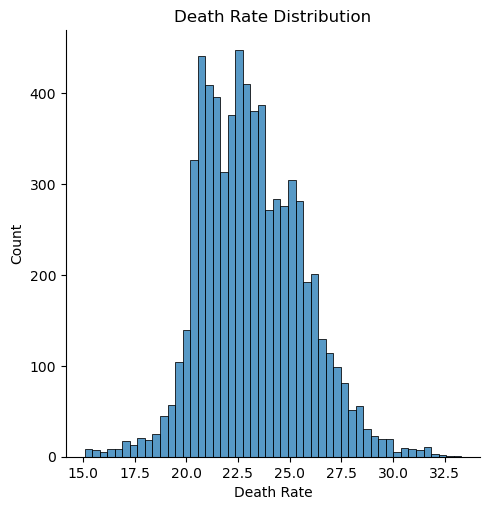

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize = (5,5))
sns.displot(ddr.Death_Rate)
plt.title('Death Rate Distribution')
plt.xlabel('Death Rate')
plt.show()
plt.clf()

*Grouping the dataset by `Entity`, calculating the Average `Death Rate` over the years, and sorting them in a descending order*

In [23]:
ddr_means = ddr.drop(['Code', 'Year'], axis = 1).groupby(['Entity']).mean().sort_values(by =['Death_Rate'], ascending = False).reset_index()
ddr_means

Entity  Death_Rate
0                           Afghanistan   31.111333
1                              Kiribati   30.481667
2                                  Oman   29.559333
3                                 Libya   28.611000
4                                 Gabon   28.213000
5                               Bahrain   28.121000
6                            Mozambique   27.832667
7                               Algeria   27.646667
8                               Lebanon   27.532667
9                               Vietnam   27.487667
10                                Qatar   27.319000
11                                Samoa   27.316667
12                              Tunisia   27.040667
13                         Saudi Arabia   26.868333
14                               Turkey   26.846000
15                              Senegal   26.669333
16                         Burkina Faso   26.554000
17                     Marshall Islands   26.453667
18                                 Niue   26.410333
19                               Tuvalu   26.403333
20                          South Korea   26.251667
21                            Palestine   26.213000
22                 Micronesia (country)   26.122667
23                              Tokelau   26.115000
24                             Cameroon   26.056667
25                                Japan   26.049667
26                             Honduras   26.046333
27                               Brazil   25.964000
28                               Gambia   25.873667
29                                Congo   25.872667
30                                 Iran   25.792000
31                                 Mali   25.777667
32                 United Arab Emirates   25.724333
33                                Syria   25.573667
34                             Ethiopia   25.526333
35                        Cote d'Ivoire   25.405333
36                           Mauritania   25.380667
37                                Nauru   25.325000
38                                 Iraq   25.321000
39                             Djibouti   25.291333
40                                 Togo   25.180667
41      Middle East & North Africa (WB)   25.167667
42                                Spain   25.105000
43                                Yemen   25.102333
44                              Liberia   25.083333
45                             Tanzania   25.080000
46                               Kuwait   25.064333
47                                Benin   24.986667
48                               Guinea   24.984000
49                              Morocco   24.960333
50                            Guatemala   24.944000
51         Democratic Republic of Congo   24.925000
52                               Malawi   24.922667
53                    Equatorial Guinea   24.902667
54                              Comoros   24.834333
55                               Poland   24.804000
56                               Jordan   24.801333
57                        Guinea-Bissau   24.717000
58                                Tonga   24.664000
59                                Niger   24.654333
60                                Kenya   24.560667
61         Western Pacific Region (WHO)   24.537667
62                             Paraguay   24.494333
63                 African Region (WHO)   24.483667
64                             Zimbabwe   24.483333
65                             Mongolia   24.405667
66                               Rwanda   24.279667
67              Sub-Saharan Africa (WB)   24.275000
68                               Angola   24.260000
69                              Albania   24.251667
70                            Nicaragua   24.246667
71             East Asia & Pacific (WB)   24.231333
72                             Botswana   24.204667
73                World Bank Low Income   24.196667
74                             Slovenia   24.151667
75                                Sudan   24.145000
76                           

*Taking a subset of `Top 10` from the previous dataset to use in further analysis*

In [24]:
top_10_ddr_means = ddr_means[:10]
top_10_ddr_means

Entity  Death_Rate
0  Afghanistan   31.111333
1     Kiribati   30.481667
2         Oman   29.559333
3        Libya   28.611000
4        Gabon   28.213000
5      Bahrain   28.121000
6   Mozambique   27.832667
7      Algeria   27.646667
8      Lebanon   27.532667
9      Vietnam   27.487667

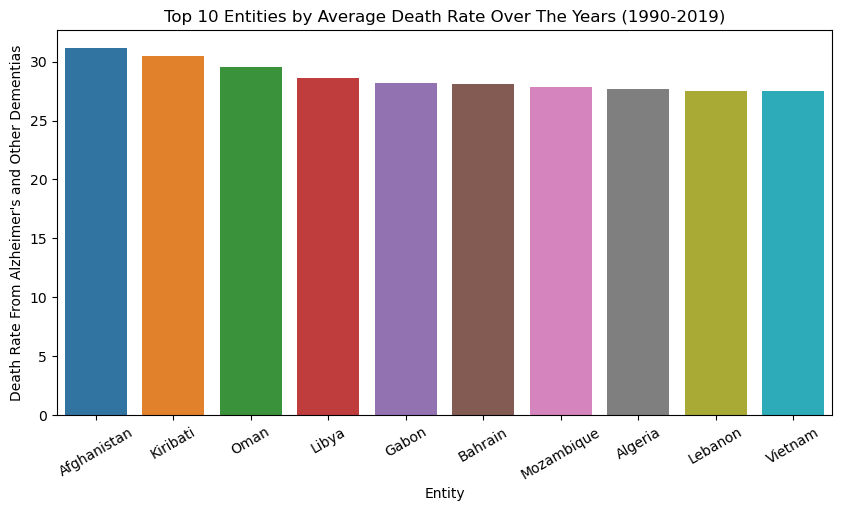

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize = (10,5))
ax =plt.subplot()
sns.barplot(data = top_10_ddr_means, x = 'Entity', y = 'Death_Rate')
plt.title('Top 10 Entities by Average Death Rate Over The Years (1990-2019)')
plt.xlabel('Entity')
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
ax.set_xticklabels(top_10_ddr_means.Entity, rotation = 30)
plt.show()
plt.clf()

In [26]:
ddr_subset = ddr[ddr.Entity.isin(top_10_ddr_means.Entity)]
ddr_subset

Entity Code  Year  Death_Rate
0     Afghanistan  AFG  1990       31.83
3         Algeria  DZA  1990       28.78
14        Bahrain  BHR  1990       28.54
72          Gabon  GAB  1990       27.53
101      Kiribati  KIR  1990       28.92
107       Lebanon  LBN  1990       27.49
110         Libya  LBY  1990       29.67
130    Mozambique  MOZ  1990       25.58
148          Oman  OMN  1990       29.89
217       Vietnam  VNM  1990       26.41
228   Afghanistan  AFG  1991       31.78
231       Algeria  DZA  1991       28.46
242       Bahrain  BHR  1991       28.55
300         Gabon  GAB  1991       27.62
329      Kiribati  KIR  1991       28.93
335       Lebanon  LBN  1991       27.52
338         Libya  LBY  1991       29.53
358    Mozambique  MOZ  1991       25.51
376          Oman  OMN  1991       29.90
445       Vietnam  VNM  1991       26.40
456   Afghanistan  AFG  1992       31.78
459       Algeria  DZA  1992       28.36
470       Bahrain  BHR  1992       28.47
528         Gabon  GAB  1992       27.63
557      Kiribati  KIR  1992       28.94
563       Lebanon  LBN  1992       27.61
566         Libya  LBY  1992       29.19
586    Mozambique  MOZ  1992       25.65
604          Oman  OMN  1992       29.94
673       Vietnam  VNM  1992       26.38
684   Afghanistan  AFG  1993       31.78
687       Algeria  DZA  1993       28.27
698       Bahrain  BHR  1993       28.22
756         Gabon  GAB  1993       27.62
785      Kiribati  KIR  1993       28.91
791       Lebanon  LBN  1993       27.70
794         Libya  LBY  1993       29.01
814    Mozambique  MOZ  1993       25.85
832          Oman  OMN  1993       29.95
901       Vietnam  VNM  1993       26.36
912   Afghanistan  AFG  1994       31.72
915       Algeria  DZA  1994       28.19
926       Bahrain  BHR  1994       28.00
984         Gabon  GAB  1994       27.76
1013     Kiribati  KIR  1994       28.89
1019      Lebanon  LBN  1994       27.71
1022        Libya  LBY  1994       28.81
1042   Mozambique  MOZ  1994       26.02
1060         Oman  OMN  1994       30.02
1129      Vietnam  VNM  1994       26.37
1140  Afghanistan  AFG  1995       31.67
1143      Algeria  DZA  1995       28.14
1154      Bahrain  BHR  1995       27.94
1212        Gabon  GAB  1995       27.94
1241     Kiribati  KIR  1995       28.88
1247      Lebanon  LBN  1995       27.78
1250        Libya  LBY  1995       28.60
1270   Mozambique  MOZ  1995       26.12
1288         Oman  OMN  1995       30.09
1357      Vietnam  VNM  1995       26.41
1368  Afghanistan  AFG  1996       31.60
1371      Algeria  DZA  1996       28.10
1382      Bahrain  BHR  1996       28.14
1440        Gabon  GAB  1996       28.10
1469     Kiribati  KIR  1996       29.01
1475      Lebanon  LBN  1996       27.85
1478        Libya  LBY  1996       28.49
1498   Mozambique  MOZ  1996       26.32
1516         Oman  OMN  1996       30.12
1585      Vietnam  VNM  1996       26.42
1596  Afghanistan  AFG  1997       31.52
1599      Algeria  DZA  1997       28.05
1610      Bahrain  BHR  1997       28.09
1668        Gabon  GAB  1997       28.08
1697     Kiribati  KIR  1997       29.15
1703      Lebanon  LBN  1997       27.99
1706        Libya  LBY  1997       28.55
1726   Mozambique  MOZ  1997       26.63
1744         Oman  OMN  1997       30.07
1813      Vietnam  VNM  1997       26.43
1824  Afghanistan  AFG  1998       31.44
1827      Algeria  DZA  1998       27.96
1838      Bahrain  BHR  1998       28.32
1896        Gabon  GAB  1998       28.01
1925     Kiribati  KIR  1998       29.30
1931      Lebanon  LBN  1998       28.14
1934        Libya  LBY  1998       28.64
1954   Mozambique  MOZ  1998       26.94
1972         Oman  OMN  1998       29.98
2041      Vietnam  VNM  1998       26.44
2052  Afghanistan  AFG  1999       31.37
2055      Algeria  DZA  1999       27.91
2066      Bahrain  BHR  1999       28.48
2124        Gabon  GAB  1999       27.94
2153     Kiribati  KIR  1999       29.45
2159      Lebanon  LBN  1999       28.03
2162        Libya  LBY  1999      

*The Box plot combined with the Stip plot explain the average Death Rates from the previous graph, The Box plot shows how wide the range of values is, while the Strip plot explains the average Death Rate for each country, for example we can see that even though `Kiribati` has the highest Death Rate recorded its wide range of values and the cluster of data around 29-30 puts the average Death Rate around 30, while for `Afghanistan` we can see that the range of values of Death Rates is narrow compared to Kiribati, and there's a cluster of data around 31 which puts the average Death Rate around that value*

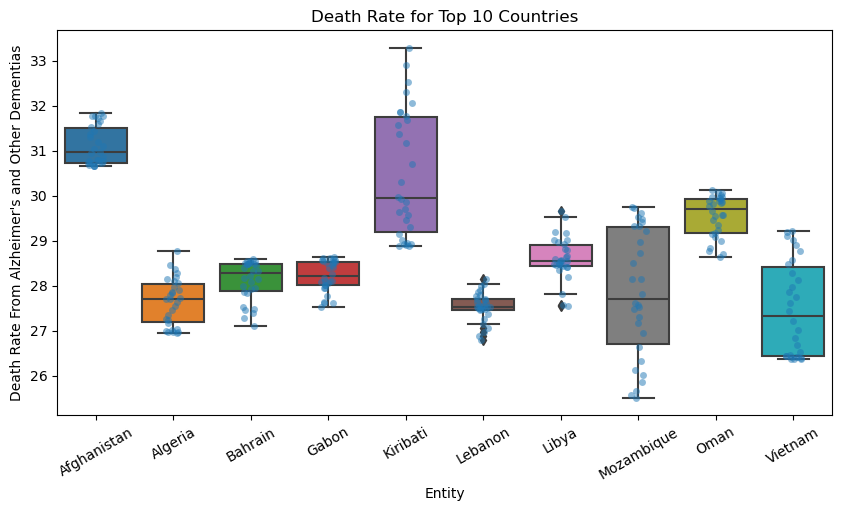

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize = (10, 5))
ax = plt.subplot()
sns.boxplot(x = 'Entity' , y = 'Death_Rate', data = ddr_subset)
sns.stripplot(x = 'Entity', y = 'Death_Rate', data = ddr_subset, size = 5, alpha = 0.5)
ax.set_xticklabels(ddr_subset.Entity.unique(), rotation = 30)
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
plt.xlabel('Entity')
plt.title('Death Rate for Top 10 Countries')
plt.show()
plt.clf()

*Analysing the Change of Average Global Death Rate by year*

In [28]:
death_rate_by_year = ddr.drop(['Code', 'Entity'], axis = 1).groupby(['Year']).mean().reset_index()
death_rate_by_year

Year  Death_Rate
0   1990   22.775263
1   1991   22.790088
2   1992   22.831798
3   1993   22.879518
4   1994   22.904605
5   1995   22.942544
6   1996   22.972325
7   1997   22.996316
8   1998   23.027456
9   1999   23.044737
10  2000   23.066667
11  2001   23.077105
12  2002   23.162193
13  2003   23.199781
14  2004   23.219825
15  2005   23.247939
16  2006   23.285439
17  2007   23.292939
18  2008   23.330658
19  2009   23.340482
20  2010   23.353070
21  2011   23.363860
22  2012   23.377675
23  2013   23.391974
24  2014   23.380746
25  2015   23.390088
26  2016   23.389035
27  2017   23.399518
28  2018   23.412982
29  2019   23.394167

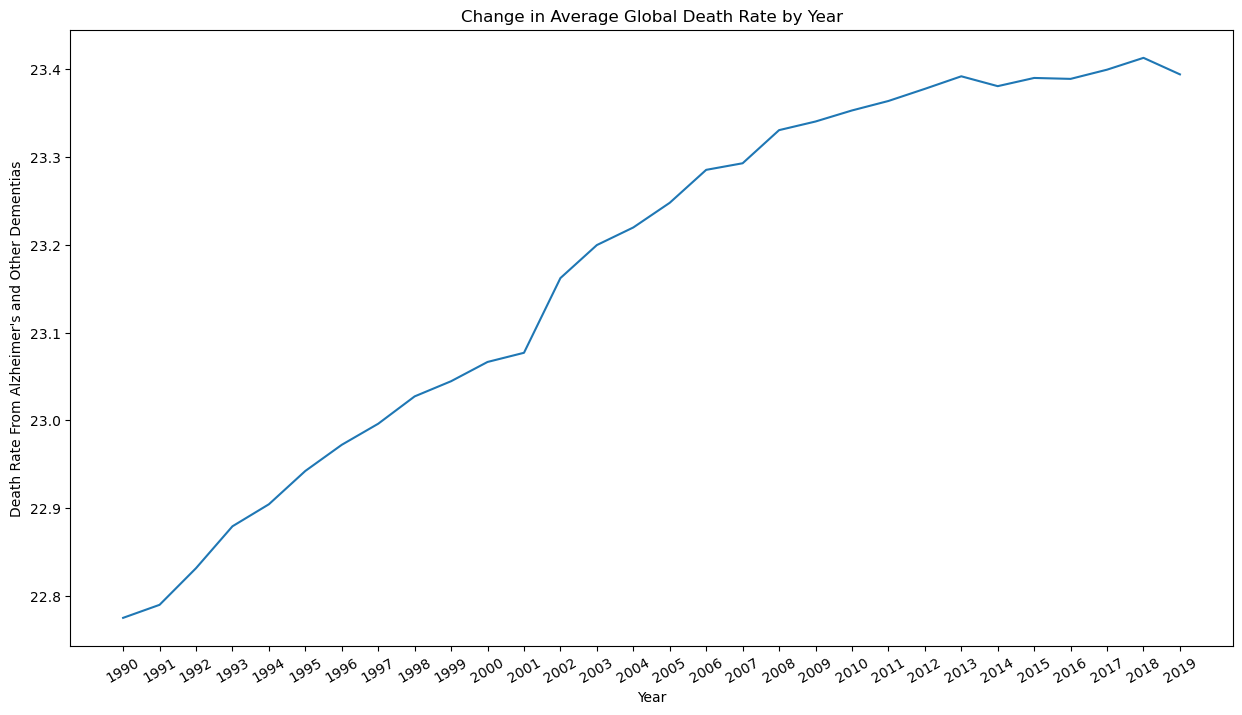

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.lineplot(x = 'Year', y = 'Death_Rate', data = death_rate_by_year)
plt.title('Change in Average Global Death Rate by Year')
plt.xlabel('Year')
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
ax.set_xticks(death_rate_by_year.Year)
ax.set_xticklabels(death_rate_by_year.Year, rotation = 30)
plt.show()
plt.clf()

*Grouping the dataset by `Entity - Year` to track the yearly change of `Death Rate` for each Entity*

In [30]:
ddr_by_year = ddr.drop(['Code'], axis = 1).groupby(['Entity', 'Year']).mean().reset_index()
ddr_by_year

Entity  Year  Death_Rate
0                            Afghanistan  1990       31.83
1                            Afghanistan  1991       31.78
2                            Afghanistan  1992       31.78
3                            Afghanistan  1993       31.78
4                            Afghanistan  1994       31.72
5                            Afghanistan  1995       31.67
6                            Afghanistan  1996       31.60
7                            Afghanistan  1997       31.52
8                            Afghanistan  1998       31.44
9                            Afghanistan  1999       31.37
10                           Afghanistan  2000       31.30
11                           Afghanistan  2001       31.19
12                           Afghanistan  2002       31.11
13                           Afghanistan  2003       31.04
14                           Afghanistan  2004       30.98
15                           Afghanistan  2005       30.94
16                           Afghanistan  2006       30.87
17                           Afghanistan  2007       30.80
18                           Afghanistan  2008       30.72
19                           Afghanistan  2009       30.67
20                           Afghanistan  2010       30.66
21                           Afghanistan  2011       30.66
22                           Afghanistan  2012       30.69
23                           Afghanistan  2013       30.73
24                           Afghanistan  2014       30.76
25                           Afghanistan  2015       30.72
26                           Afghanistan  2016       30.72
27                           Afghanistan  2017       30.72
28                           Afghanistan  2018       30.78
29                           Afghanistan  2019       30.79
30                  African Region (WHO)  1990       23.04
31                  African Region (WHO)  1991       23.05
32                  African Region (WHO)  1992       23.17
33                  African Region (WHO)  1993       23.21
34                  African Region (WHO)  1994       23.30
35                  African Region (WHO)  1995       23.32
36                  African Region (WHO)  1996       23.42
37                  African Region (WHO)  1997       23.55
38                  African Region (WHO)  1998       23.64
39                  African Region (WHO)  1999       23.69
40                  African Region (WHO)  2000       23.87
41                  African Region (WHO)  2001       23.94
42                  African Region (WHO)  2002       24.23
43                  African Region (WHO)  2003       24.38
44                  African Region (WHO)  2004       24.60
45                  African Region (WHO)  2005       24.81
46                  African Region (WHO)  2006       25.04
47                  African Region (WHO)  2007       25.04
48                  African Region (WHO)  2008       25.17
49                  African Region (WHO)  2009       25.22
50                  African Region (WHO)  2010       25.32
51                  African Region (WHO)  2011       25.45
52                  African Region (WHO)  2012       25.51
53                  African Region (WHO)  2013       25.53
54                  African Region (WHO)  2014       25.43
55                  African Region (WHO)  2015       25.47
56                  African Region (WHO)  2016       25.42
57                  African Region (WHO)  2017       25.49
58                  African Region (WHO)  2018       25.58
59                  African Region (WHO)  2019       25.62
60                               Albania  1990       24.78
61                               Albania  1991       24.85
62                               Albania  1992       24.79
63                               Albania  1993       24.67
64                               Albania  1994       24.45
65                               Albania  1995       24.51
66                               Albania  1996       24.47
67                    

*Taking a subset of `Top 5` by Average Death Rate so we can track the yearly change of Death Rate for these Entities*

In [31]:
top_5_ddr_by_year = ddr_by_year[ddr_by_year.Entity.isin(top_10_ddr_means.Entity[:6])]
top_5_ddr_by_year

Entity  Year  Death_Rate
0     Afghanistan  1990       31.83
1     Afghanistan  1991       31.78
2     Afghanistan  1992       31.78
3     Afghanistan  1993       31.78
4     Afghanistan  1994       31.72
5     Afghanistan  1995       31.67
6     Afghanistan  1996       31.60
7     Afghanistan  1997       31.52
8     Afghanistan  1998       31.44
9     Afghanistan  1999       31.37
10    Afghanistan  2000       31.30
11    Afghanistan  2001       31.19
12    Afghanistan  2002       31.11
13    Afghanistan  2003       31.04
14    Afghanistan  2004       30.98
15    Afghanistan  2005       30.94
16    Afghanistan  2006       30.87
17    Afghanistan  2007       30.80
18    Afghanistan  2008       30.72
19    Afghanistan  2009       30.67
20    Afghanistan  2010       30.66
21    Afghanistan  2011       30.66
22    Afghanistan  2012       30.69
23    Afghanistan  2013       30.73
24    Afghanistan  2014       30.76
25    Afghanistan  2015       30.72
26    Afghanistan  2016       30.72
27    Afghanistan  2017       30.72
28    Afghanistan  2018       30.78
29    Afghanistan  2019       30.79
420       Bahrain  1990       28.54
421       Bahrain  1991       28.55
422       Bahrain  1992       28.47
423       Bahrain  1993       28.22
424       Bahrain  1994       28.00
425       Bahrain  1995       27.94
426       Bahrain  1996       28.14
427       Bahrain  1997       28.09
428       Bahrain  1998       28.32
429       Bahrain  1999       28.48
430       Bahrain  2000       27.93
431       Bahrain  2001       27.10
432       Bahrain  2002       27.84
433       Bahrain  2003       28.33
434       Bahrain  2004       28.45
435       Bahrain  2005       28.60
436       Bahrain  2006       28.55
437       Bahrain  2007       28.49
438       Bahrain  2008       28.51
439       Bahrain  2009       28.52
440       Bahrain  2010       28.49
441       Bahrain  2011       28.50
442       Bahrain  2012       28.39
443       Bahrain  2013       28.17
444       Bahrain  2014       27.86
445       Bahrain  2015       27.45
446       Bahrain  2016       27.49
447       Bahrain  2017       27.53
448       Bahrain  2018       27.39
449       Bahrain  2019       27.29
2160        Gabon  1990       27.53
2161        Gabon  1991       27.62
2162        Gabon  1992       27.63
2163        Gabon  1993       27.62
2164        Gabon  1994       27.76
2165        Gabon  1995       27.94
2166        Gabon  1996       28.10
2167        Gabon  1997       28.08
2168        Gabon  1998       28.01
2169        Gabon  1999       27.94
2170        Gabon  2000       28.02
2171        Gabon  2001       28.05
2172        Gabon  2002       28.10
2173        Gabon  2003       28.10
2174        Gabon  2004       28.18
2175        Gabon  2005       28.26
2176        Gabon  2006       28.40
2177        Gabon  2007       28.42
2178        Gabon  2008       28.52
2179        Gabon  2009       28.50
2180        Gabon  2010       28.50
2181        Gabon  2011       28.61
2182        Gabon  2012       28.64
2183        Gabon  2013       28.57
2184        Gabon  2014       28.46
2185        Gabon  2015       28.54
2186        Gabon  2016       28.53
2187        Gabon  2017       28.56
2188        Gabon  2018       28.61
2189        Gabon  2019       28.59
3030     Kiribati  1990       28.92
3031     Kiribati  1991       28.93
3032     Kiribati  1992       28.94
3033     Kiribati  1993       28.91
3034     Kiribati  1994       28.89
3035     Kiribati  1995       28.88
3036     Kiribati  1996       29.01
3037     Kiribati  1997       29.15
3038     Kiribati  1998       29.30
3039     Kiribati  1999       29.45
3040     Kiribati  2000       29.56
3041     Kiribati  2001       29.63
3042     Kiribati  2002       29.71
3043     Kiribati  2003       29.87
3044     Kiribati  2004       29.93
3045     Kiribati  2005       29.98
3046     Kiribati  2006       30.31
3047     Kiribati  2007       30.71
3048     Kiribati  2008       31.16
3049     Kiribati  2009       31.37
3050     Kiriba

*As we can see in the graph below, most countries have fluctuations in their Death Rate over the years. However, `Afghanistan, Bahrain, Libya, and Oman` seem to be doing slightly better over the years, on the other hand `Gabon` seems to be doing slightly worse, and `Kiribati` is doing the worst of them all*

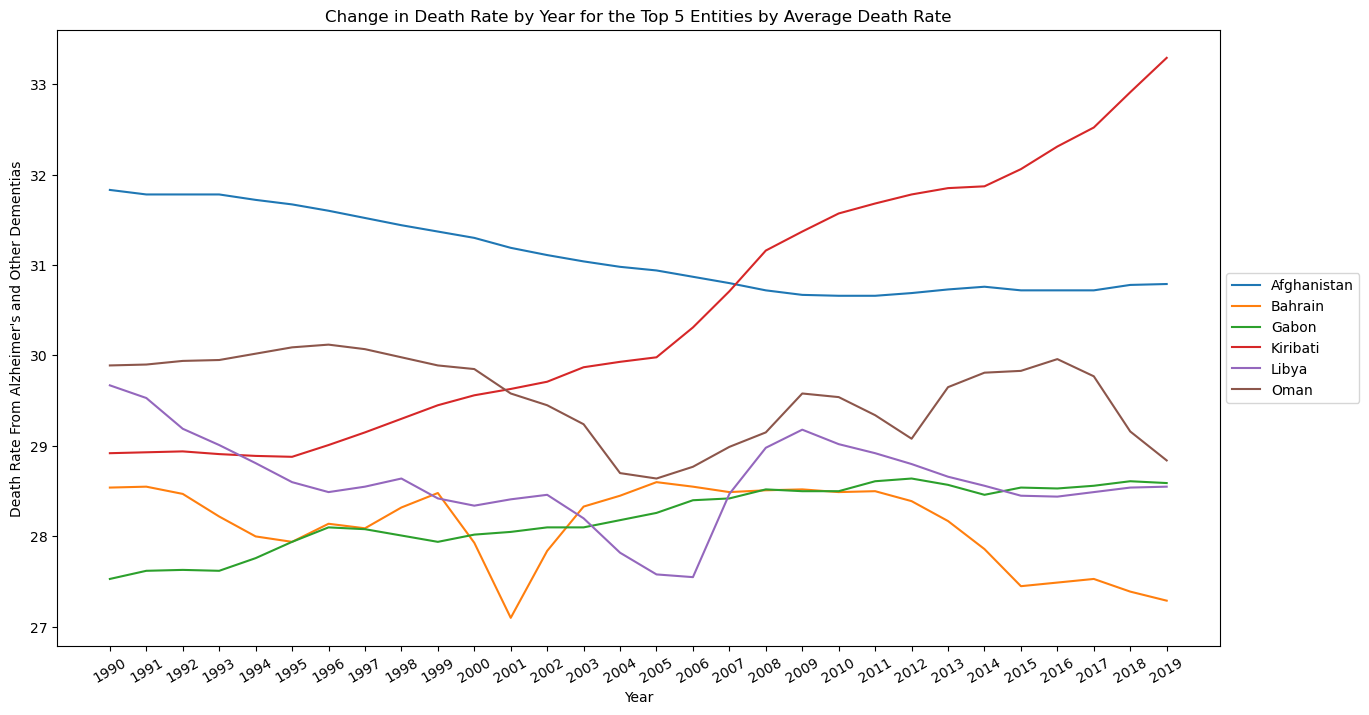

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.lineplot(x = 'Year', y = 'Death_Rate', hue = 'Entity', data = top_5_ddr_by_year)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Change in Death Rate by Year for the Top 5 Entities by Average Death Rate')
plt.xlabel('Year')
plt.ylabel("Death Rate From Alzheimer's and Other Dementias")
ax.set_xticks(top_5_ddr_by_year.Year.unique())
ax.set_xticklabels(top_5_ddr_by_year.Year.unique(), rotation = 30)
plt.show()
plt.clf()

*`Kiribati` has the highest Death Rate over the years with the highest Death Rate recorded in `2019`, followed by `Afghanistan` which had the highest Death Rate in the `90s`*

In [33]:
top_10_of_all_time = ddr.nlargest(10, 'Death_Rate')
top_10_of_all_time

Entity Code  Year  Death_Rate
6713     Kiribati  KIR  2019       33.29
6485     Kiribati  KIR  2018       32.91
6257     Kiribati  KIR  2017       32.52
6029     Kiribati  KIR  2016       32.31
5801     Kiribati  KIR  2015       32.06
5573     Kiribati  KIR  2014       31.87
5345     Kiribati  KIR  2013       31.85
0     Afghanistan  AFG  1990       31.83
228   Afghanistan  AFG  1991       31.78
456   Afghanistan  AFG  1992       31.78

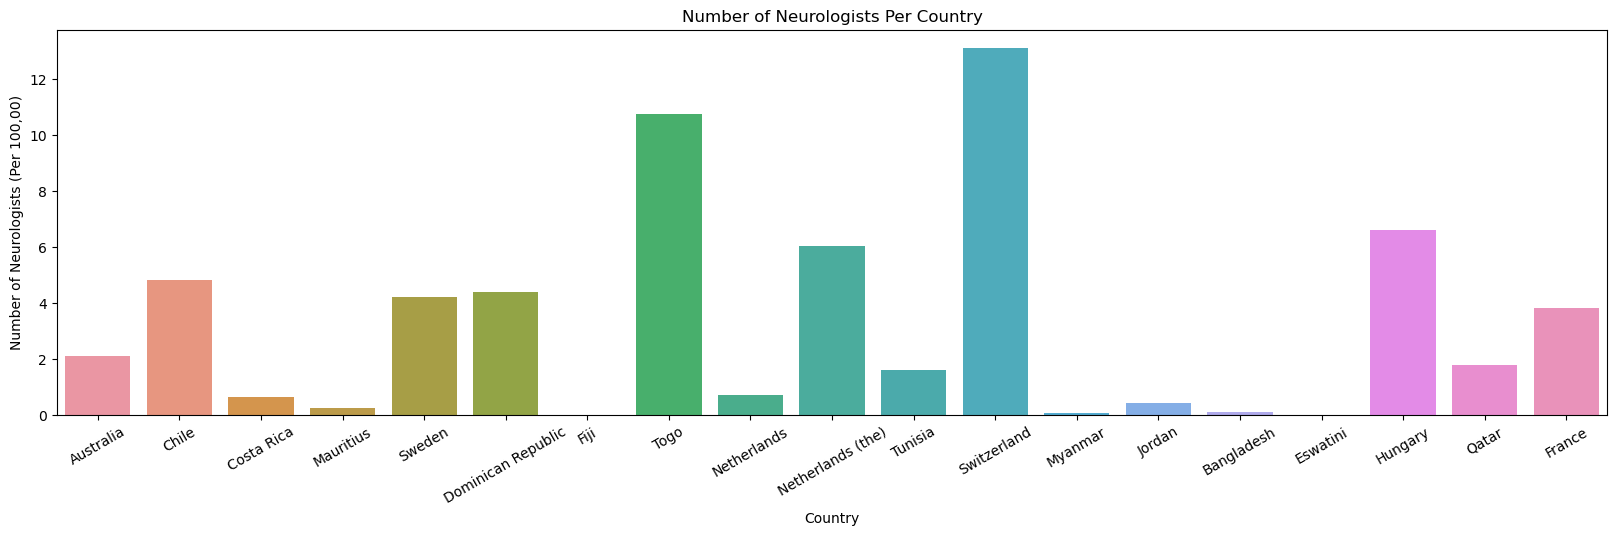

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize = (20,5))
ax =plt.subplot()
sns.barplot(data = neurologists_clean, x = 'Country', y = 'Neurologists_Number')
plt.title('Number of Neurologists Per Country')
plt.xlabel('Country')
plt.ylabel('Number of Neurologists (Per 100,00)')
ax.set_xticklabels(neurologists_clean.Country, rotation = 30)
plt.show()
plt.clf()

*According to the scatter plot there is no correlation between `Death Rate` and `Number of Neurologists`. However, we only looked at a small sample of countries and only one year (2017) since we're limited by the data provided by GHO, to strengthen this conclusion further research might be needed.*

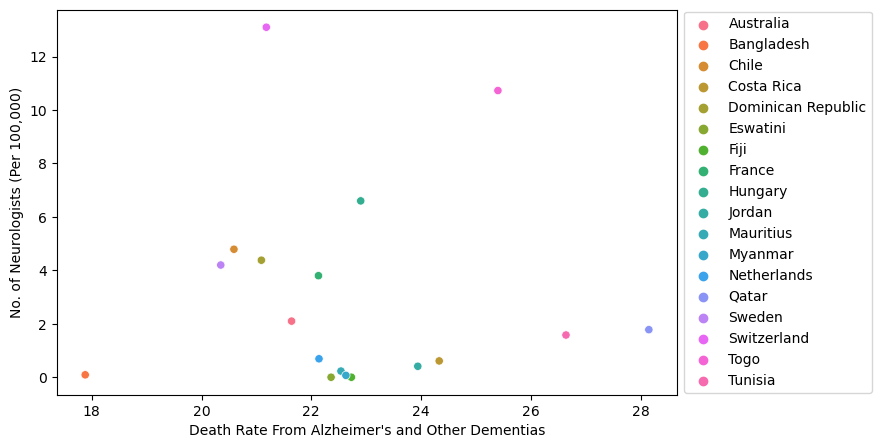

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Death_Rate', y = 'Neurologists_Number', hue = 'Country', data = joined_dataset)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.xlabel("Death Rate From Alzheimer's and Other Dementias")
plt.ylabel('No. of Neurologists (Per 100,000)')
plt.show()
plt.clf()

### Conclusion
*In this analysis we gained important insights about one of the leading causes of death, and we answered the following questions*
* Has the death rate changed over the years?
    * Yes it has, the Average Global Death Rate had a very slight increase from 22.8 to 23.4
* Are there some countries with higher death rates than others?
    * Yes, with Kiribati recording the highest Death Rate of 33.29 in 2019.
* Has the death rate changed over the years for different countries?
    * Yes it has, Kiribati has the highest change over the years with min. Death Rate of 28.88 and max. Death Rate of 33.29.
* Which entity has the highest death rate over the years?
    * Kiribati has the highest Death Rate in the 2000s, While Afghanistan had the highest Death Rate in the 90s.
* Is there a correlation between death rate and number of neurologists?
    * There's no correlation between Death Rate and Number of Neurologists, however this needs further research to confirm due to lack of data in years prior to 2017 provided by GHO.
 
### Further Research
*In order to understand better if there's a correlation between Death Rate by Alzheimer's and other Dementias and the number of Neurologists in a country, more data needs to be gathered and analyzed.*